## Задача №5
### Вариант 9

#### Решение задачи о нахождении локально минимального дерева посредством алгоритма Мелзака-Хванга

In [1]:
# Устанавливаем вывод matplotlib
%matplotlib inline

In [2]:
# Импортируем необходимые функции и библиотеки
from math import (cos, sin, pi, sqrt)
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Номер варианта
d = 9

In [4]:
l = [None] * 6
for i in reversed(range(1,7,1)):
    n = d % i + 1
    m = 7 - i
    print '{}. {} mod {} + 1 = {}'.format(m, d, i, n)
    for j in range(len(l)):
        if l[j] is None:
            n -= 1
        if n == 0:
            l[j] = m
            break
    print '   L = {}\n'.format(l)

# Для удобства рассчетов точек P1-P6:
l = [None] + l

1. 9 mod 6 + 1 = 4
   L = [None, None, None, 1, None, None]

2. 9 mod 5 + 1 = 5
   L = [None, None, None, 1, None, 2]

3. 9 mod 4 + 1 = 2
   L = [None, 3, None, 1, None, 2]

4. 9 mod 3 + 1 = 1
   L = [4, 3, None, 1, None, 2]

5. 9 mod 2 + 1 = 2
   L = [4, 3, None, 1, 5, 2]

6. 9 mod 1 + 1 = 1
   L = [4, 3, 6, 1, 5, 2]



[!] вершины ОБЯЗАТЕЛЬНО отсортированы по возрастанию, иначе будут проблемы с итерированием по списку вершин

In [5]:
# Дано в условии
G1 = [[7],[7],[8],[8],[9],[9],[1,2,10],[3,4,10],[5,6,10],[7,8,9]]
G2 = [[7],[7],[8],[10],[10],[9],[1,2,8],[3,7,9],[6,8,10],[4,5,9]]

#### Генерируем ряд данных для нашего варианта

In [6]:
def generate_data(l):
    x = []
    y = []
    for k in range(1, len(l)):
        ax = 3 * cos(pi * k / 3) + cos(pi * l[k] / 3)
        ay = 3 * sin(pi * k / 3) + sin(pi * l[k] / 3)
        x.append(ax)
        y.append(ay)
        print 'P{}: ({}, {})'.format(k, ax, ay)
    return x, y

In [7]:
x, y = generate_data(l)

P1: (1.0, 1.73205080757)
P2: (-2.5, 2.59807621135)
P3: (-2.0, 1.22464679915e-16)
P4: (-1.0, -1.73205080757)
P5: (2.0, -3.46410161514)
P6: (2.5, 0.866025403784)


### Вспомогательные функции

#### Построение графика

`x, y` - основной набор данных  
`x2, y2` - дополнительный набор данных (если необходим)  
`p_lim` - количество первичных граничных точек  
`max_x` - размеры сетки по модулю для x  
`max_y` - размеры сетки по модулю для y  
`step` - шаг линий сетки

In [8]:
def draw(x, y, x2=None, y2=None, connect=None, p_lim=6, max_x=8, max_y=8, step=1):

    # Устанавливаем размеры графика и разрешение
    plt.figure(figsize=(draw.size, draw.size), dpi=draw.dpi)
    
    # Проводим линии, обозначающие основные оси и начало координат
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
    # Индивидуально строим ребра между существующими вершинами графа
    if draw.graph:
        ap = [] # Уже построенные ребра
        for i in range(len(x)):
            for v in draw.graph[i]:
                if v-1 < len(x) and ((i, v-1) not in ap) and ((v-1, i) not in ap):
                    rx, ry = [x[i], x[v-1]], [y[i], y[v-1]]
                    plt.plot(rx, ry, 'r--', color='gray')
                    ap.append((i, v-1))
                    
    # Если необходимо - дополнительно соединяем указанные точки
    if connect:
        ap = []
        for v in connect:
            for w in connect:
                if (w != v) and ((w, v) not in ap) and ((v, w) not in ap):
                    if type(v) != tuple or type(w) != tuple:
                        rx = []
                        ry = []
                        if type(v) == tuple:
                            rx.append(v[0])
                            ry.append(v[1])
                        else:
                            rx.append(x[v])
                            ry.append(y[v])
                        if type(w) == tuple:
                            rx.append(w[0])
                            ry.append(w[1])
                        else:
                            rx.append(x[w])
                            ry.append(y[w])
                        plt.plot(rx, ry, 'r-.', color='teal')
                        ap.append((v, w))
                
    
    # Строим граничные вершины
    plt.plot(x[:p_lim], y[:p_lim], 'ro', markersize=3)
    for i, _ in enumerate(x):
        # Наносим подписи для каждой точки
        plt.annotate('P'+str(i+1), (x[i], y[i]), size=draw.text_size)
        
    # Достраиваемые точки Штейнера, строим отдельно другим цветом
    if len(x) >= p_lim:
        plt.plot(x[p_lim:], y[p_lim:], 'ro', markersize=4, color='green')
        for i in range(len(x[p_lim:])):
            plt.annotate('P'+str(p_lim+i+1), (x[p_lim+i], y[p_lim+i]), size=draw.text_size)
    
    # Дополнительный ряд данных, если необходим
    if x2 and y2 and len(x2) == len(y2):
        plt.plot(x2, y2, 'ro', markersize=4, color='blue')
        for i, _ in enumerate(x2):
            plt.annotate('S'+str(i+1), (x2[i], y2[i]), size=draw.text_size)
    
    # Устанавливаем разметку осей
    x_ticks = np.arange(-max_x, max_x+1, step)
    y_ticks = np.arange(-max_y, max_y+1, step)
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    
    # Устанавливаем координатную сетку
    plt.grid()
    
    # Отображаем график
    plt.show()
    
    # Или сохраняем график на диск
    # plt.savefig('graph-{}.png'.format(draw.graph_counter))
    # draw.graph_counter += 1
    
    
# Настройки функции
draw.graph_counter = 0
draw.size = 12
draw.dpi = 180
draw.text_size = 12

#### Инициализируем связи для построения первого графа

In [9]:
draw.graph = G1

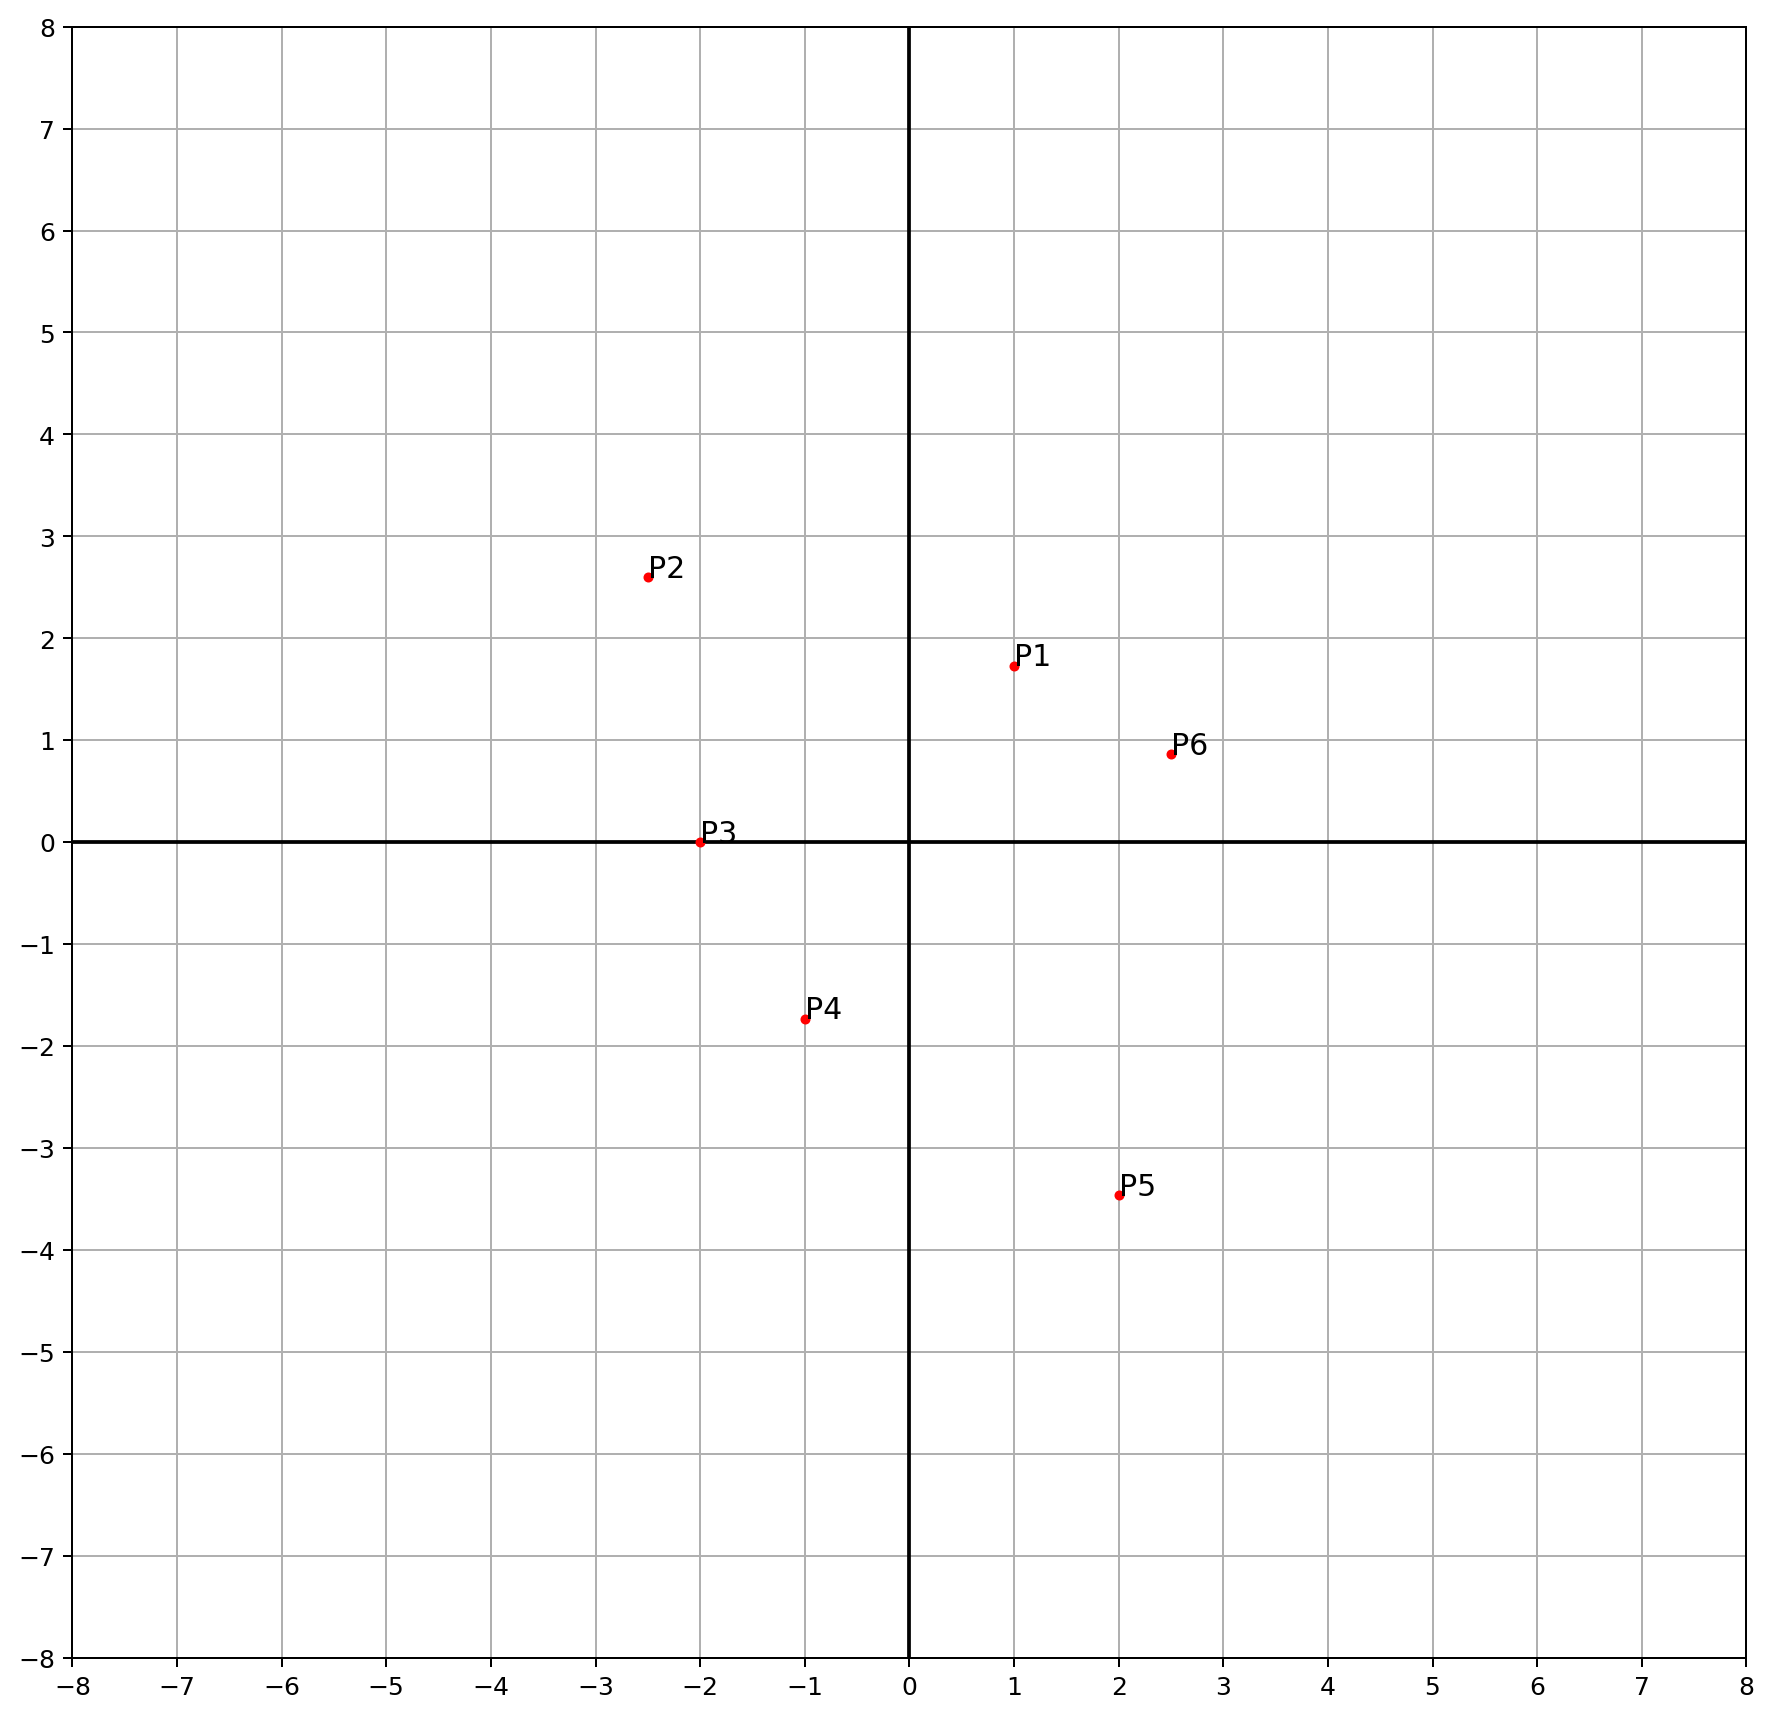

In [10]:
draw(x, y)

#### Определение центра описанной окружности треугольника ABC - A(x1,y1), B(x2,y2), C(x3,y3)

Уравнение окружности:  
$(x-a)^2+(y-b)^2=r^2$

Записав его для 3х вершин треугольника получим:  
$\begin{cases}
(x_{1}-a)^2+(y_{1}-b)^2=r^2 \\
(x_{2}-a)^2+(y_{2}-b)^2=r^2 \\
(x_{3}-a)^2+(y_{3}-b)^2=r^2
\end{cases}$

Вычитаем из первого уравнения второе и из первого третье:  
$\begin{cases}
2(x_{1}-x_{2})a+2(y_{1}-y_{2})b=(x_{1}^2-x_{2}^2)+(y_{1}^2-y_{2}^2) \\
2(x_{1}-x_{3})a+2(y_{1}-y_{3})b=(x_{1}^2-x_{3}^2)+(y_{1}^2-y_{3}^2)
\end{cases}$

Получили систему двух линейных уравнений с двумя неизвестными

In [11]:
def get_center(x1, y1, x2, y2, x3, y3):
    # Находим решение системы уравнений
    x12 = x1 - x2
    x23 = x2 - x3
    x31 = x3 - x1
    y12 = y1 - y2
    y23 = y2 - y3
    y31 = y3 - y1
    z1 = x1**2 + y1**2
    z2 = x2**2 + y2**2
    z3 = x3**2 + y3**2
    zx = y12 * z3 + y23 * z1 + y31 * z2
    zy = x12 * z3 + x23 * z1 + x31 * z2
    z = x12 * y31 - y12 * x31
    a = - zx / (2 * z)
    b = zy / (2 * z)
    r = sqrt((a-x1)**2 + (b-y1)**2)
    return a, b, r

#### Определение вершин равносторонних треугольников, построенных на основании AB - A(a,b), B(c,d)

Проведем две окружности с радиусом равным длине AB, точки их пересечения - вершины искомых треугольников.  

Для нахождения точек составим систему уравнений:

$\begin{cases}
(x-a)^2+(y-b)^2=r^2 \\
(x-c)^2+(y-d)^2=r^2 \\
r = \sqrt{(a-c)^2+(b-d)^2}
\end{cases}$

In [12]:
def find_vertex(a, b, c, d):
    # Находим 2 решения системы уравнений
    r1x = 1.0/2 * (a - sqrt(3) * sqrt((b - d)**2) + c)
    r1y = (sqrt(3) * a * sqrt((b - d)**2) + b**2 - sqrt(3) * c * sqrt((b - d)**2) - d**2) / (2.0 * (b - d))
    r2x = 1.0/2 * (a + sqrt(3) * sqrt((b - d)**2) + c)
    r2y = (-sqrt(3) * a * sqrt((b - d)**2) + b**2 + sqrt(3) * c * sqrt((b - d)**2) - d**2) / (2.0 * (b - d))
    return [r1x, r2x], [r1y, r2y]

#### Определение факта попадания точки в многоугольник

`x, y` - заданная точка  
`xp, yp` - массив вершин многоугольника

In [13]:
def in_polygon(x, y, xp, yp):
    # Метод литья лучей: если четное число пересечений - то вне фигруы
    c = 0
    for i in range(len(xp)):
        if (((yp[i]<=y and y<yp[i-1]) or (yp[i-1]<=y and y<yp[i])) and \
            (x > (xp[i-1] - xp[i]) * (y - yp[i]) / (yp[i-1] - yp[i]) + xp[i])): c = 1 - c    
    return (c == 1)

#### Определение факта пересечения отрезков A(ax1,ay1,ax2,ay2) и B(bx1,by1,bx2,by2)

Вычисляем ориентированные площади соответствующих треугольников и сравниваем их знаки

In [14]:
def is_intersect(ax1, ay1, ax2, ay2, bx1, by1, bx2, by2):
    v1 = (bx2-bx1)*(ay1-by1)-(by2-by1)*(ax1-bx1)
    v2 = (bx2-bx1)*(ay2-by1)-(by2-by1)*(ax2-bx1)
    v3 = (ax2-ax1)*(by1-ay1)-(ay2-ay1)*(bx1-ax1)
    v4 = (ax2-ax1)*(by2-ay1)-(ay2-ay1)*(bx2-ax1)
    return (v1*v2 < 0) and (v3*v4 < 0)

#### Поиск пересечения окружности (задана: a,b,r) и отрезка (задан: c,d,e,f)

Для решения подзадачи решим уравнения окружности и прямой:

$\begin{cases}
(x-a)^2 + (y-b)^2 = r^2 \\
\frac{x-c}{e-c} = \frac{y-d}{f-d}
\end{cases}$

При этом по условиям применения функции -  
мы знаем что одна точно уже раположена на отрезке, поэтому ее необходимо исключить из решения.

Из-за громоздкости вычислений они были сгенерированы и упрощены в [Wolfram Mathematica][Math], а затем переведены на python.

[Math]: https://www.wolframalpha.com/input/?i=solve+%7B+(y-d)%2F(f-d)%3D(x-c)%2F(e-c),+(x-a)%5E2+%2B+(y-b)%5E2+%3D+r%5E2+%7D+for+x,+y

`eps` - заданная точность определения координат

In [15]:
def find_intersection(a, b, c, d, e, f, r, eps=0.001):
    # Находим перое решение системы уравнений:
    rx1 = (-sqrt(-(c - e)**2 * \
                 (a**2 * d**2 - 2 * a**2 * d * f + a**2 * f**2 - 2 * a * b * c * d + 2 * a * b * c * f + \
                  2 * a * b * d * e - 2 * a * b * e * f + 2 * a * c * d * f - 2 * a * c * f**2 - \
                  2 * a * d**2 * e + 2 * a * d * e * f + b**2 * c**2 - 2 * b**2 * c * e + \
                  b**2 * e**2 - 2 * b * c**2 * f + 2 * b * c * d * e + 2 * b * c * e * f - \
                  2 * b * d * e**2 + c**2 * f**2 - c**2 * r**2 - 2 * c * d * e * f + 2 * c * e * r**2 \
                  + d**2 * e**2 - d**2 * r**2 + 2 * d * f * r**2 - e**2 * r**2 - f**2 * r**2)) + \
           a * c**2 - 2 * a * c * e + a * e**2 + b * c * d - b * c * f - b * d * e + b * e * f - \
           c * d * f + c * f**2 + d**2 * e - d * e * f)/(c**2 - 2 * c * e + d**2 - 2 * d * f + e**2 + f**2)
    ry1 = (-d * sqrt(-(c - e)**2 * \
                     (a**2 * d**2 - 2 * a**2 * d * f + a**2 * f**2 - 2 * a * b * c * d + \
                      2 * a * b * c * f + 2 * a * b * d * e - 2 * a * b * e * f + 2 * a * c * d * f - \
                      2 * a * c * f**2 - 2 * a * d**2 * e + 2 * a * d * e * f + b**2 * c**2 - \
                      2 * b**2 * c * e + b**2 * e**2 - 2 * b * c**2 * f + 2 * b * c * d * e + \
                      2 * b * c * e * f - 2 * b * d * e**2 + c**2 * f**2 - c**2 * r**2 - \
                      2 * c * d * e * f + 2 * c * e * r**2 + d**2 * e**2 - d**2 * r**2 + \
                      2 * d * f * r**2 - e**2 * r**2 - f**2 * r**2)) + \
           f * sqrt(-(c - e)**2 * (a**2 * d**2 - 2 * a**2 * d * f + a**2 * f**2 - \
                                   2 * a * b * c * d + 2 * a * b * c * f + 2 * a * b * d * e - \
                                   2 * a * b * e * f + 2 * a * c * d * f - 2 * a * c * f**2 - \
                                   2 * a * d**2 * e + 2 * a * d * e * f + b**2 * c**2 - \
                                   2 * b**2 * c * e + b**2 * e**2 - 2 * b * c**2 * f + 2 * b * c * d * e + \
                                   2 * b * c * e * f - 2 * b * d * e**2 + \
                                   c**2 * f**2 - c**2 * r**2 - 2 * c * d * e * f + 2 * c * e * r**2 + \
                                   d**2 * e**2 - d**2 * r**2 + 2 * d * f * r**2 - e**2 * r**2 - f**2 * r**2)) \
           + a * c**2 * d - a * c**2 * f - 2 * a * c * d * e + 2 * a * c * e * f + a * d * e**2 - \
           a * e**2 * f + b * c * d**2 - 2 * b * c * d * f + b * c * f**2 - b * d**2 * e + 2 * b * d * e * f \
           - b * e * f**2 + c**3 * f - c**2 * d * e - 2 * c**2 * e * f + 2 * c * d * e**2 + c * e**2 * f - \
           d * e**3) / ((c - e) * (c**2 - 2 * c * e + d**2 - 2 * d * f + e**2 + f**2))
    # Второе решение:
    rx2 = (sqrt(-(c - e)**2 * (a**2 * d**2 - 2 * a**2 * d * f + a**2 * f**2 - 2 * a * b * c * d + \
                               2 * a * b * c * f + 2 * a * b * d * e - 2 * a * b * e * f + \
                               2 * a * c * d * f - 2 * a * c * f**2 - 2 * a * d**2 * e + \
                               2 * a * d * e * f + b**2 * c**2 - 2 * b**2 * c * e + b**2 * e**2 - \
                               2 * b * c**2 * f + 2 * b * c * d * e + 2 * b * c * e * f - \
                               2 * b * d * e**2 + c**2 * f**2 - c**2 * r**2 - 2 * c * d * e * f + \
                               2 * c * e * r**2 + d**2 * e**2 - d**2 * r**2 + 2 * d * f * r**2 - \
                               e**2 * r**2 - f**2 * r**2)) + \
           a * c**2 - 2 * a * c * e + a * e**2 + b * c * d - b * c * f - b * d * e + b * e * f - \
           c * d * f + c * f**2 + d**2 * e - d * e * f)/(c**2 - 2 * c * e + d**2 - 2 * d * f + e**2 + f**2)
    ry2 = (d * sqrt(-(c - e)**2 * (a**2 * d**2 - 2 * a**2 * d * f + a**2 * f**2 - 2 * a * b * c * d + \
                                   2 * a * b * c * f + 2 * a * b * d * e - 2 * a * b * e * f + \
                                   2 * a * c * d * f - 2 * a * c * f**2 - 2 * a * d**2 * e + \
                                   2 * a * d * e * f + b**2 * c**2 - 2 * b**2 * c * e + b**2 * e**2 - \
                                   2 * b * c**2 * f + 2 * b * c * d * e + 2 * b * c * e * f - \
                                   2 * b * d * e**2 + c**2 * f**2 - c**2 * r**2 - 2 * c * d * e * f + \
                                   2 * c * e * r**2 + d**2 * e**2 - d**2 * r**2 + 2 * d * f * r**2 - \
                                   e**2 * r**2 - f**2 * r**2)) - \
           f * sqrt(-(c - e)**2 * (a**2 * d**2 - 2 * a**2 * d * f + a**2 * f**2 - 2 * a * b * c * d + \
                                   2 * a * b * c * f + 2 * a * b * d * e - 2 * a * b * e * f + \
                                   2 * a * c * d * f - 2 * a * c * f**2 - 2 * a * d**2 * e + \
                                   2 * a * d * e * f + b**2 * c**2 - 2 * b**2 * c * e + b**2 * e**2 - \
                                   2 * b * c**2 * f + 2 * b * c * d * e + 2 * b * c * e * f - \
                                   2 * b * d * e**2 + c**2 * f**2 - c**2 * r**2 - 2 * c * d * e * f + \
                                   2 * c * e * r**2 + d**2 * e**2 - d**2 * r**2 + 2 * d * f * r**2 - \
                                   e**2 * r**2 - f**2 * r**2)) + a * c**2 * d - a * c**2 * f - \
           2 * a * c * d * e + 2 * a * c * e * f + a * d * e**2 - a * e**2 * f + b * c * d**2 - \
           2 * b * c * d * f + b * c * f**2 - b * d**2 * e + 2 * b * d * e * f - b * e * f**2 + \
           c**3 * f - c**2 * d * e - 2 * c**2 * e * f + 2 * c * d * e**2 + c * e**2 * f - \
           d * e**3)/((c - e) * (c**2 - 2 * c * e + d**2 - 2 * d * f + e**2 + f**2))
    
    # Одно из них отбрасываем, потому что одна точка уже однозначно принадлежит началу отрезка
    if ((abs(rx1 - c) < eps) and (abs(ry1 - d) < eps)) or ((abs(rx1 - e) < eps) and (abs(ry1 - f) < eps)):
        return rx2, ry2
    else:
        return rx1, ry1

#### Проверка кандидатов граничных точек на условие Хванга

`x, y` - массив точек задачи  
`xs, ys` - точка-кандидат на новую граничную  
`ax, ay, bx, by` - основание равностороннего треугольника

In [16]:
def check_edge_point(x, y, xs, ys, ax, ay, bx, by):
    
    # Проверяем наличие вершины внутри всей фигуры
    # Если внутри - условие Хванга не выполнено
    if in_polygon(xs, ys, x, y):
        return False
    
    # Проверяем пересечения со всеми возможными ребрами
    # Если хоть какое-то пересекает - условие Хванга не выполнено
    for i in range(len(x)):
        for j in range(len(x)):
            if i != j:
                e1 = is_intersect(x[i], y[i], x[j], y[j], xs, ys, ax, ay)
                e2 = is_intersect(x[i], y[i], x[j], y[j], xs, ys, bx, by)
                if e1 or e2:
                    return False
    
    return True

Стоит обратить внимание:

Оберточные функции `create_edge_point` и `create_stein_point` принимают на вход классические индексы (начинаются с единицы), но внутри себя работают уже с привычными для языков программирования индексами, начинающимся с нуля. Это сделано для того, чтобы облегчить работу оператору данных функций.

### Прямой ход алгоритма

In [17]:
# Добавить граничную точку в массив данных
def create_edge_point(x, y, k1, k2):
    k1 -= 1
    k2 -= 1
    x2, y2 = find_vertex(x[k1], y[k1], x[k2], y[k2])
    print 'Строим вершины треугольников - S1 и S2:'
    draw(x, y, x2, y2, connect=(k1, k2, (x2[0], y2[0]), (x2[1], y2[1])))
    if check_edge_point(x, y, x2[0], y2[0], x[k1], y[k1], x[k2], y[k2]):
        x.append(x2[0])
        y.append(y2[0])
    elif check_edge_point(x, y, x2[1], y2[1], x[k1], y[k1], x[k2], y[k2]):
        x.append(x2[1])
        y.append(y2[1])
    else:
        raise ArithmeticError('No valid edge points')
    print 'Выбрали необходимую граничную вершину P{}:'.format(len(x))
    draw(x, y, connect=(k1, k2))

Строим вершины треугольников - S1 и S2:


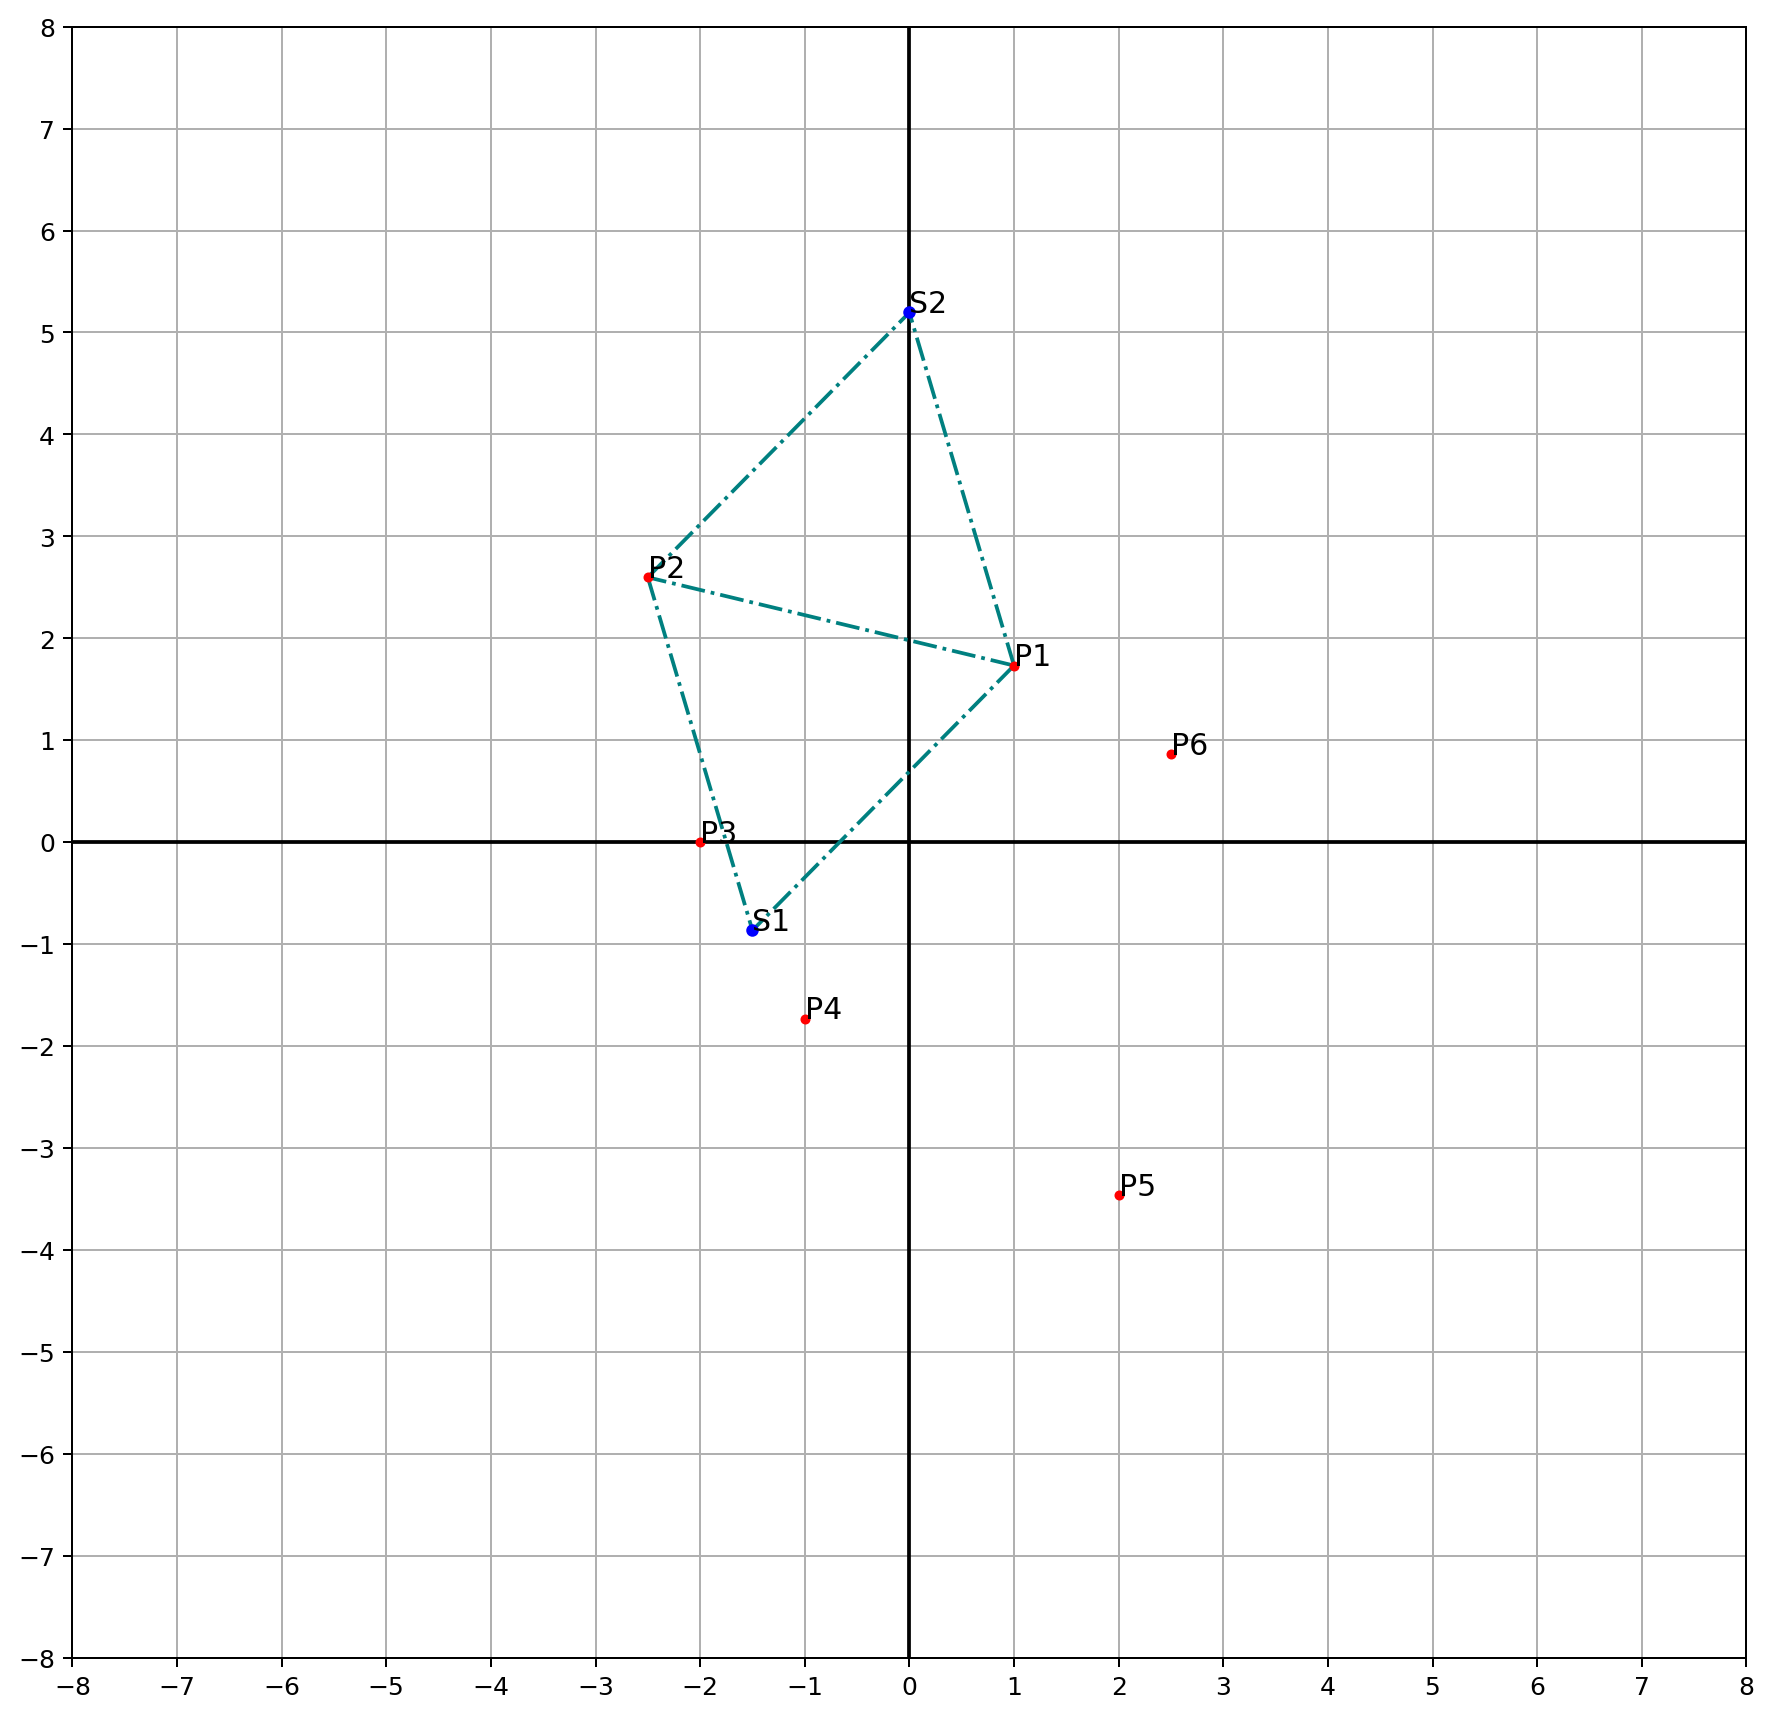

Выбрали необходимую граничную вершину P7:


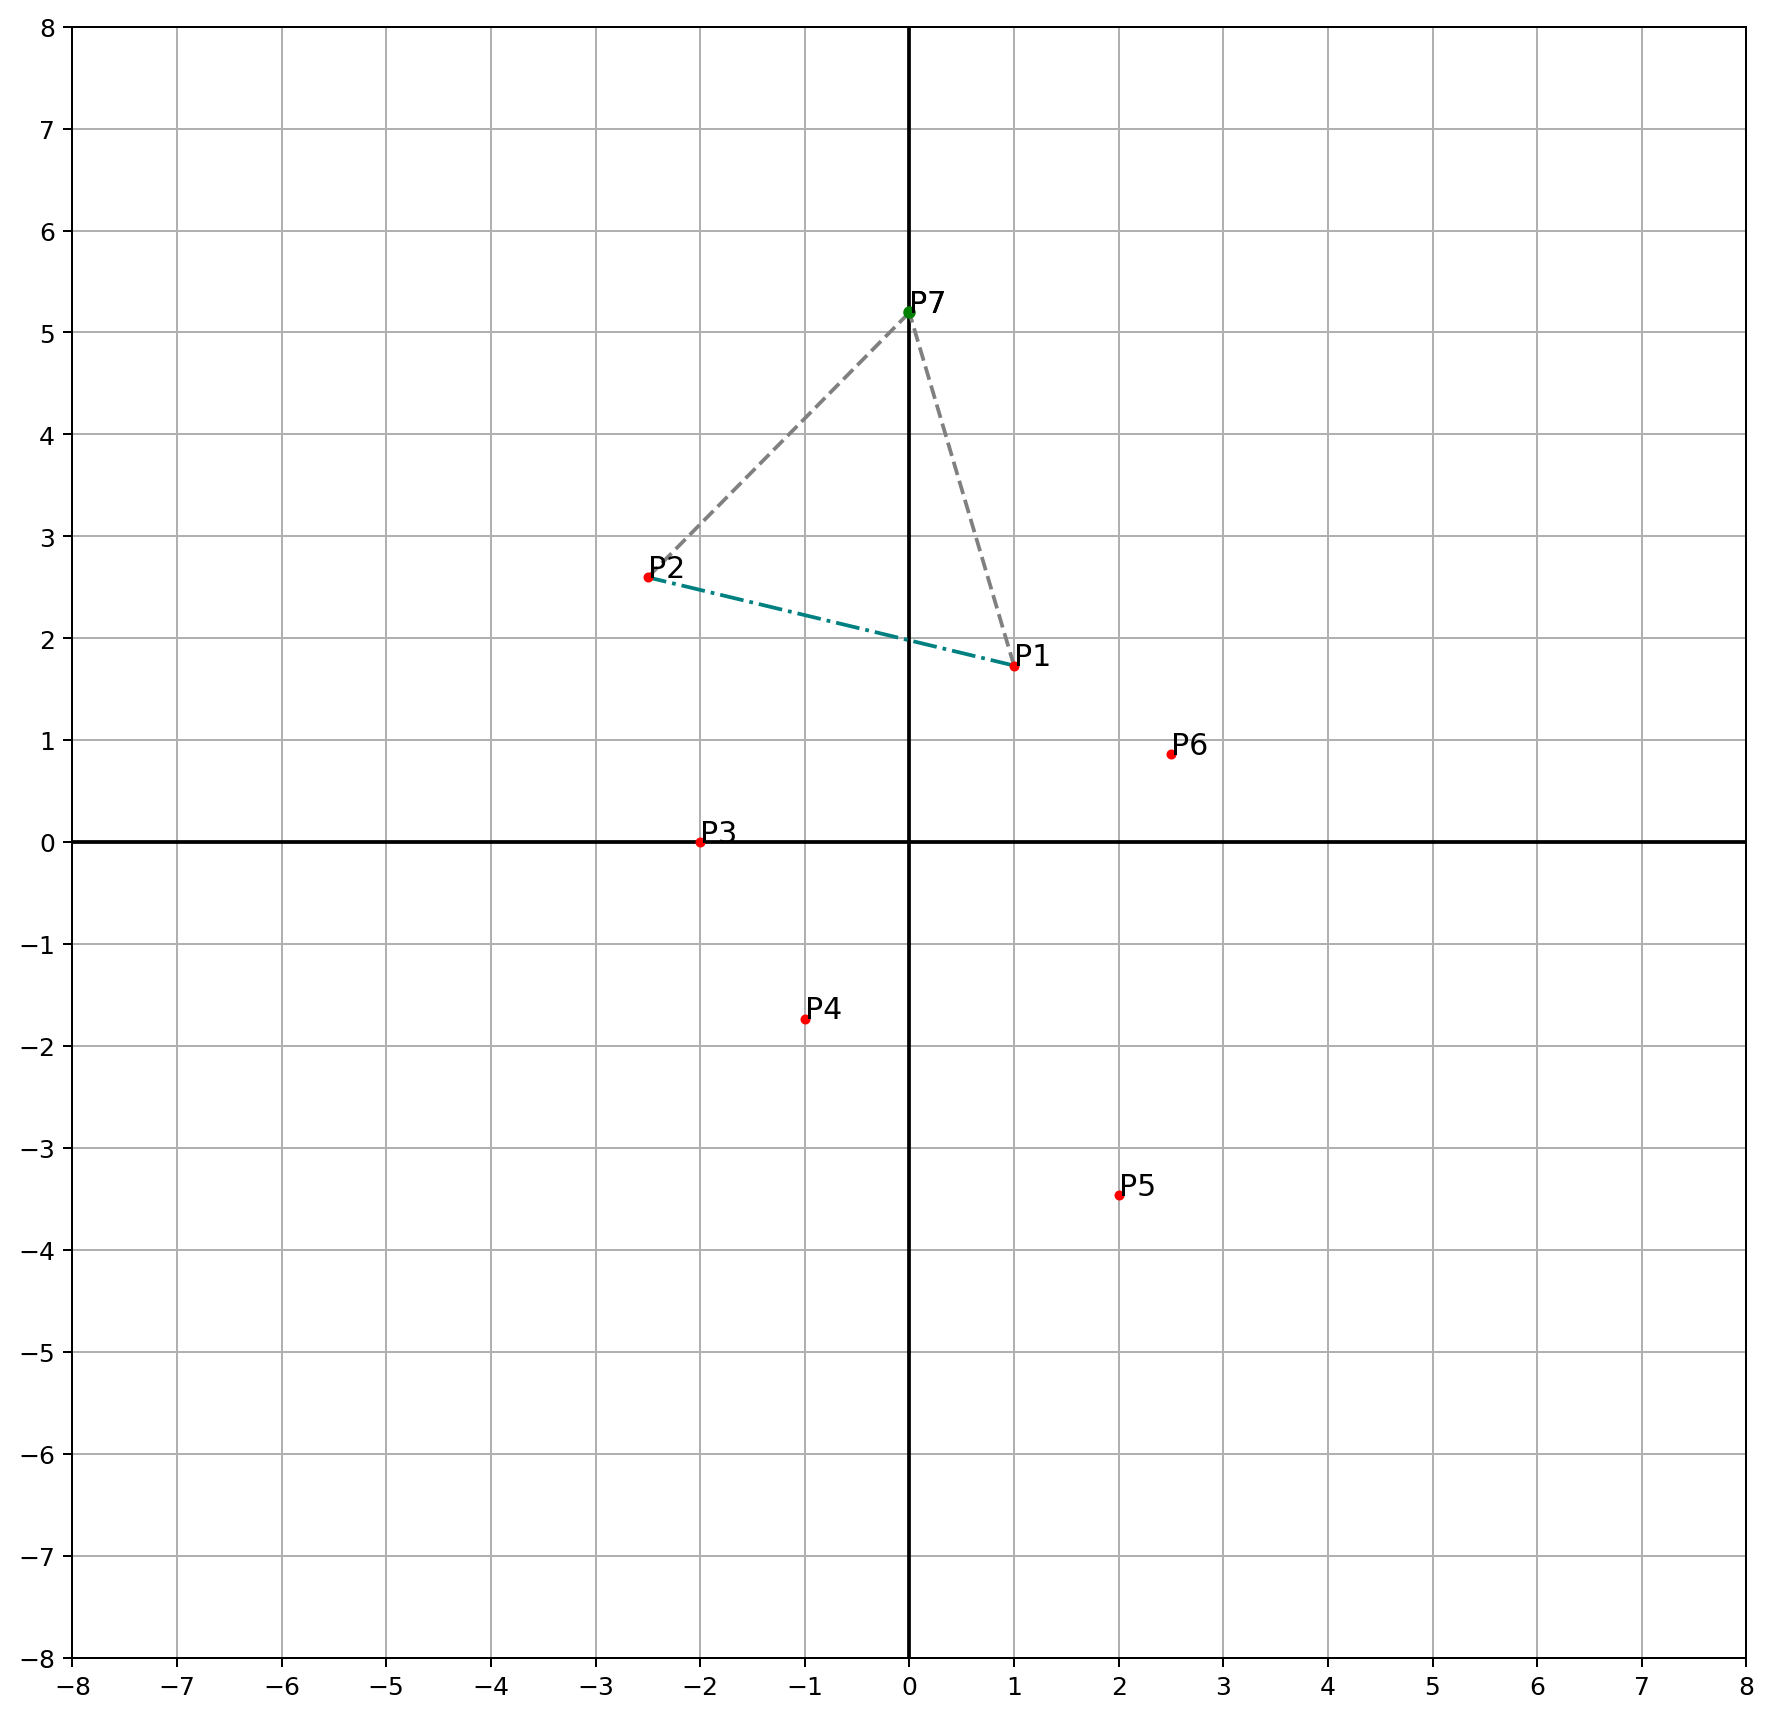

In [18]:
create_edge_point(x, y, 1, 2)

Строим вершины треугольников - S1 и S2:


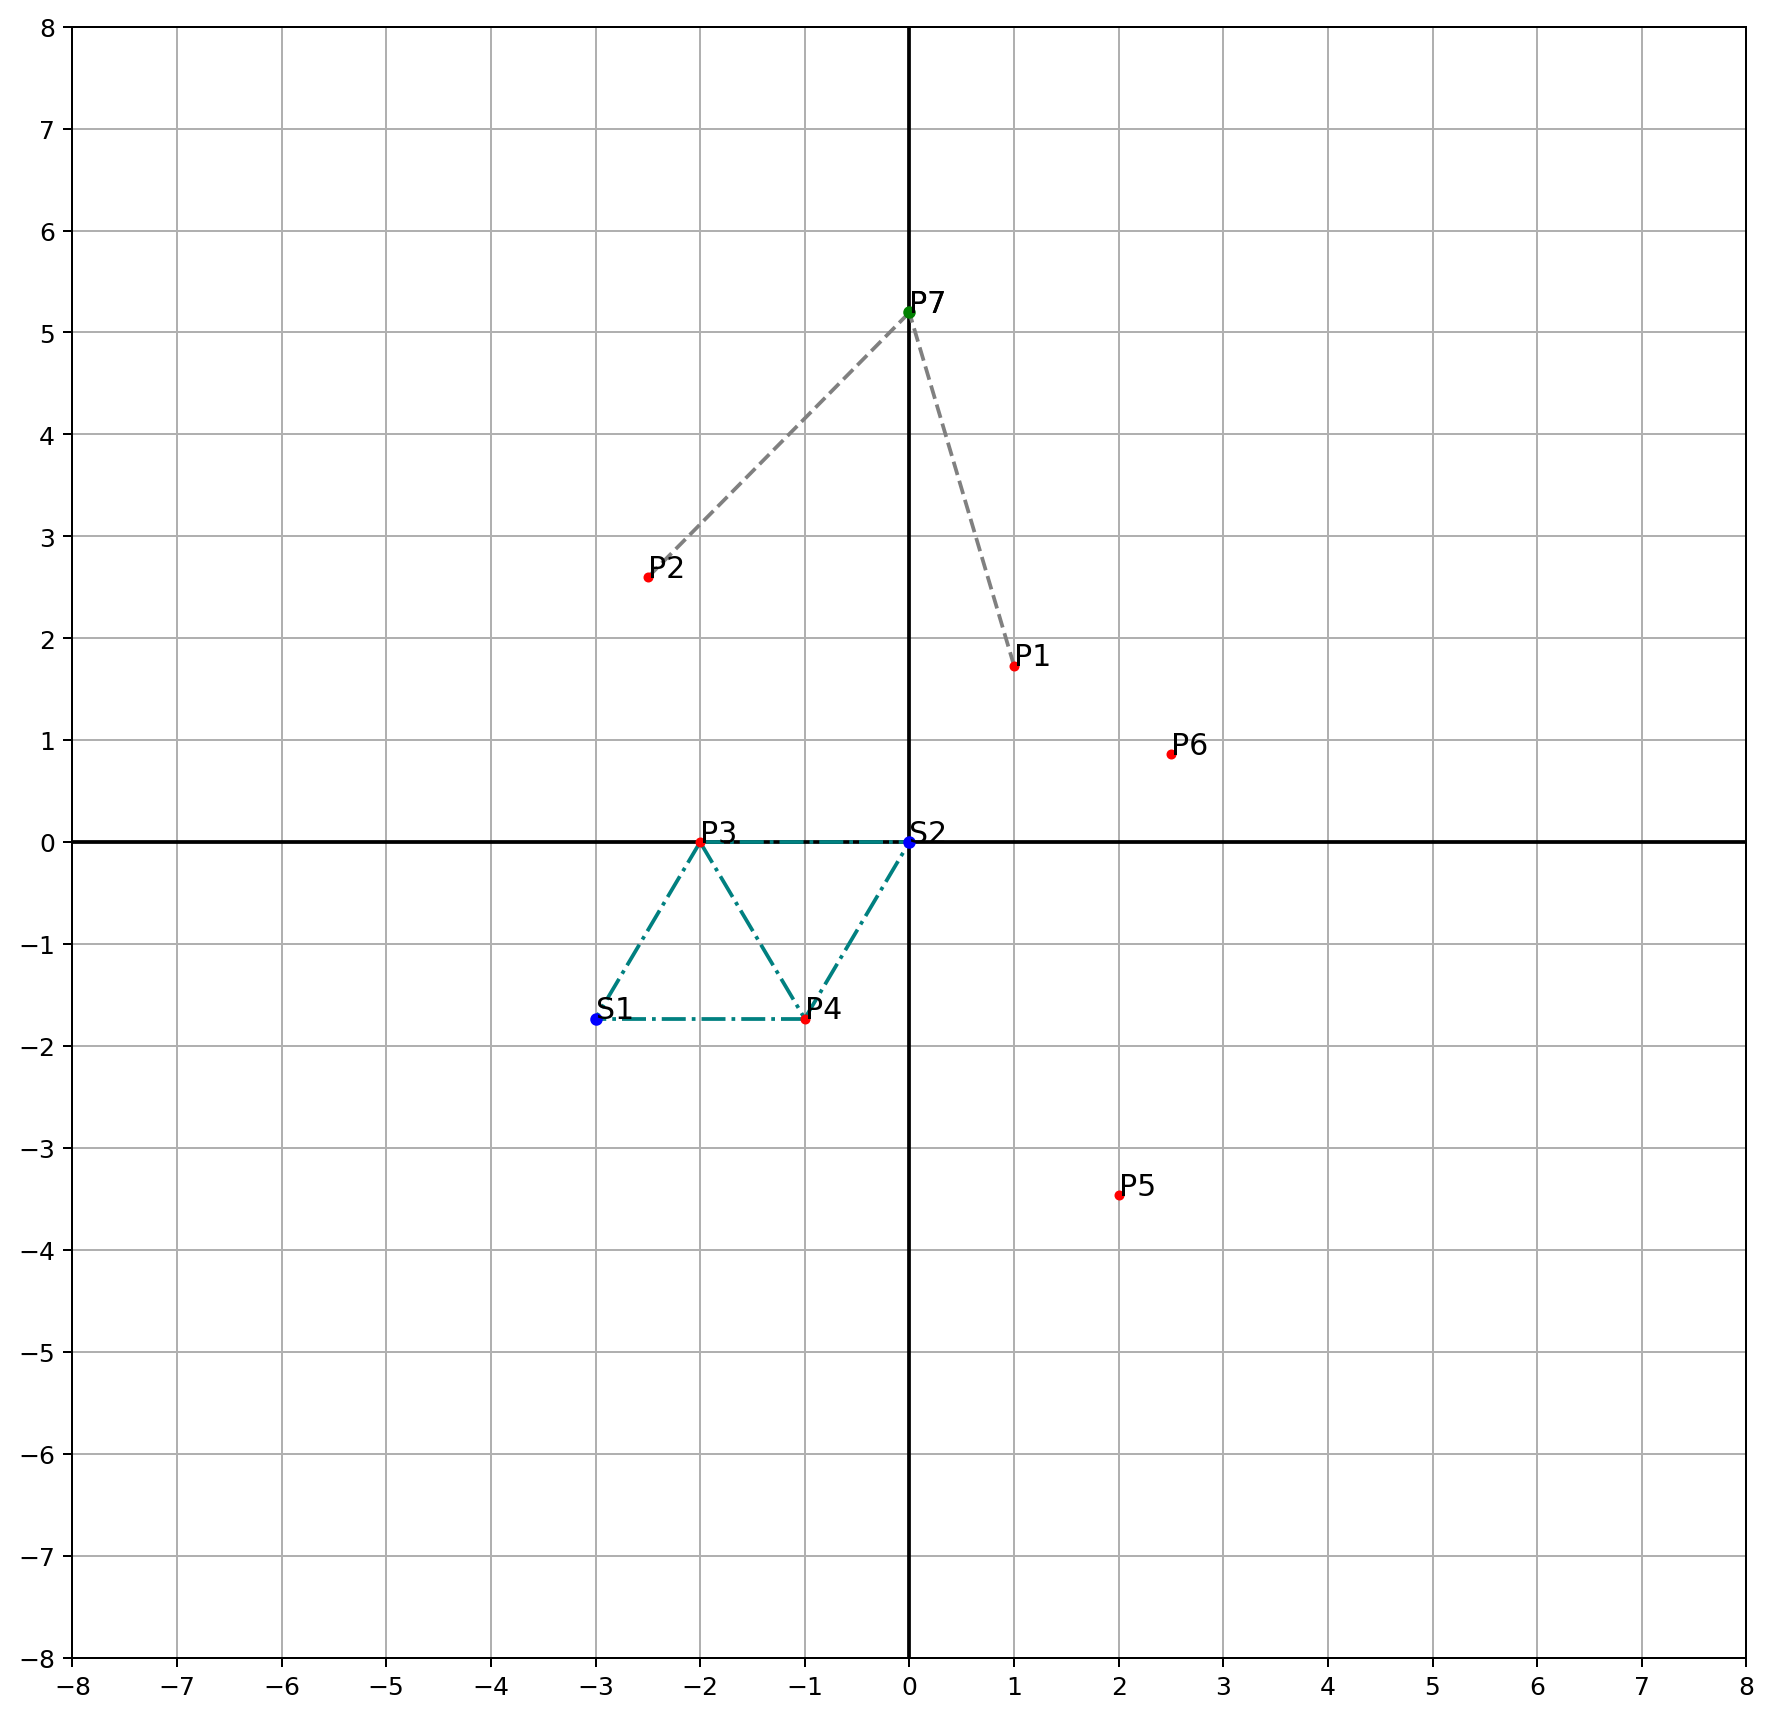

Выбрали необходимую граничную вершину P8:


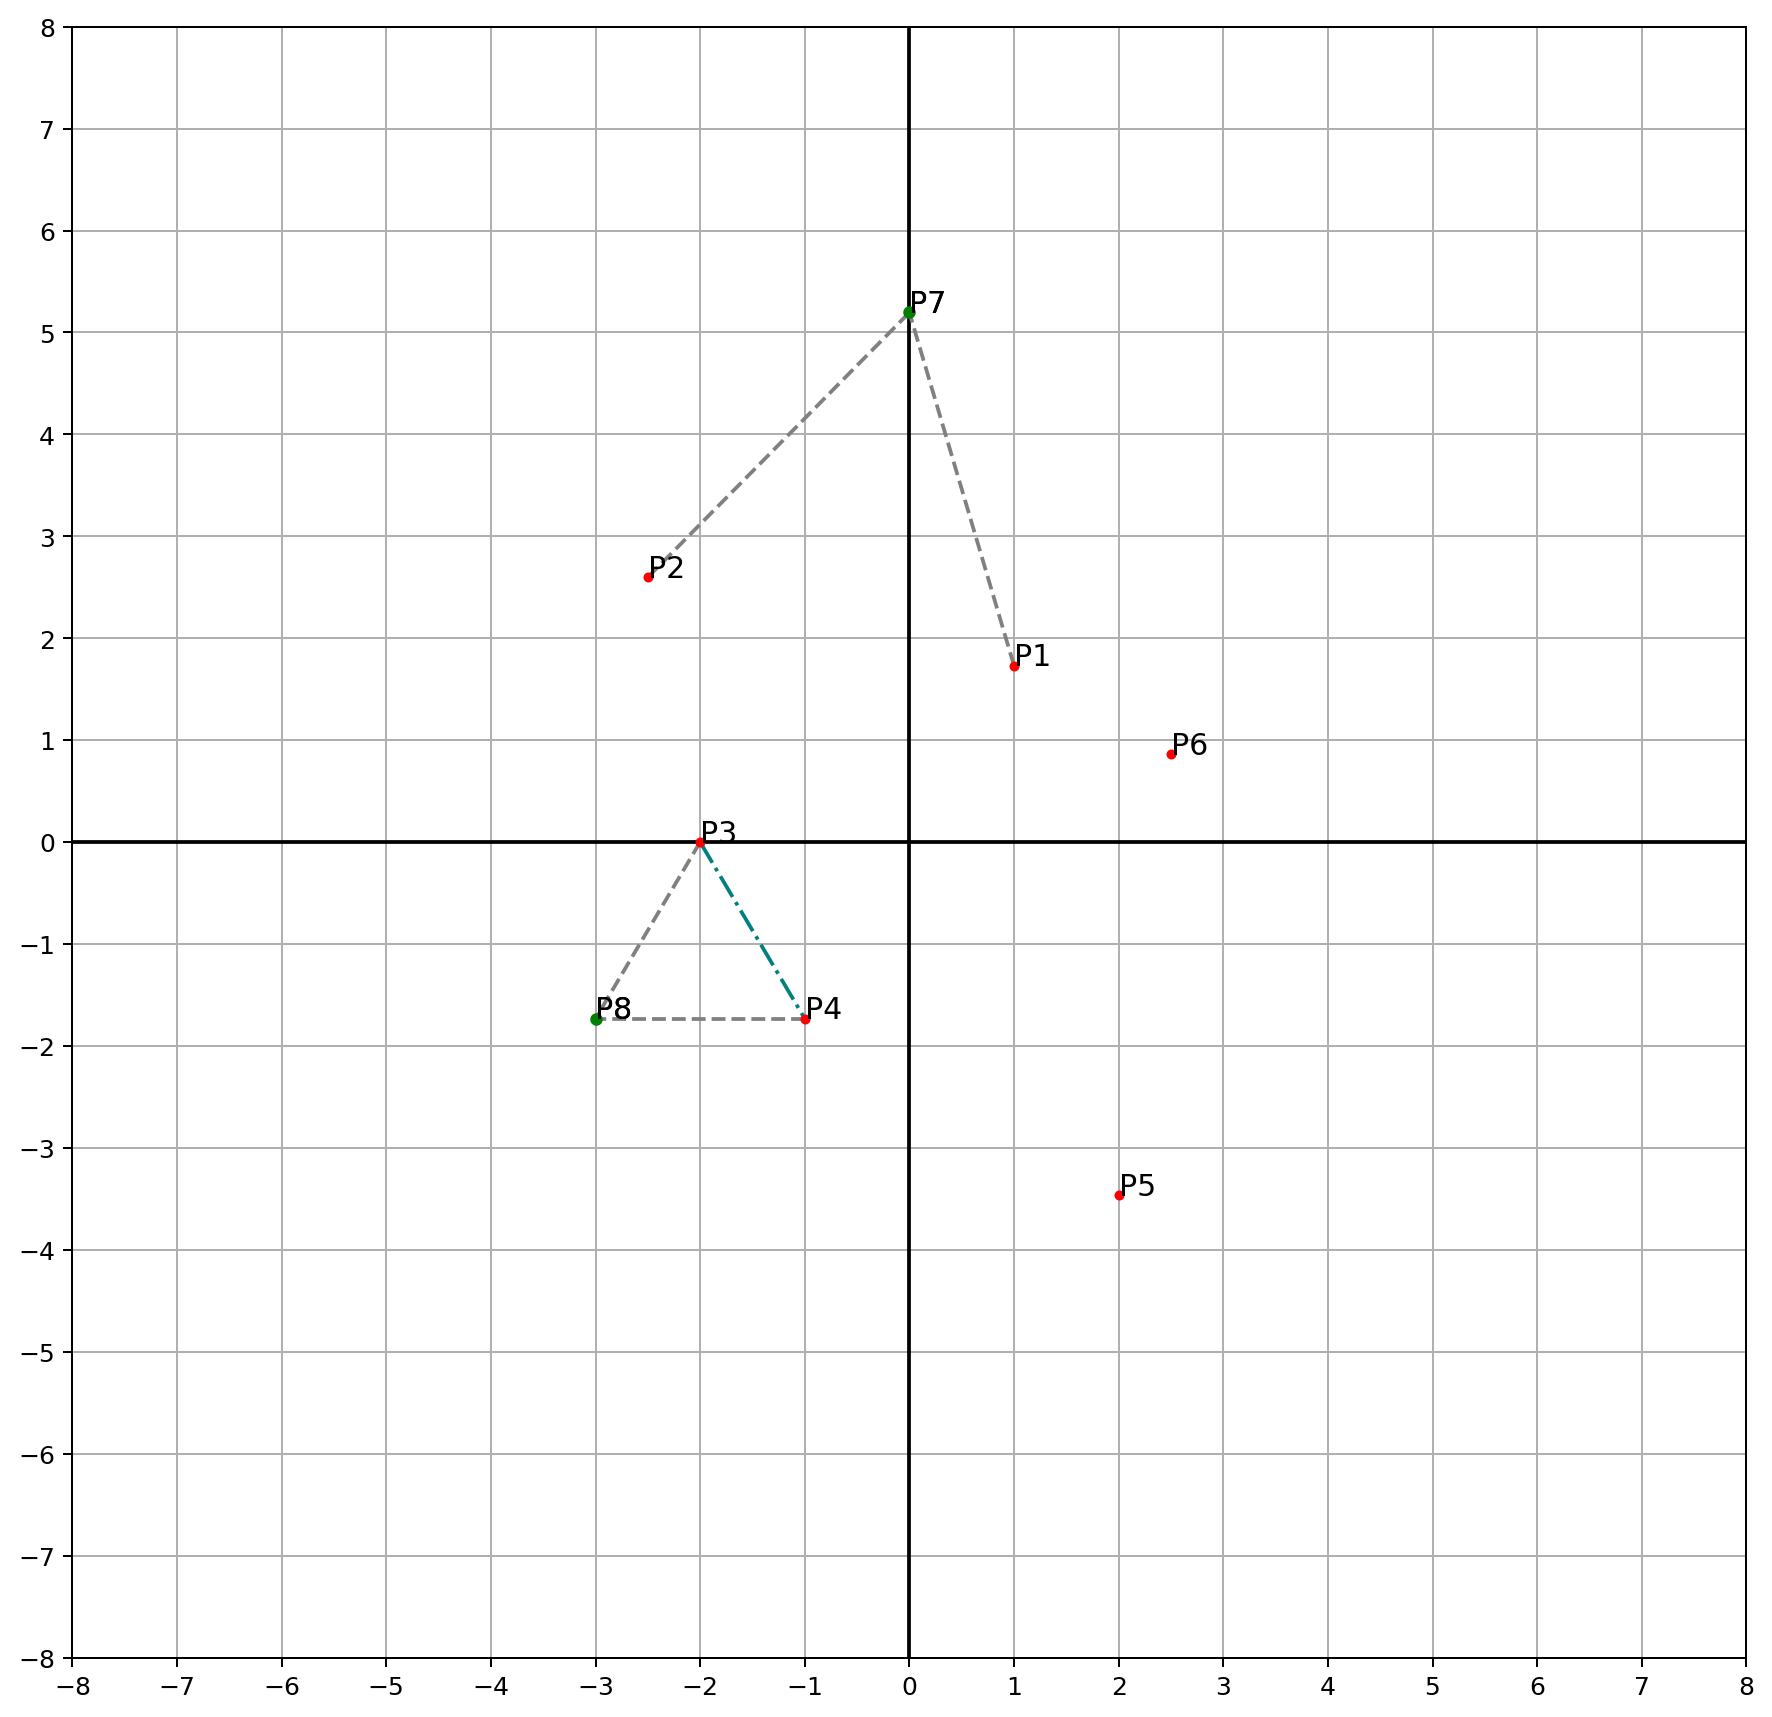

In [19]:
create_edge_point(x, y, 3, 4)

Строим вершины треугольников - S1 и S2:


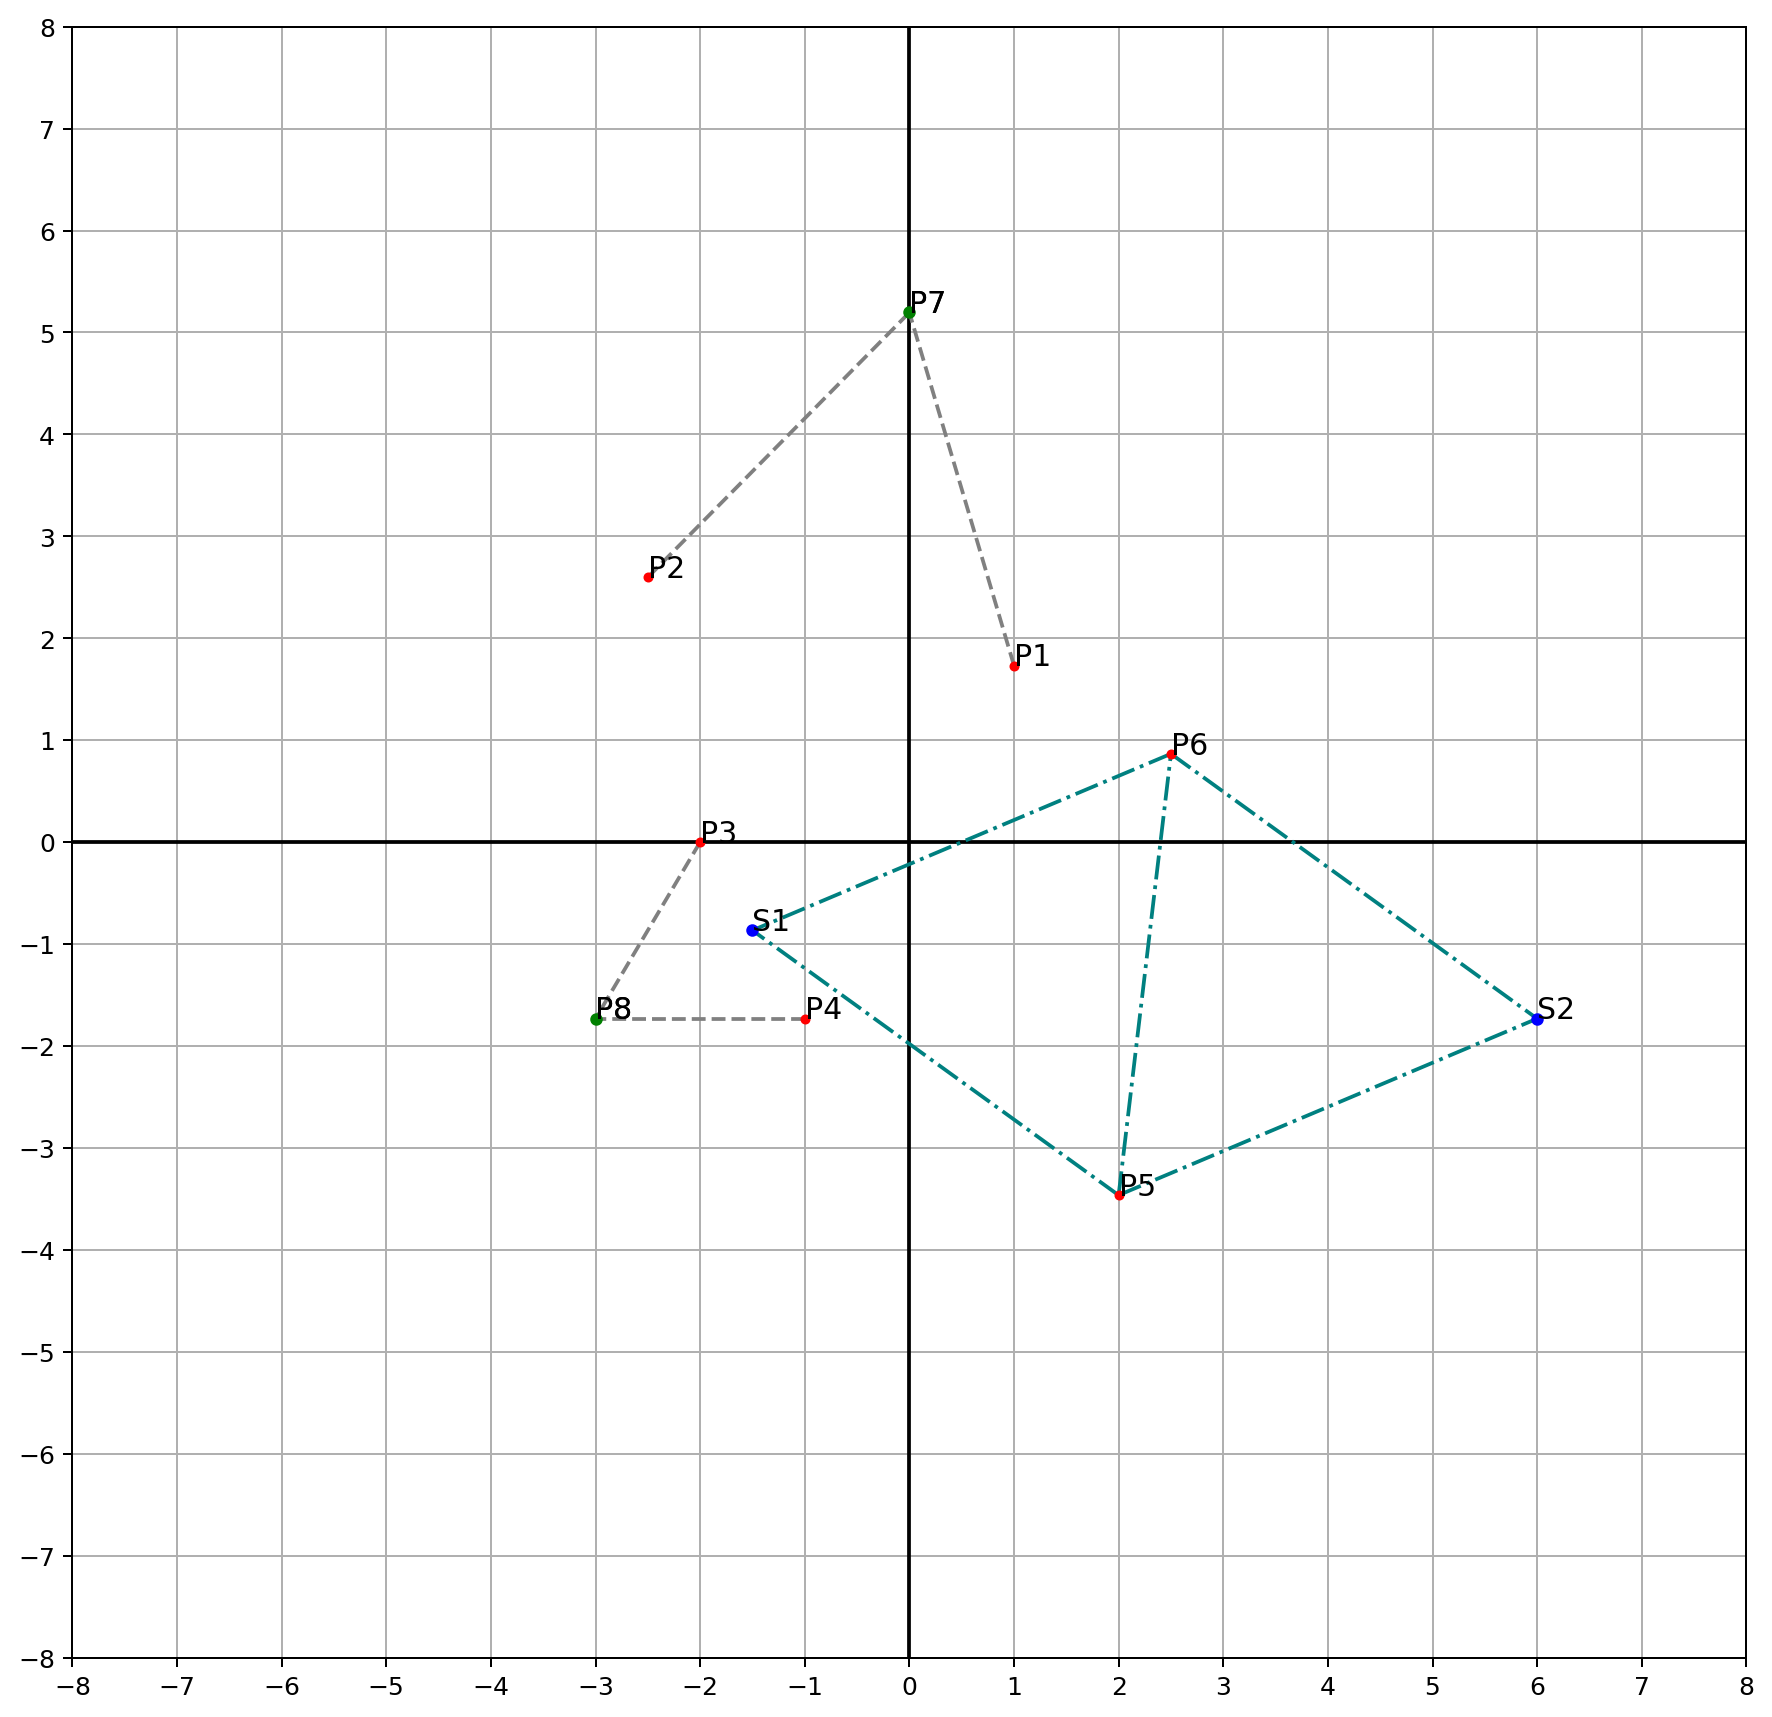

Выбрали необходимую граничную вершину P9:


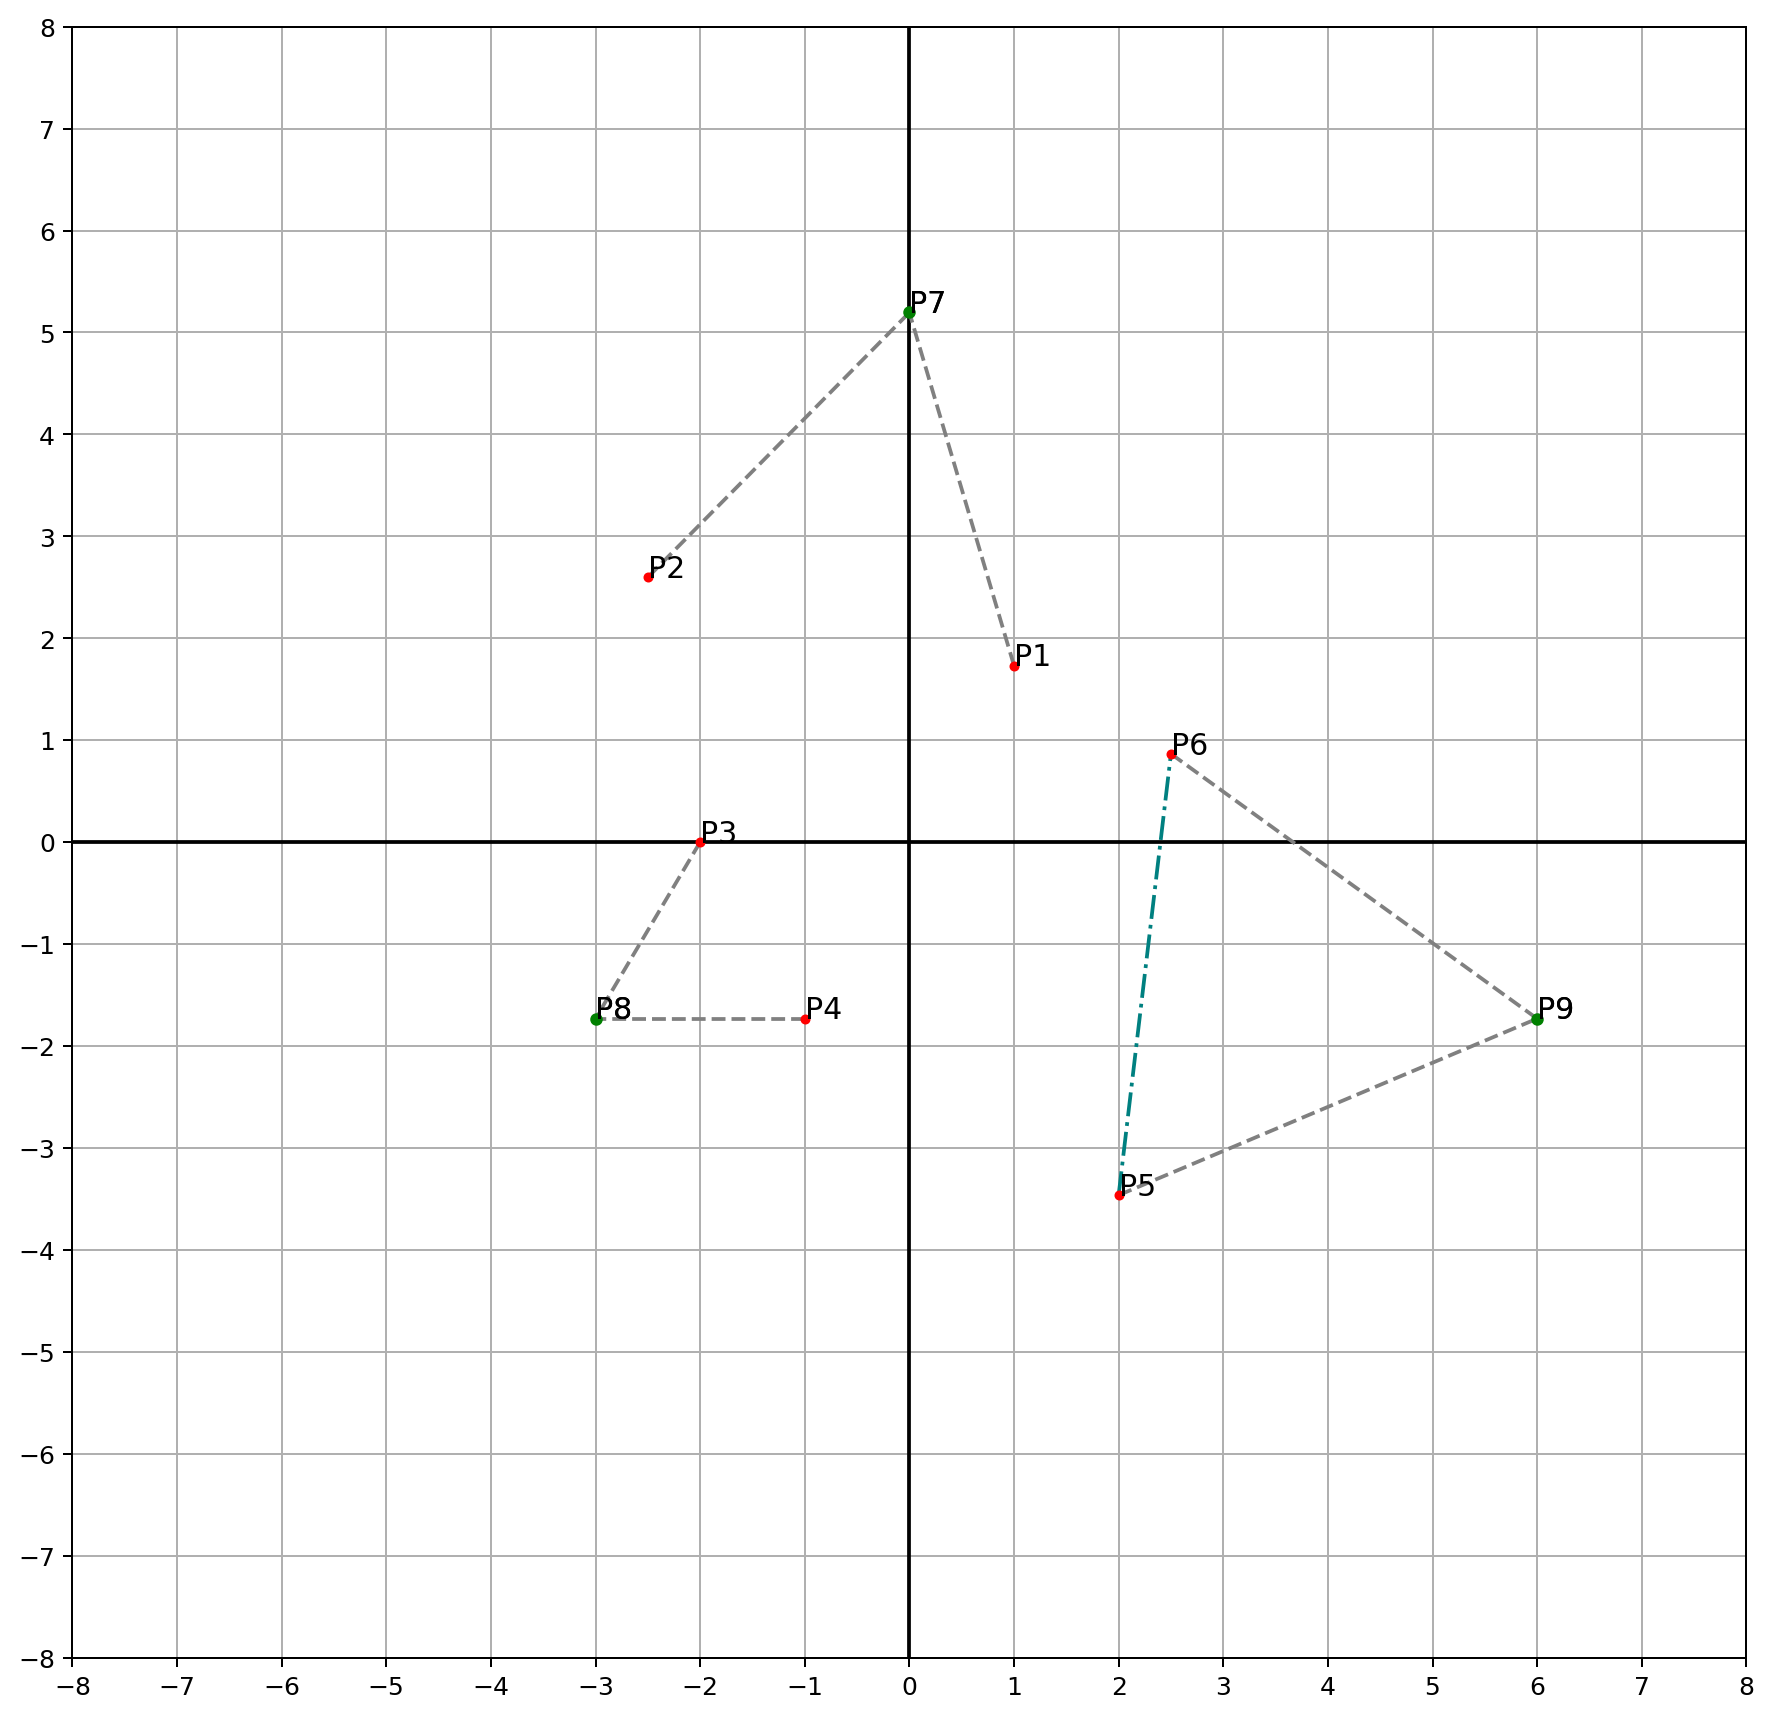

In [20]:
create_edge_point(x, y, 5, 6)

Строим вершины треугольников - S1 и S2:


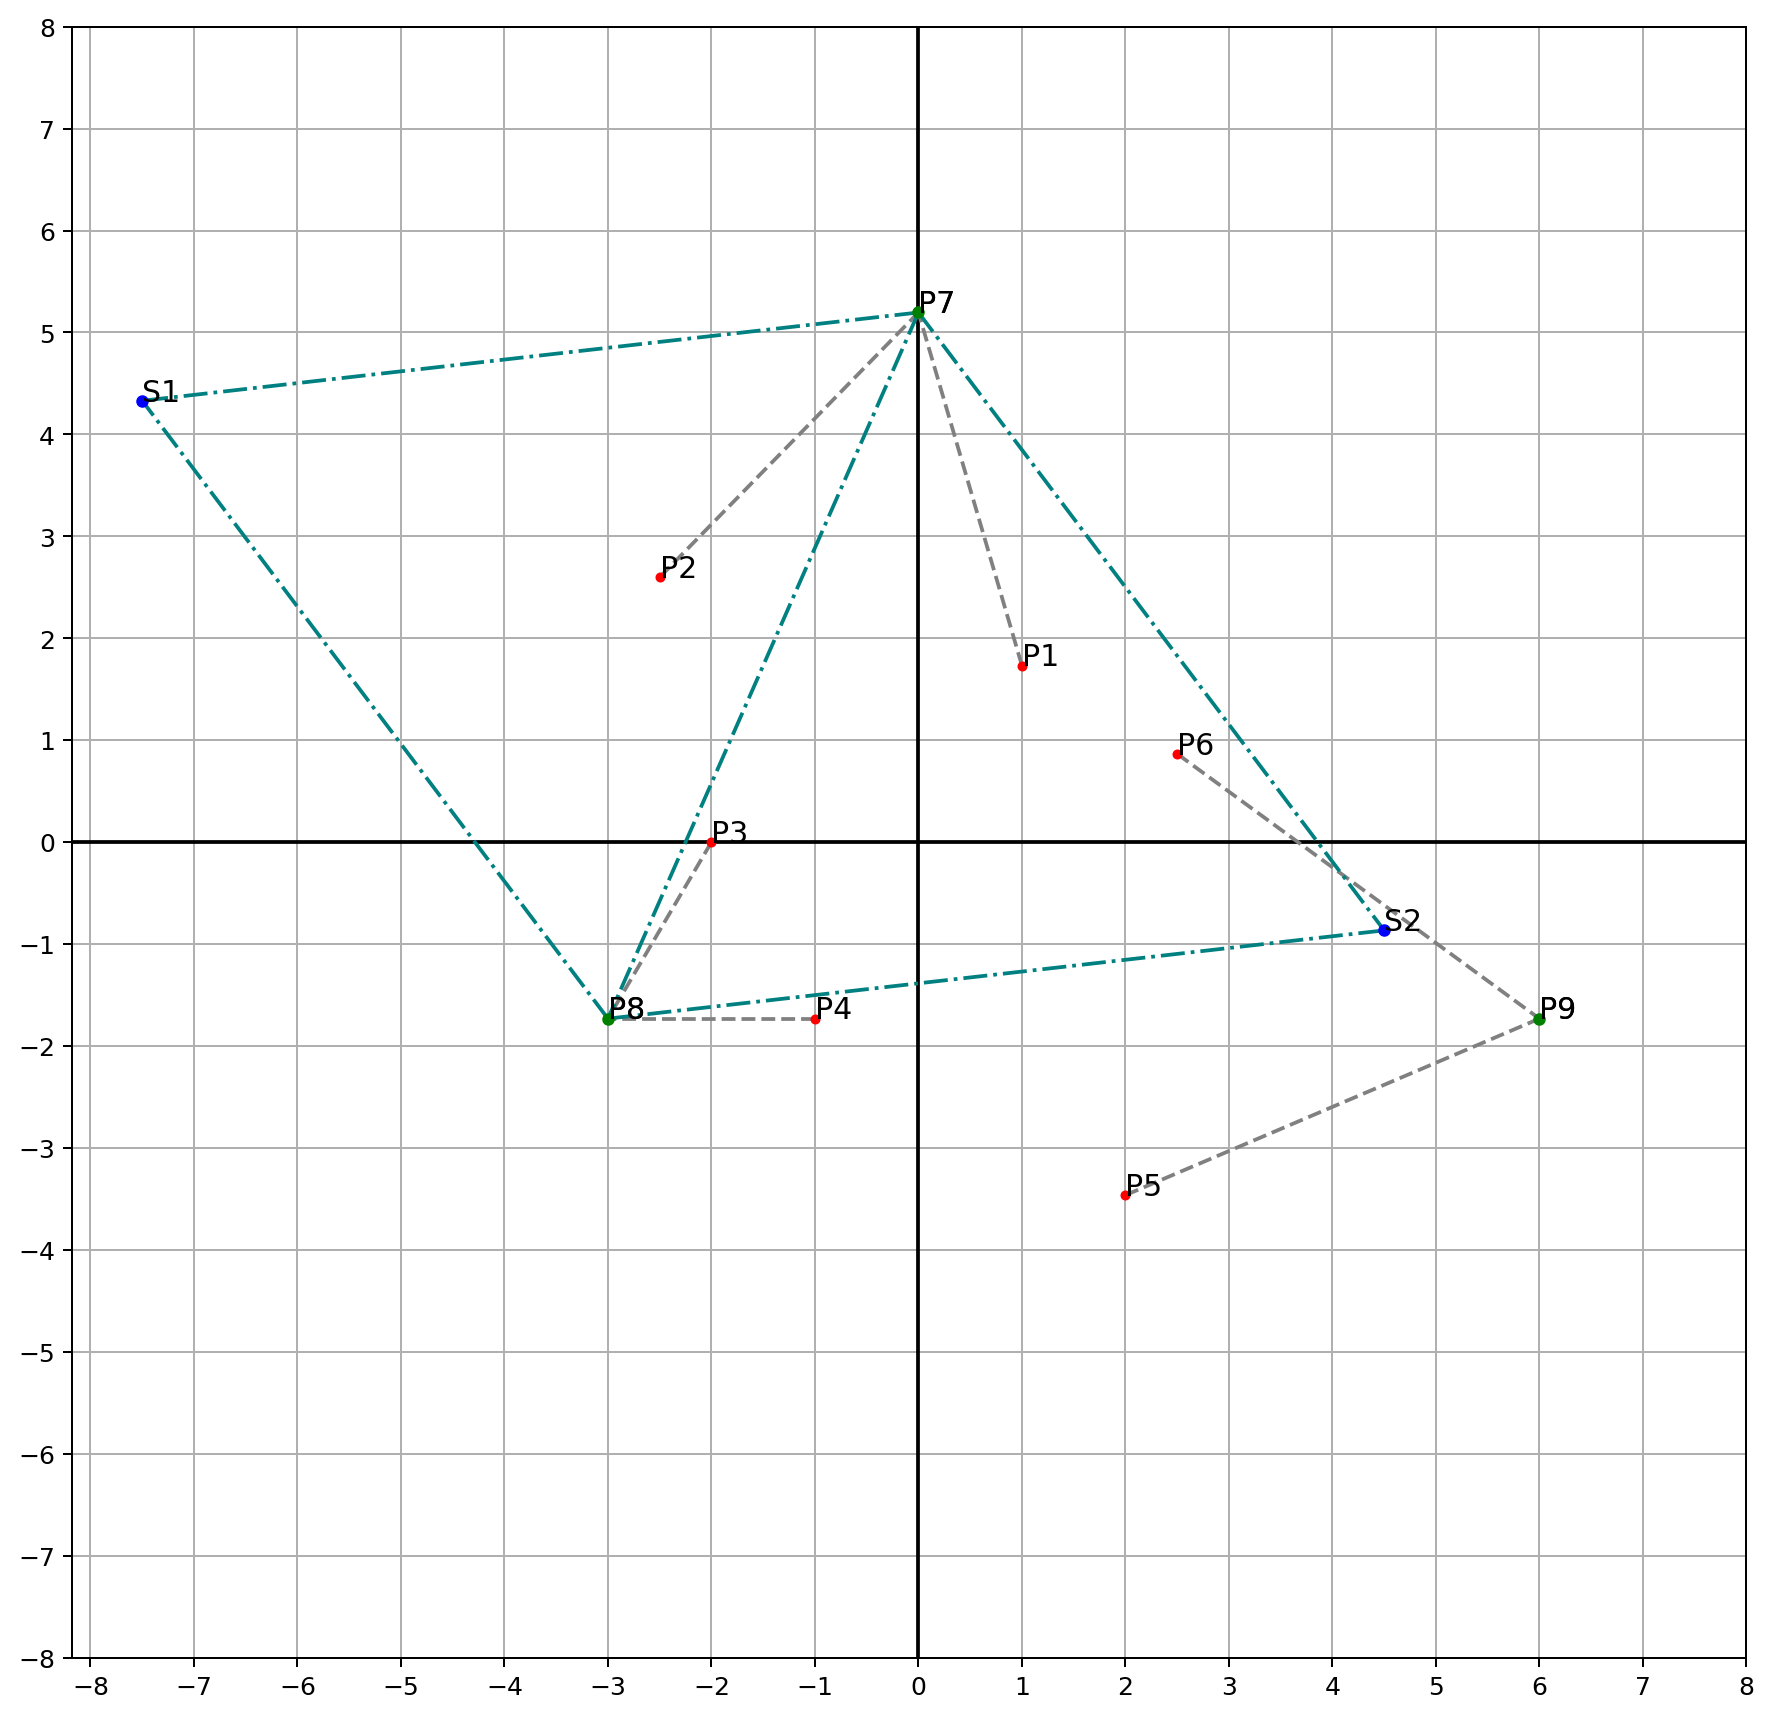

Выбрали необходимую граничную вершину P10:


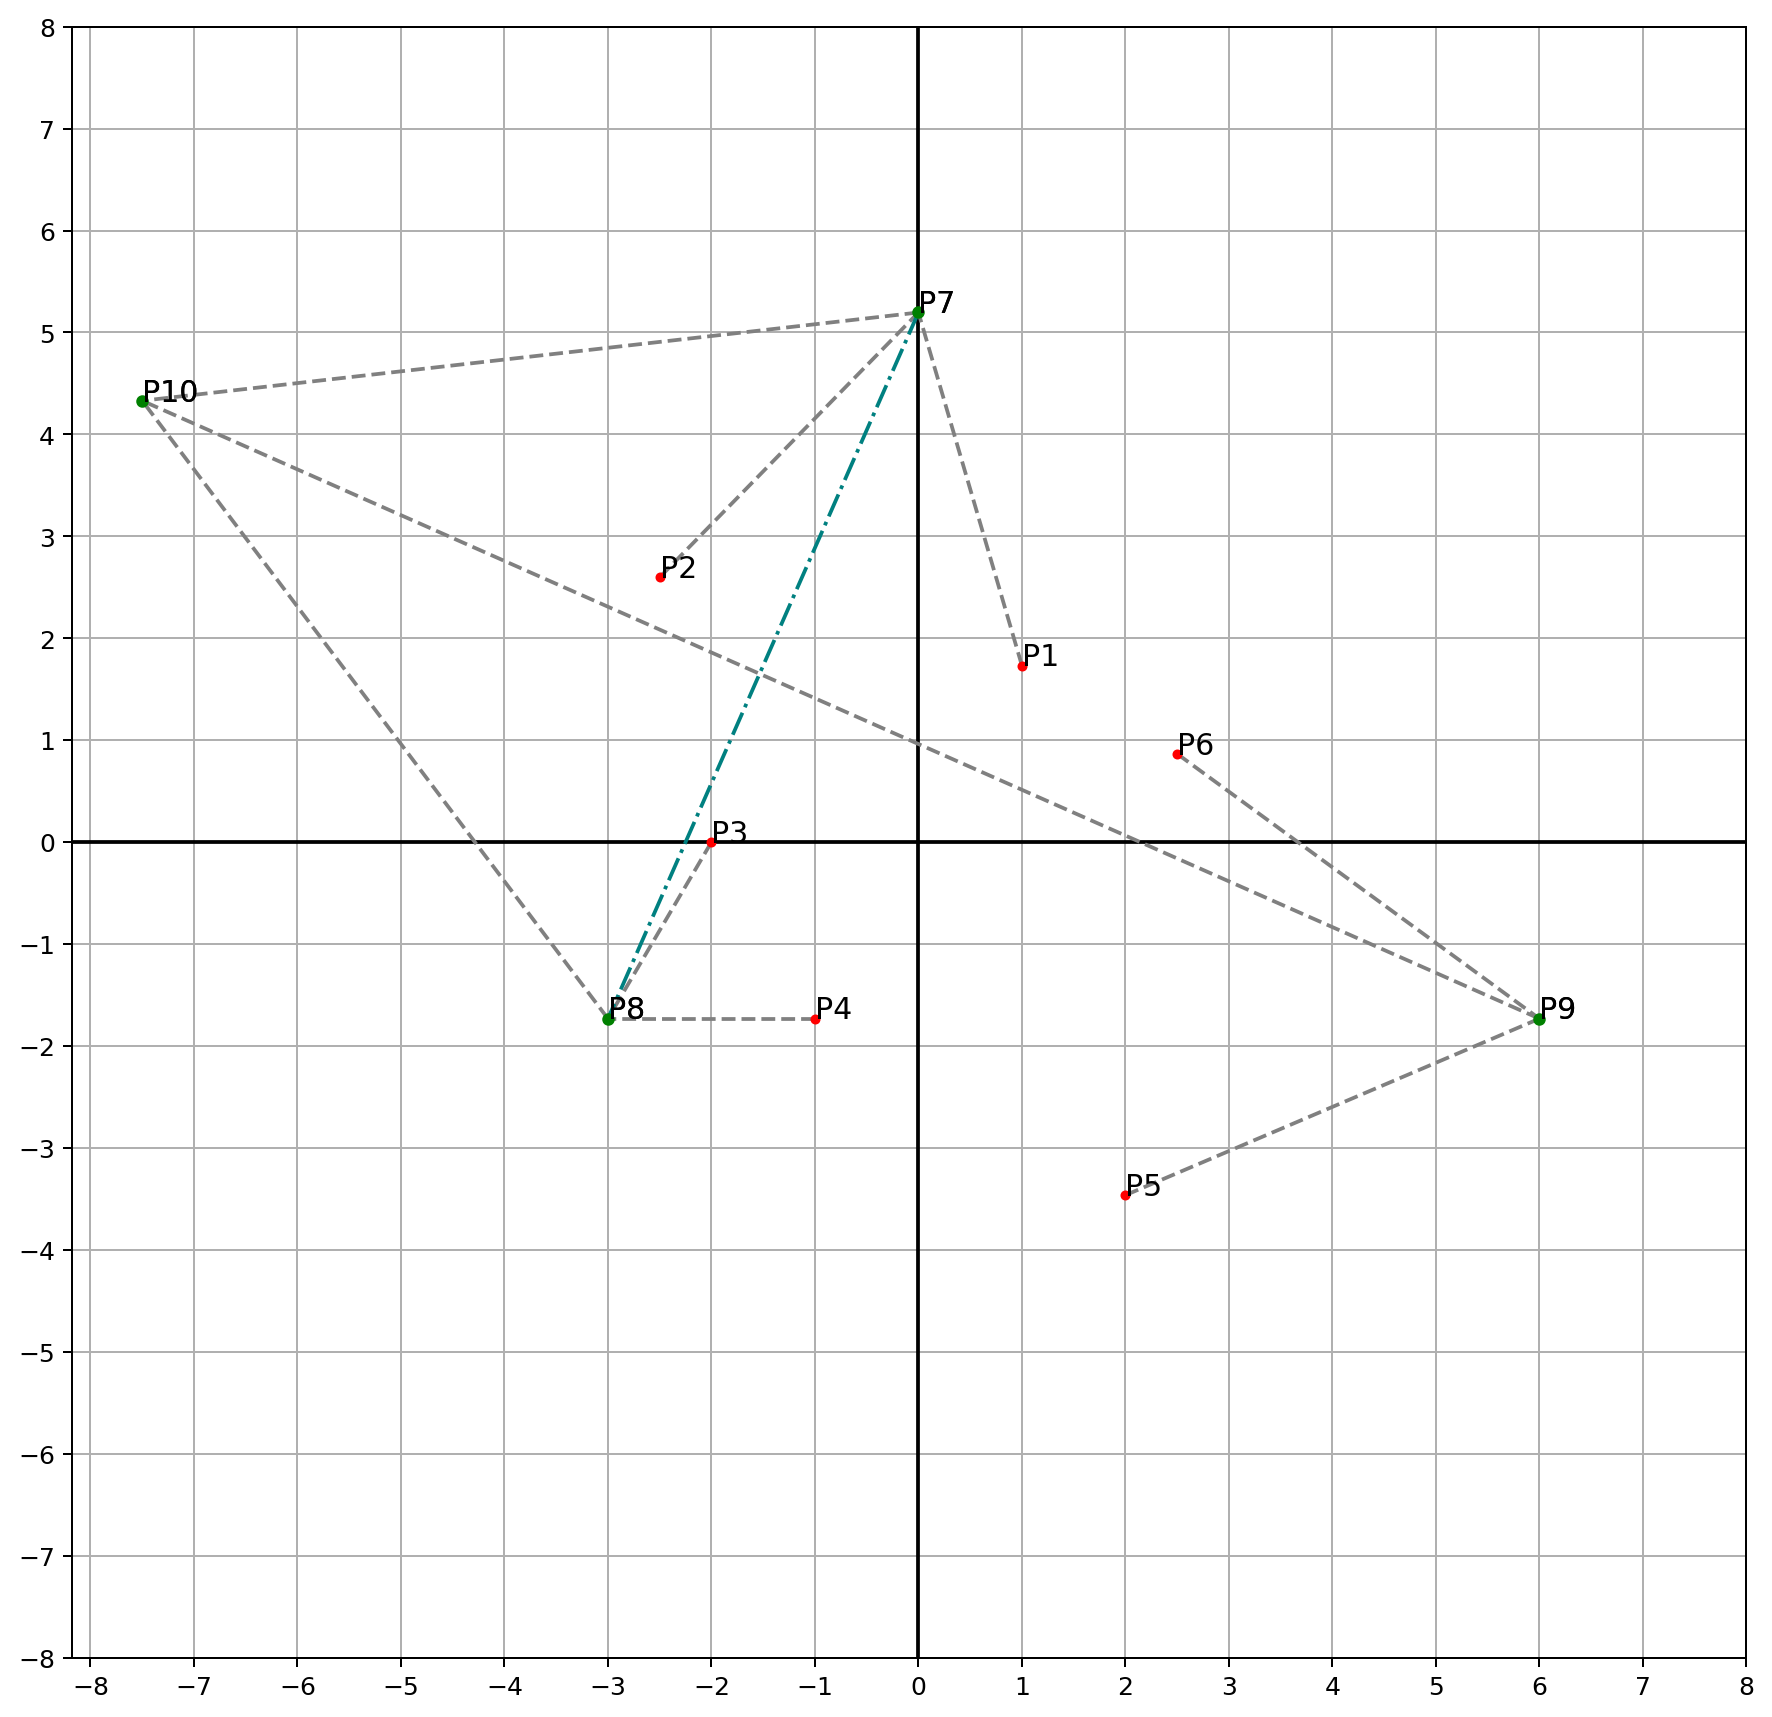

In [21]:
create_edge_point(x, y, 7, 8)

<div style="page-break-after: always;"></div>

### Обратный ход алгоритма

In [22]:
def create_stein_point(x, y, k1, k2, k3, l):
    k1 -= 1
    k2 -= 1
    k3 -= 1
    l -= 1
    a, b, r = get_center(x[k1], y[k1], x[k2], y[k2], x[k3], y[k3])
    print 'Нашли центр описанной окружности с радиусом {} и центром в S1:'.format(r)
    draw(x, y, [a], [b])
    exp = is_intersect(x[k1], y[k1], x[k2], y[k2], x[k3], y[k3], x[l], y[l])
    if exp:
        print 'Check: OK'
        x_stein, y_stein = find_intersection(a, b, x[k3], y[k3], x[l], y[l], r)
        print 'Нашли положение новой точки Штейнера - S1:'
        draw(x, y, [x_stein], [y_stein], connect=(k1, k2))
        x[k3], y[k3] = x_stein, y_stein
        print 'Построили точку Штейнера P{}:'.format(k3+1)
        draw(x, y)
    else:
        raise ArithmeticError('Check failed')

Нашли центр описанной окружности с радиусом 4.35889894354 и центром в S1:


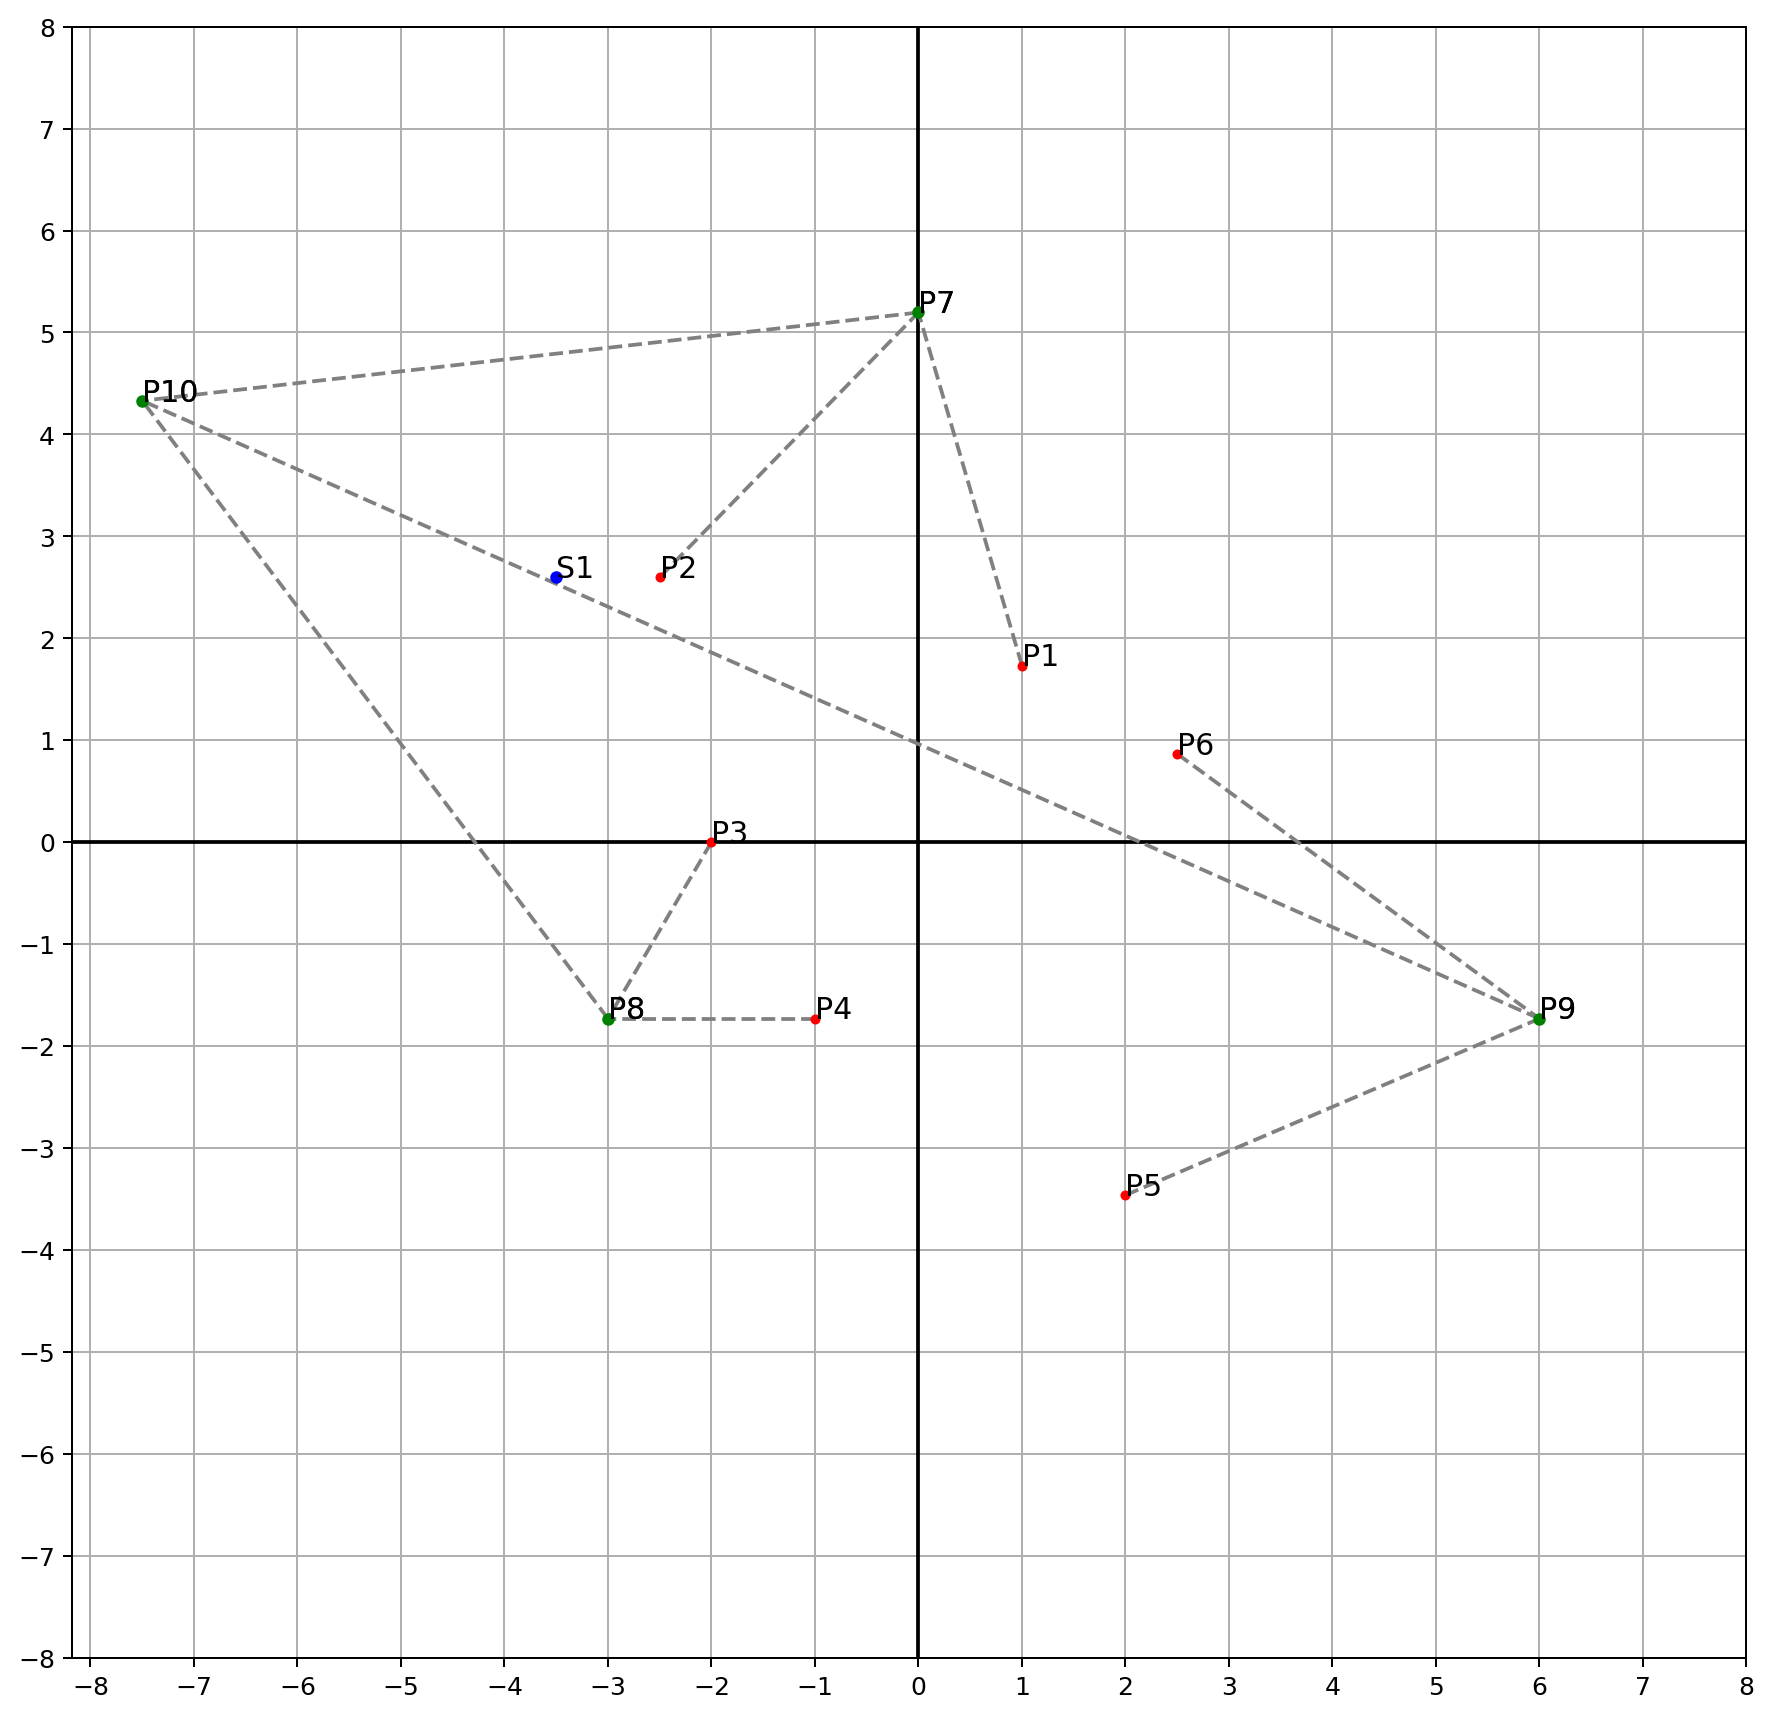

Check: OK
Нашли положение новой точки Штейнера - S1:


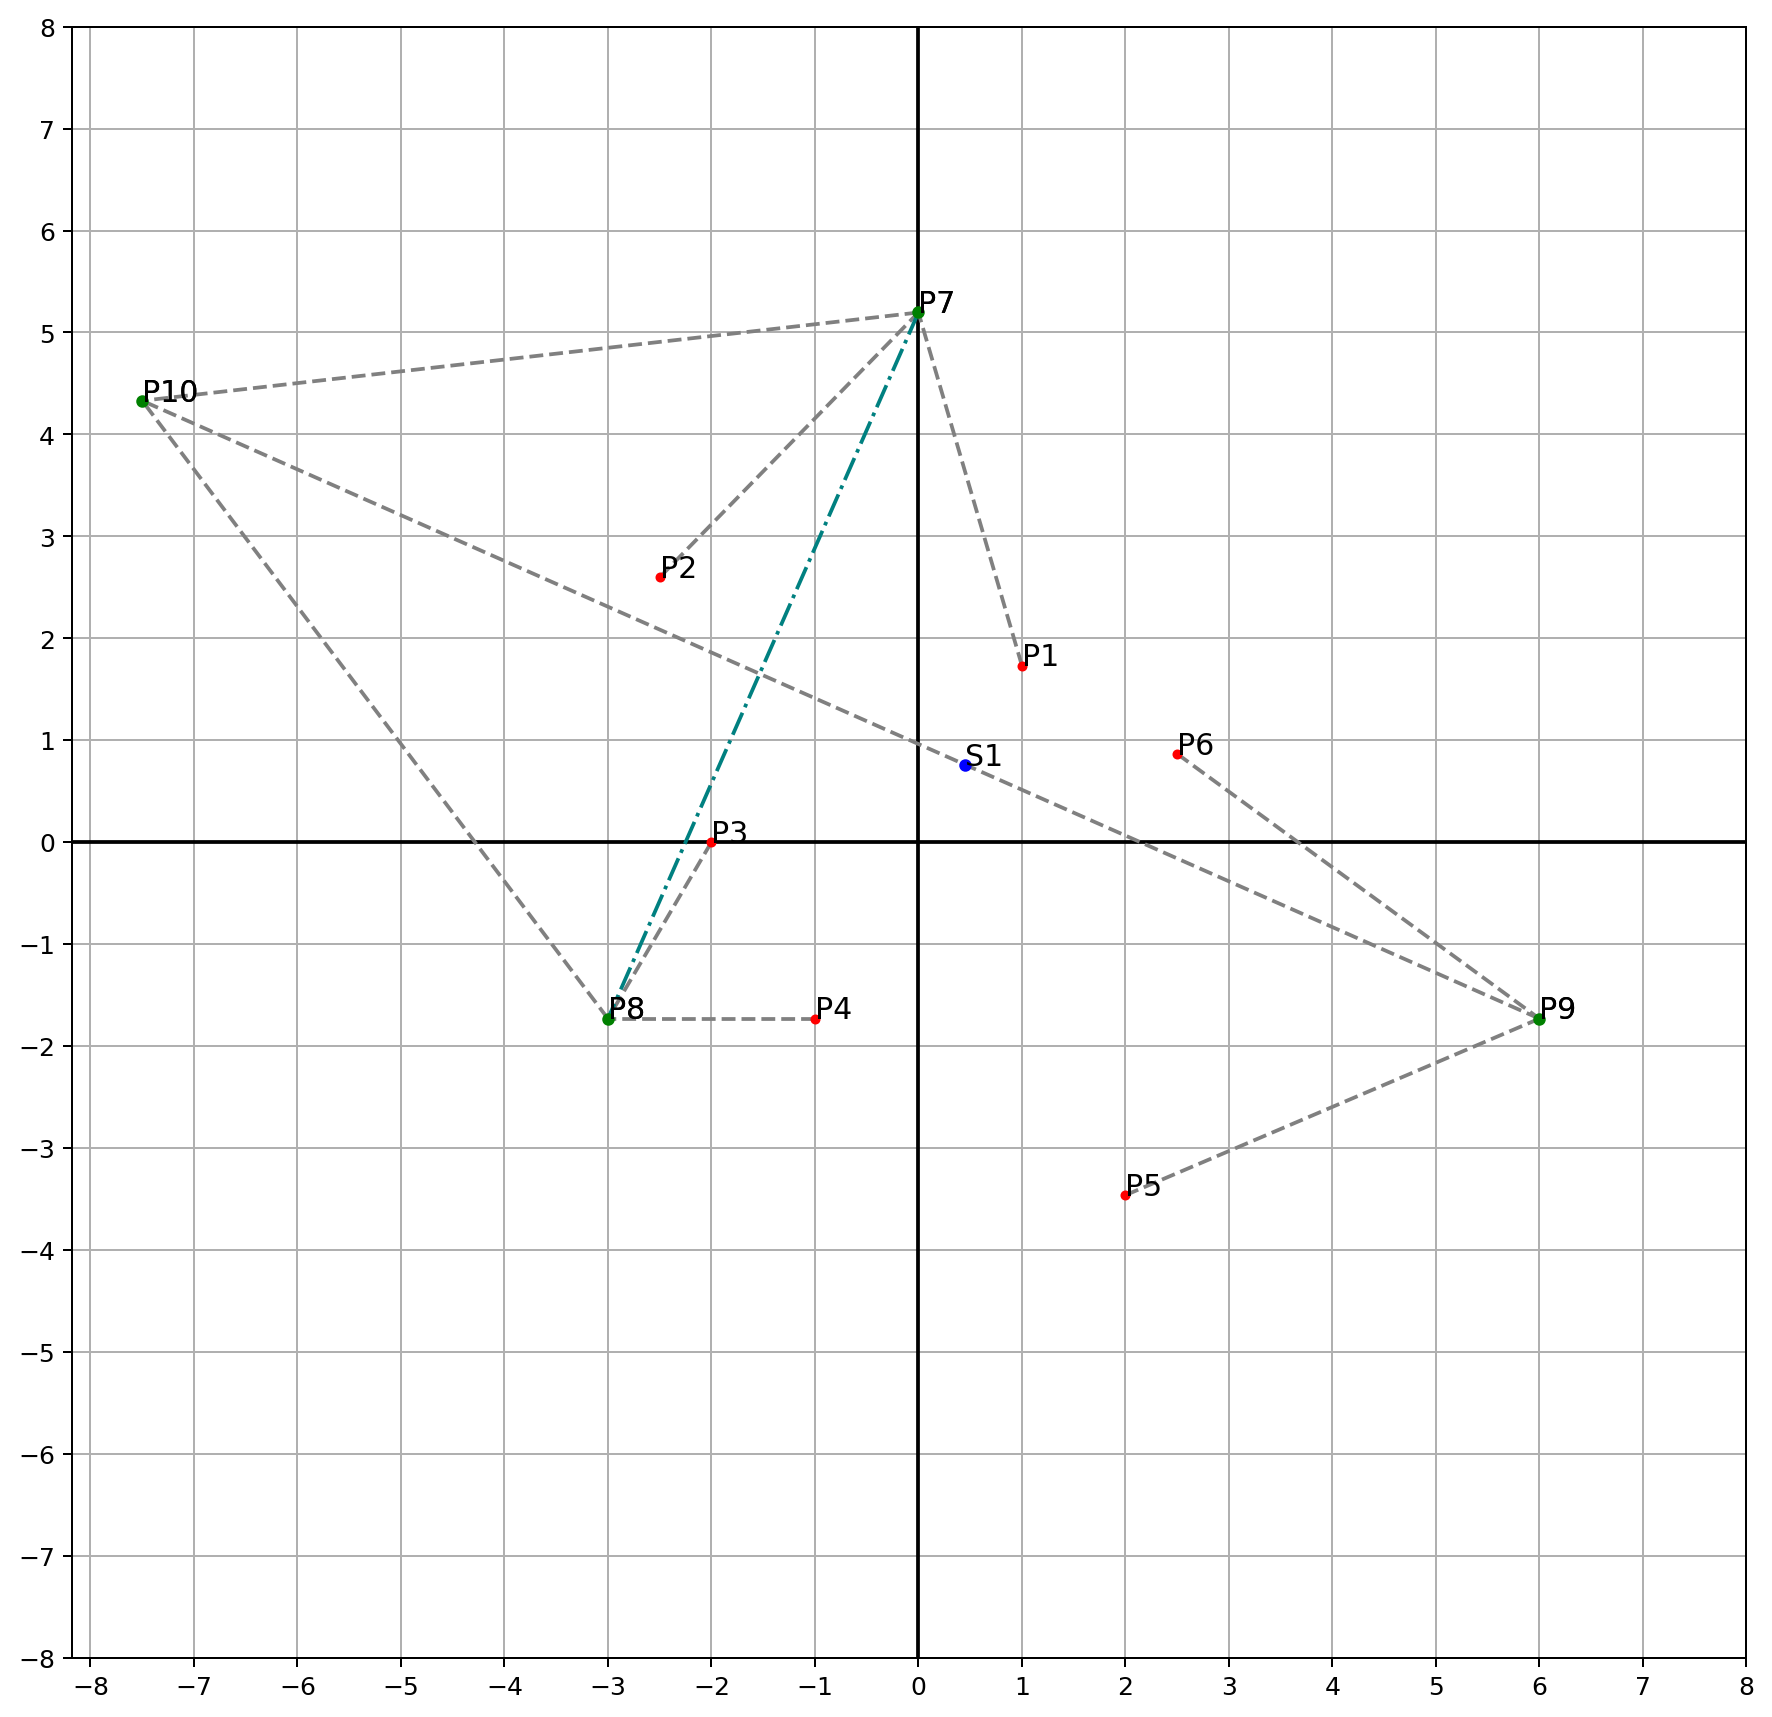

Построили точку Штейнера P10:


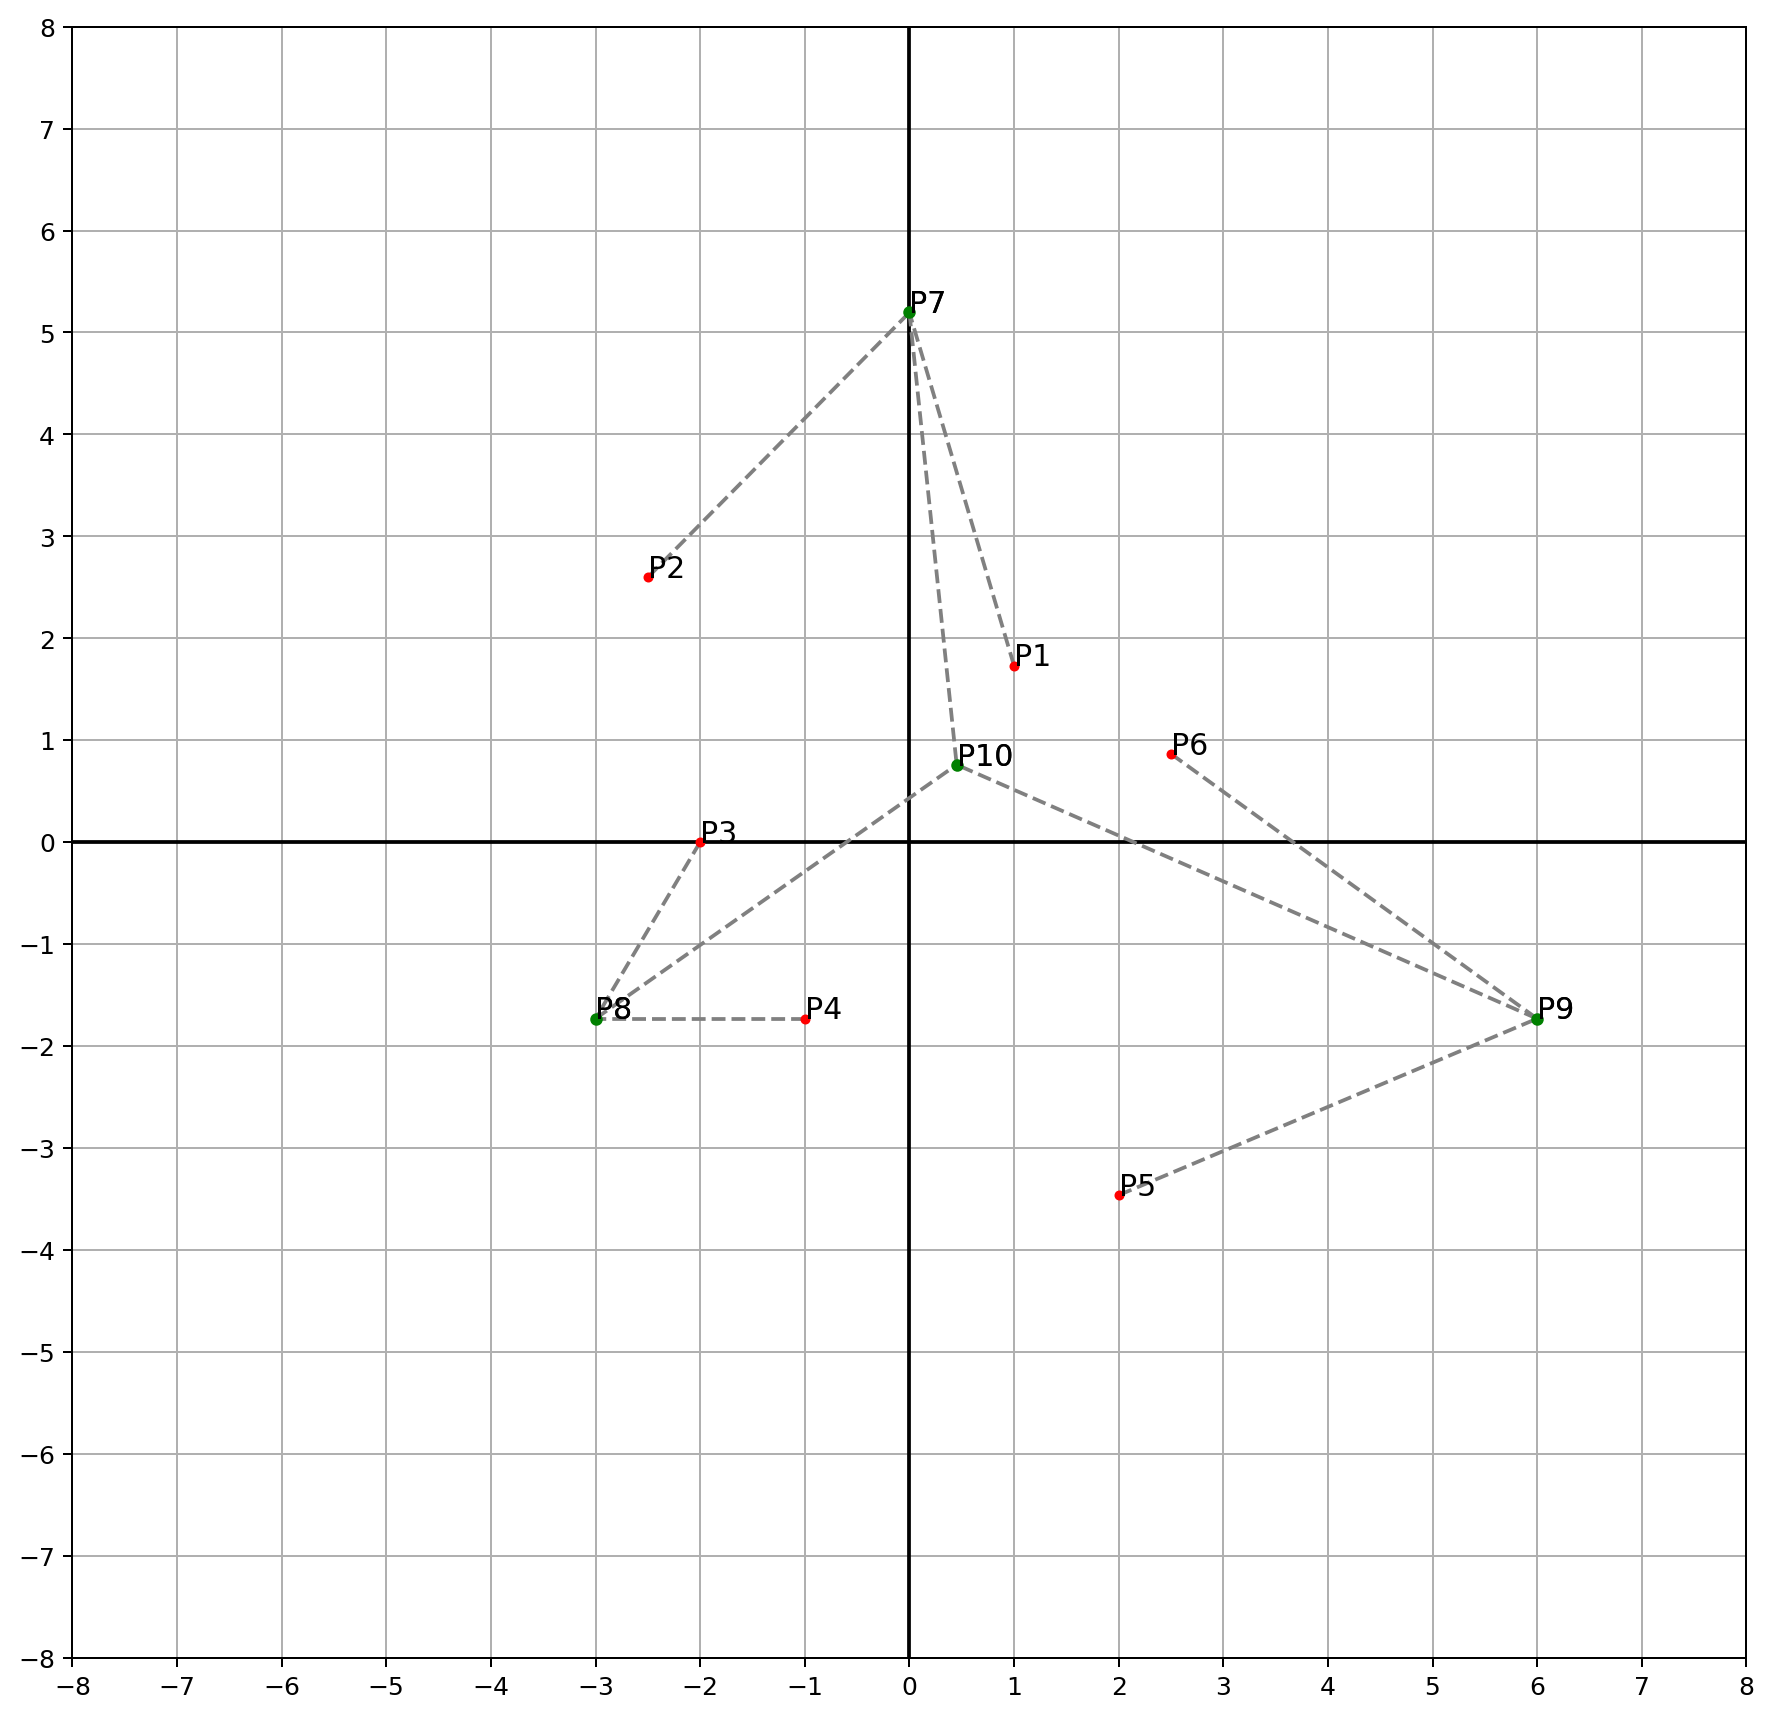

In [23]:
create_stein_point(x, y, 7, 8, 10, 9)

Нашли центр описанной окружности с радиусом 2.51661147842 и центром в S1:


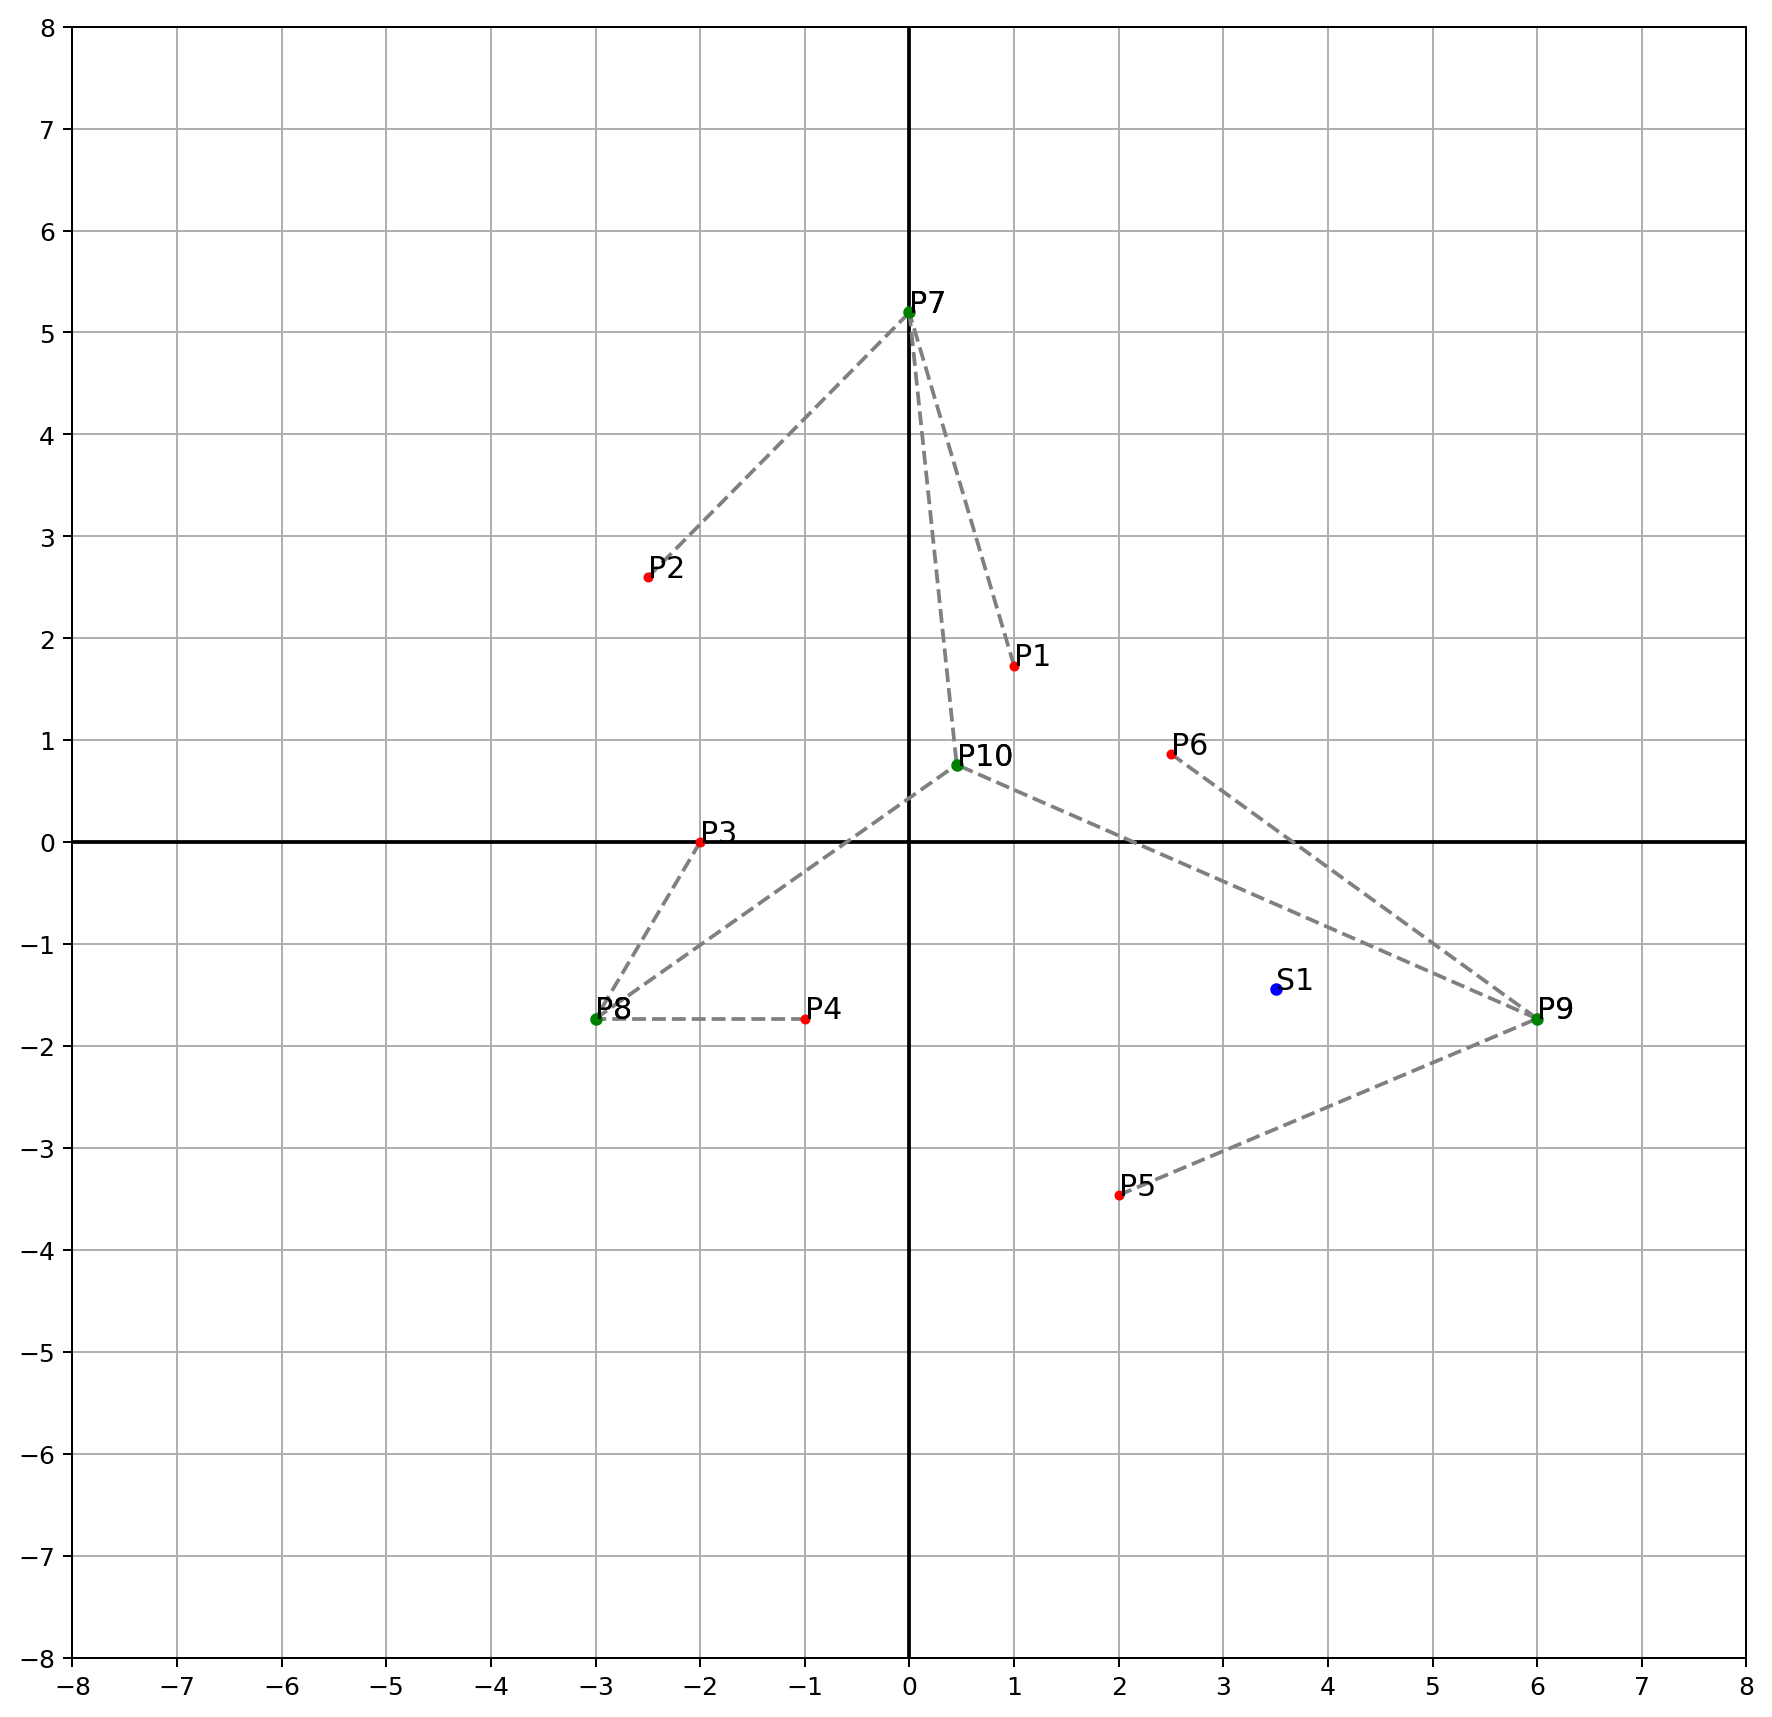

Check: OK
Нашли положение новой точки Штейнера - S1:


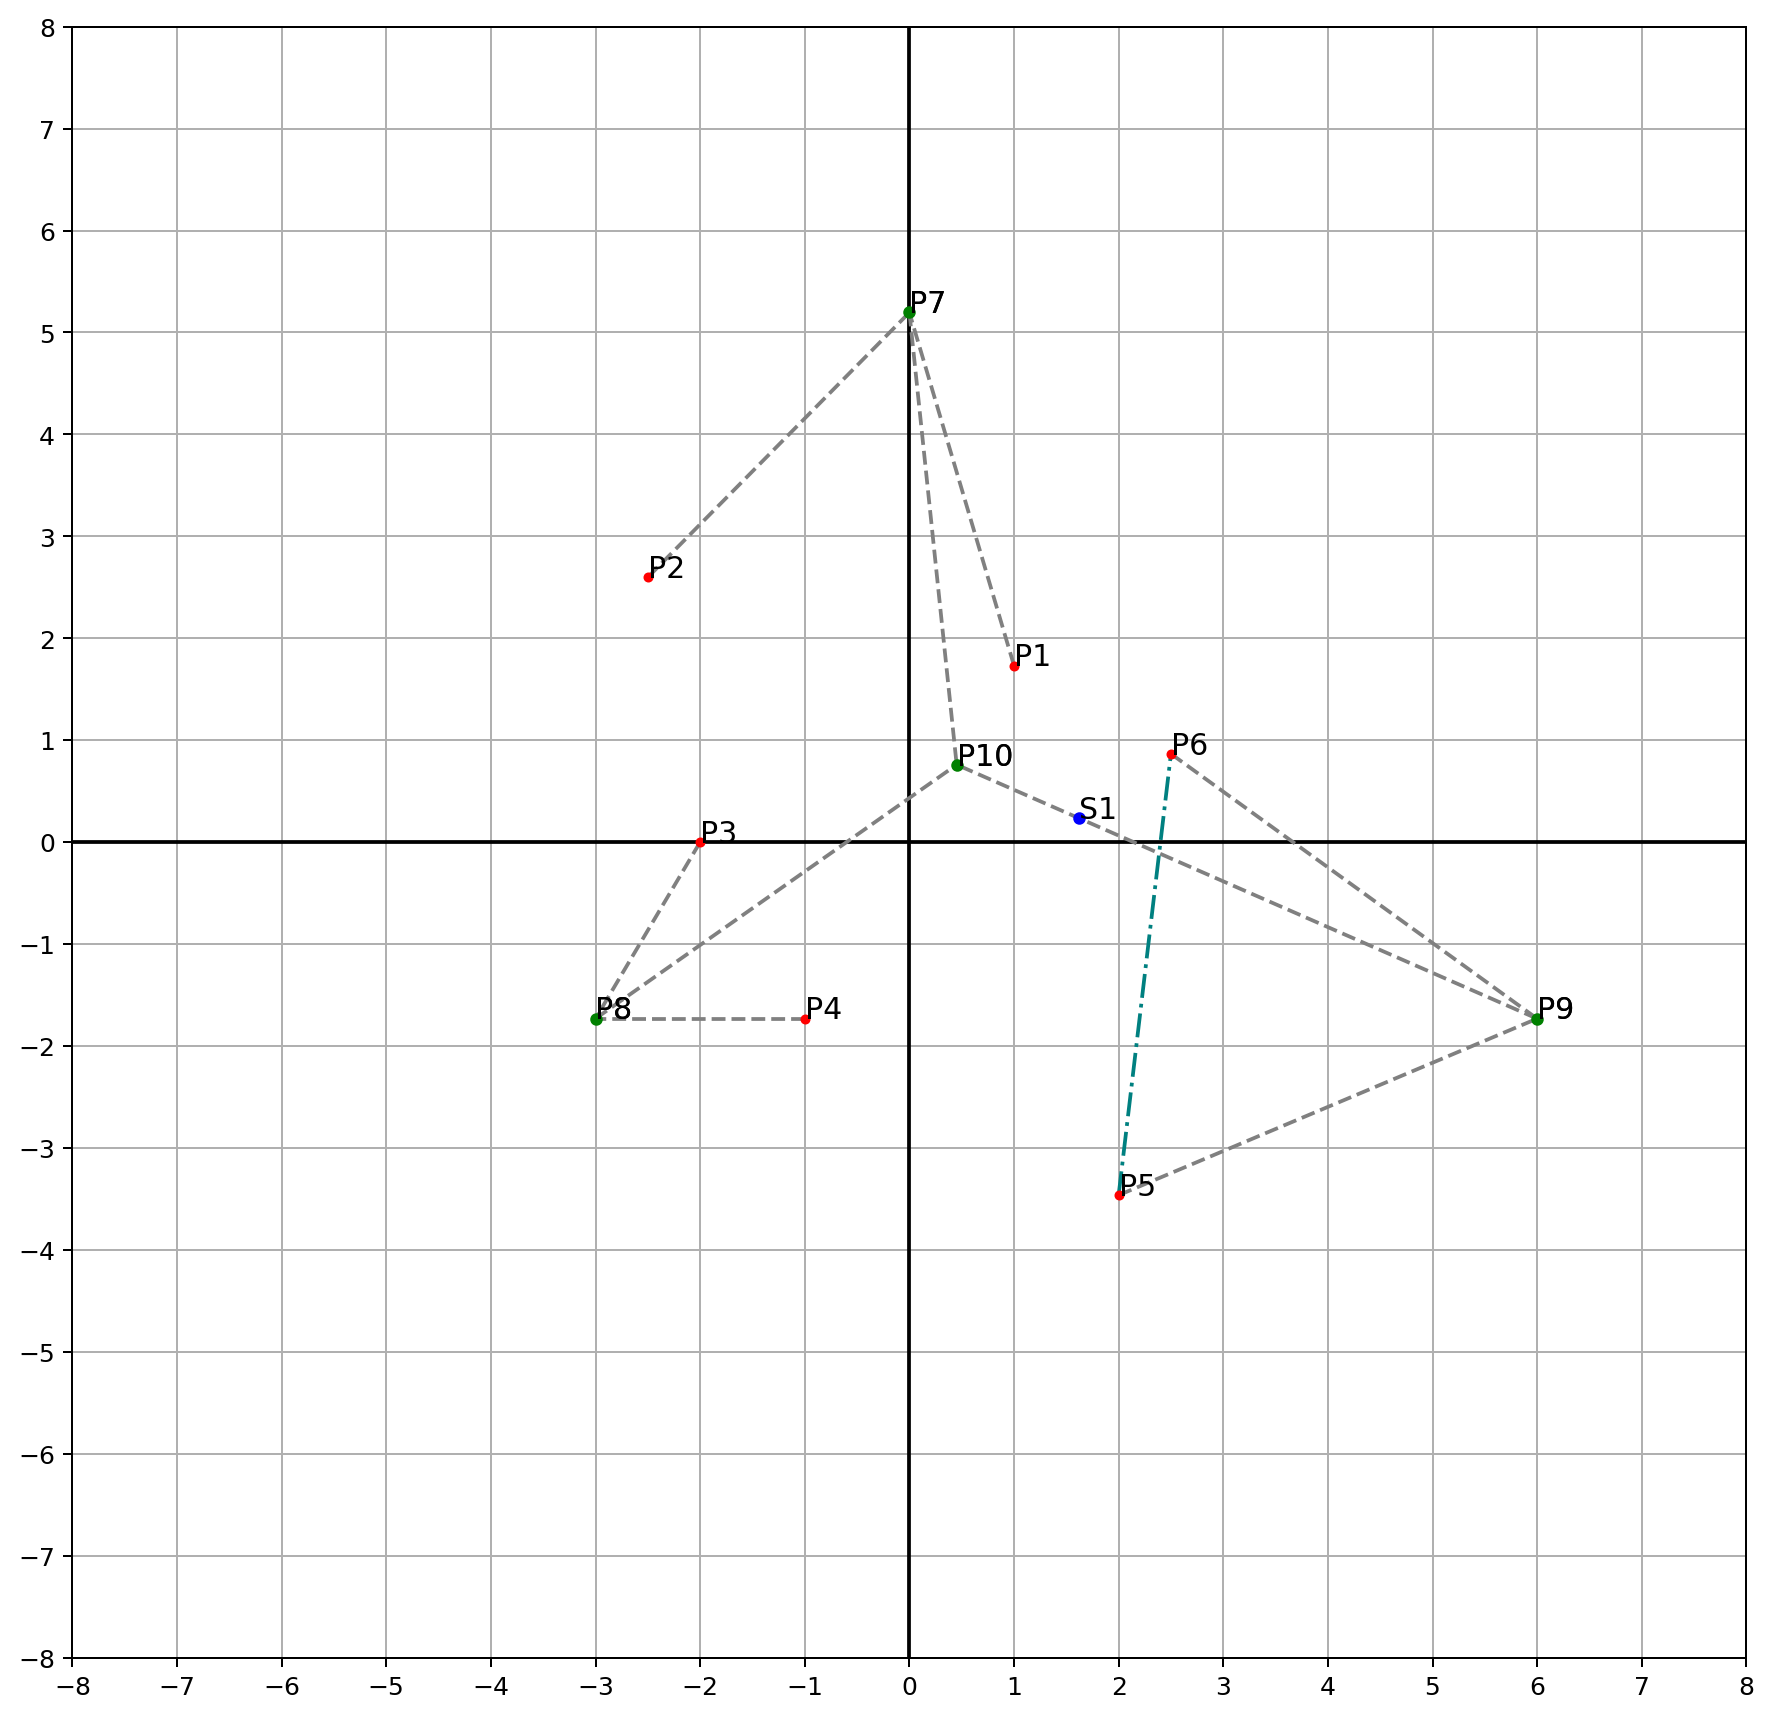

Построили точку Штейнера P9:


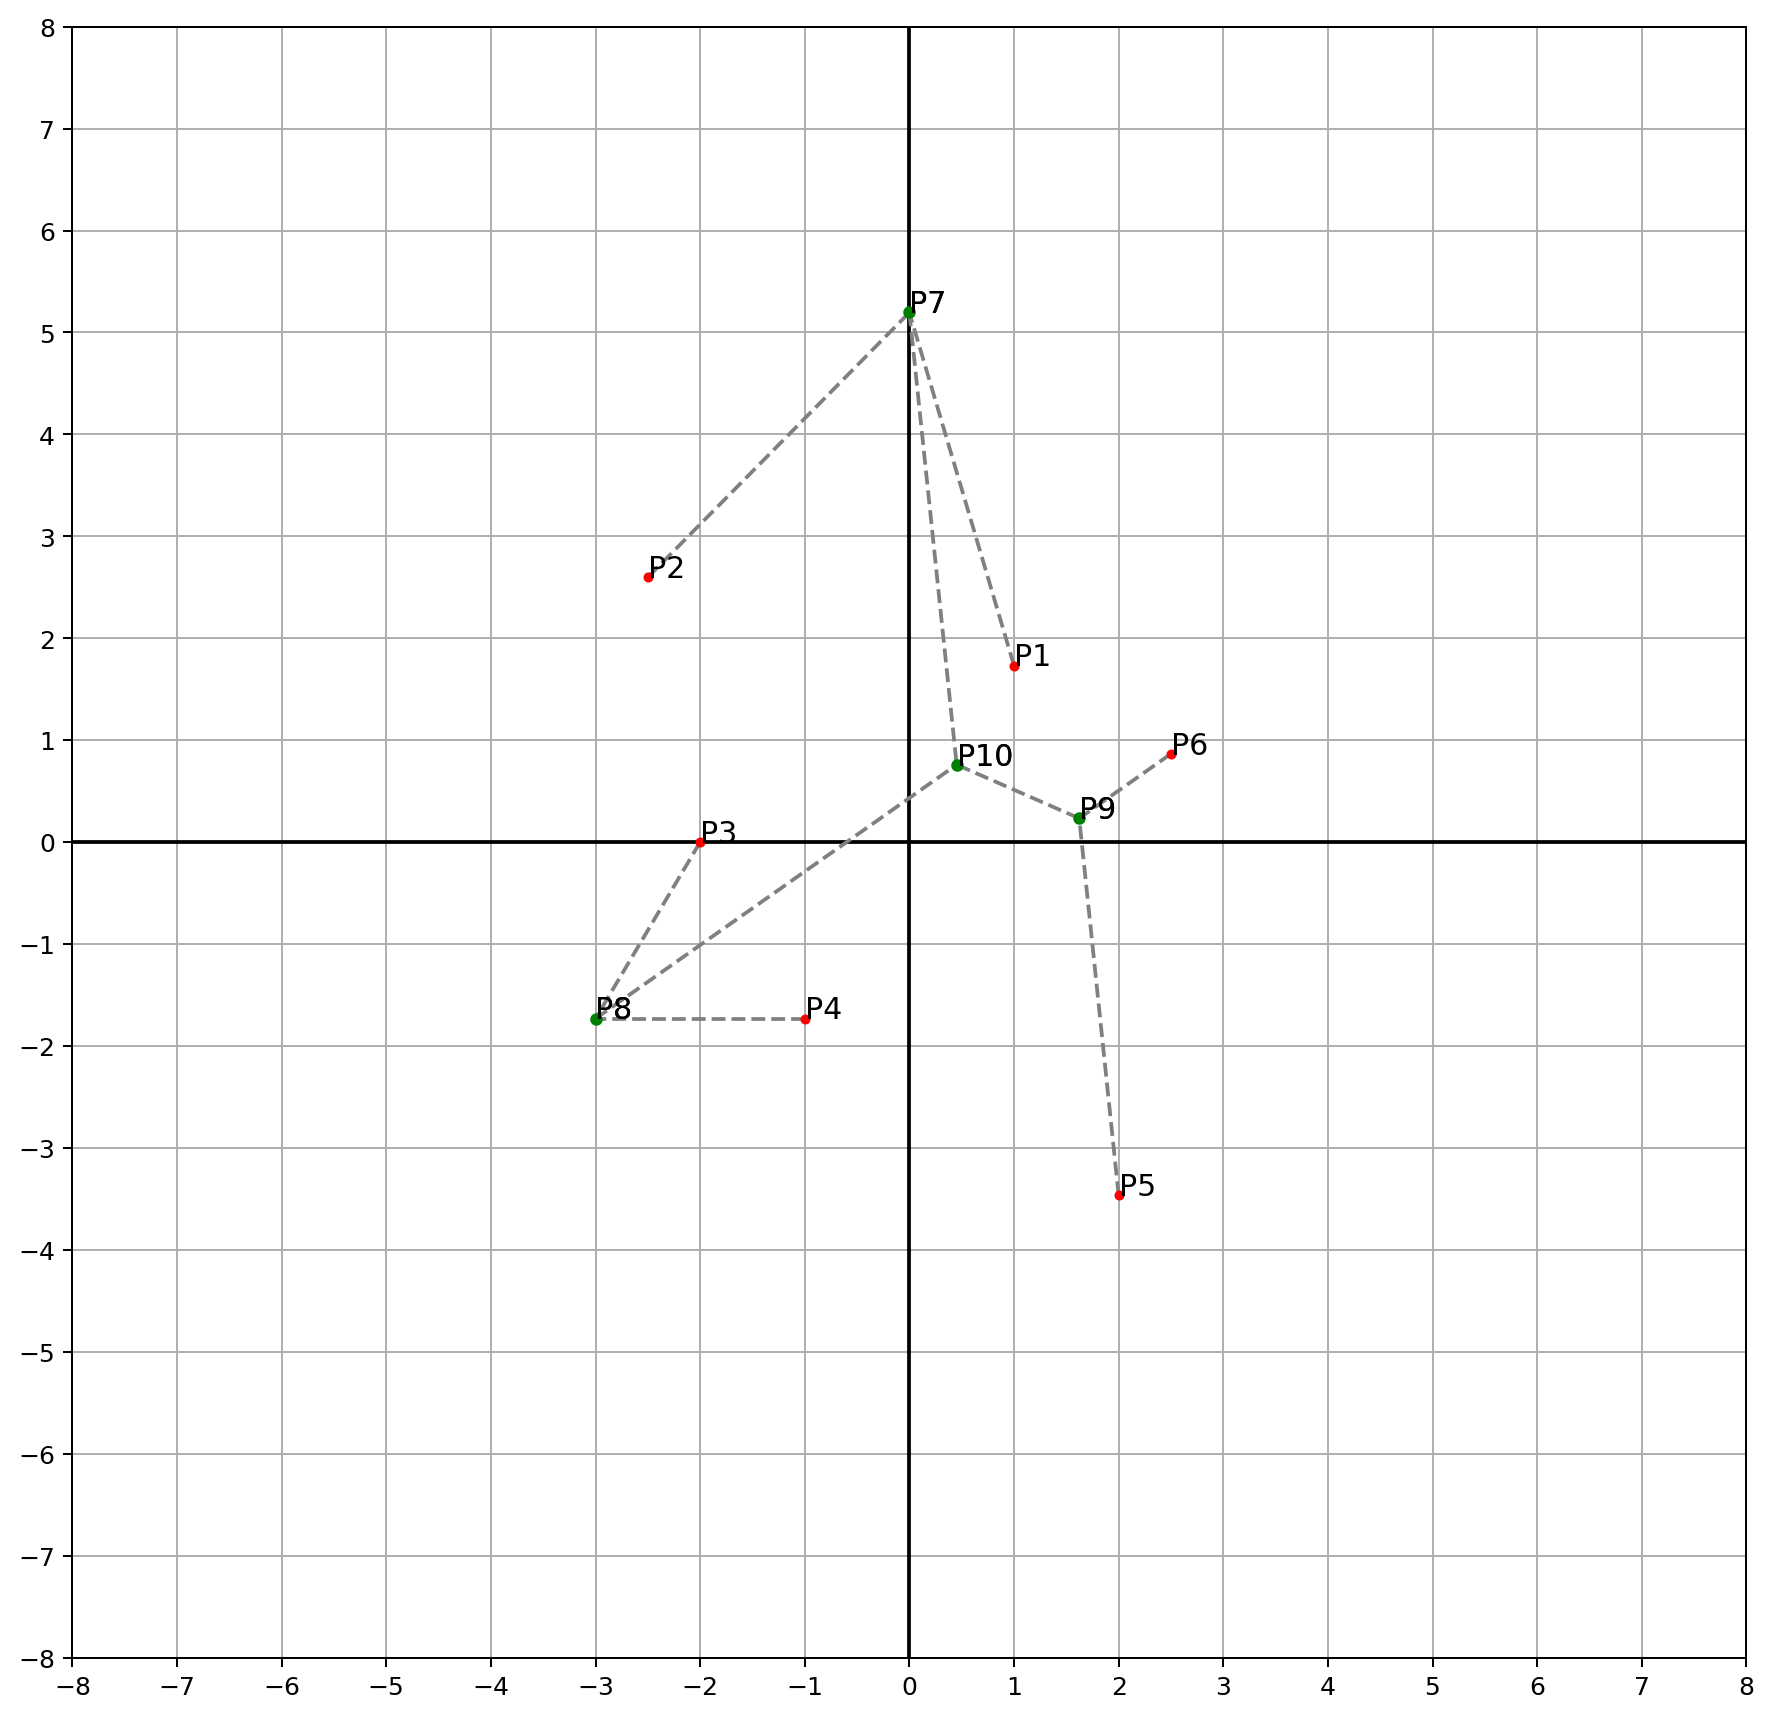

In [24]:
create_stein_point(x, y, 5, 6, 9, 10)

Нашли центр описанной окружности с радиусом 1.15470053838 и центром в S1:


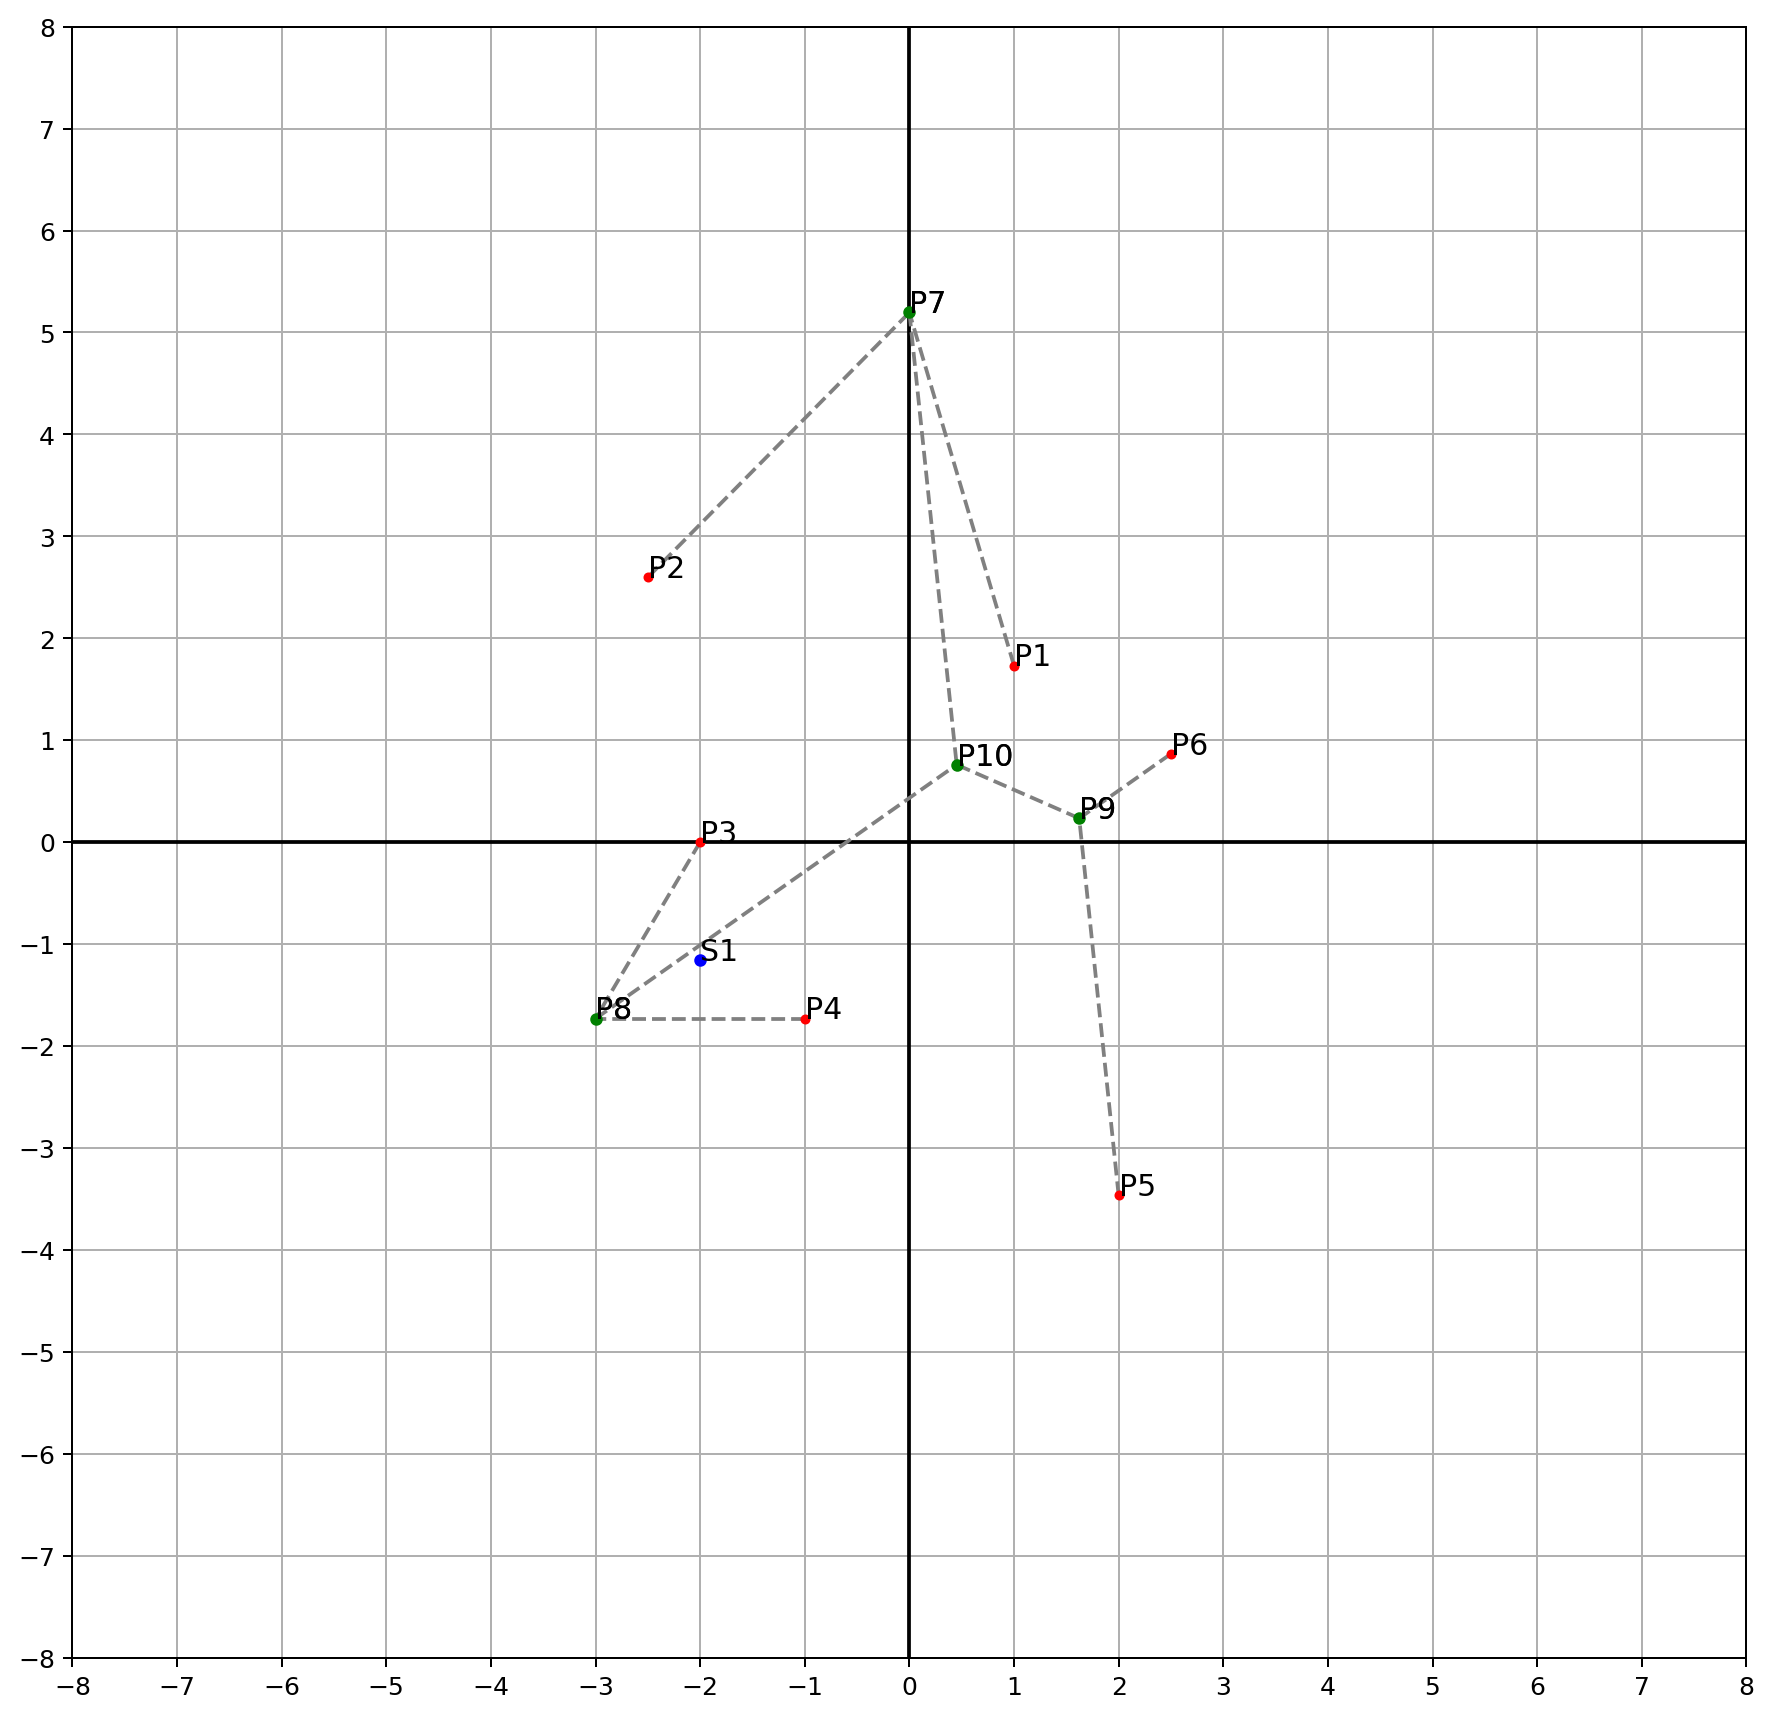

Check: OK
Нашли положение новой точки Штейнера - S1:


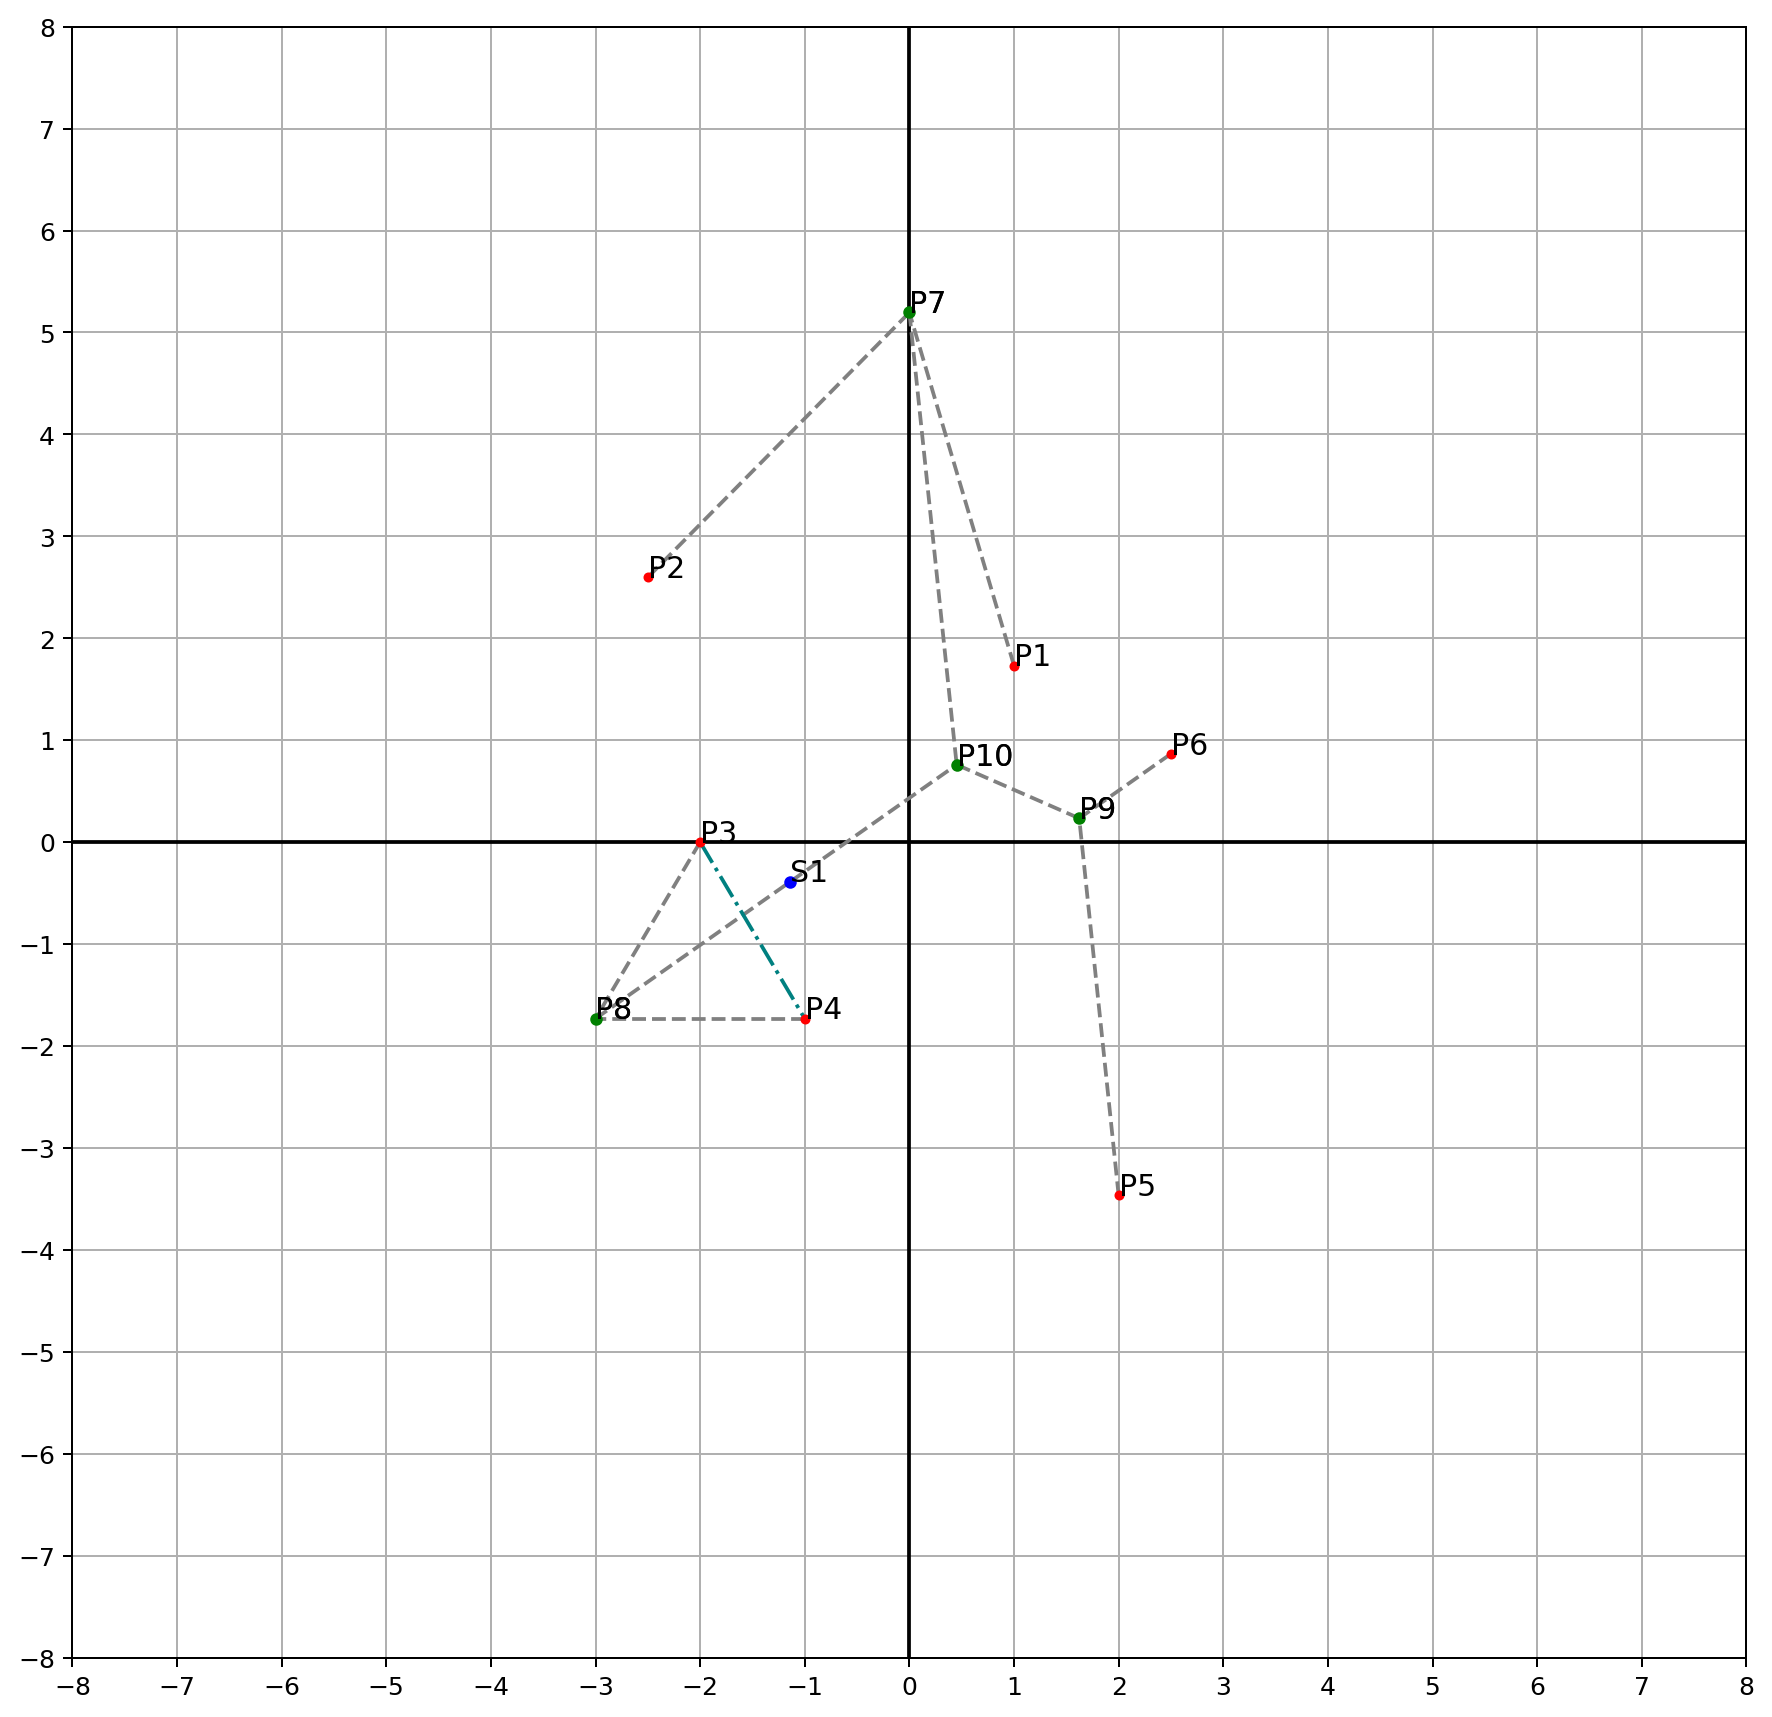

Построили точку Штейнера P8:


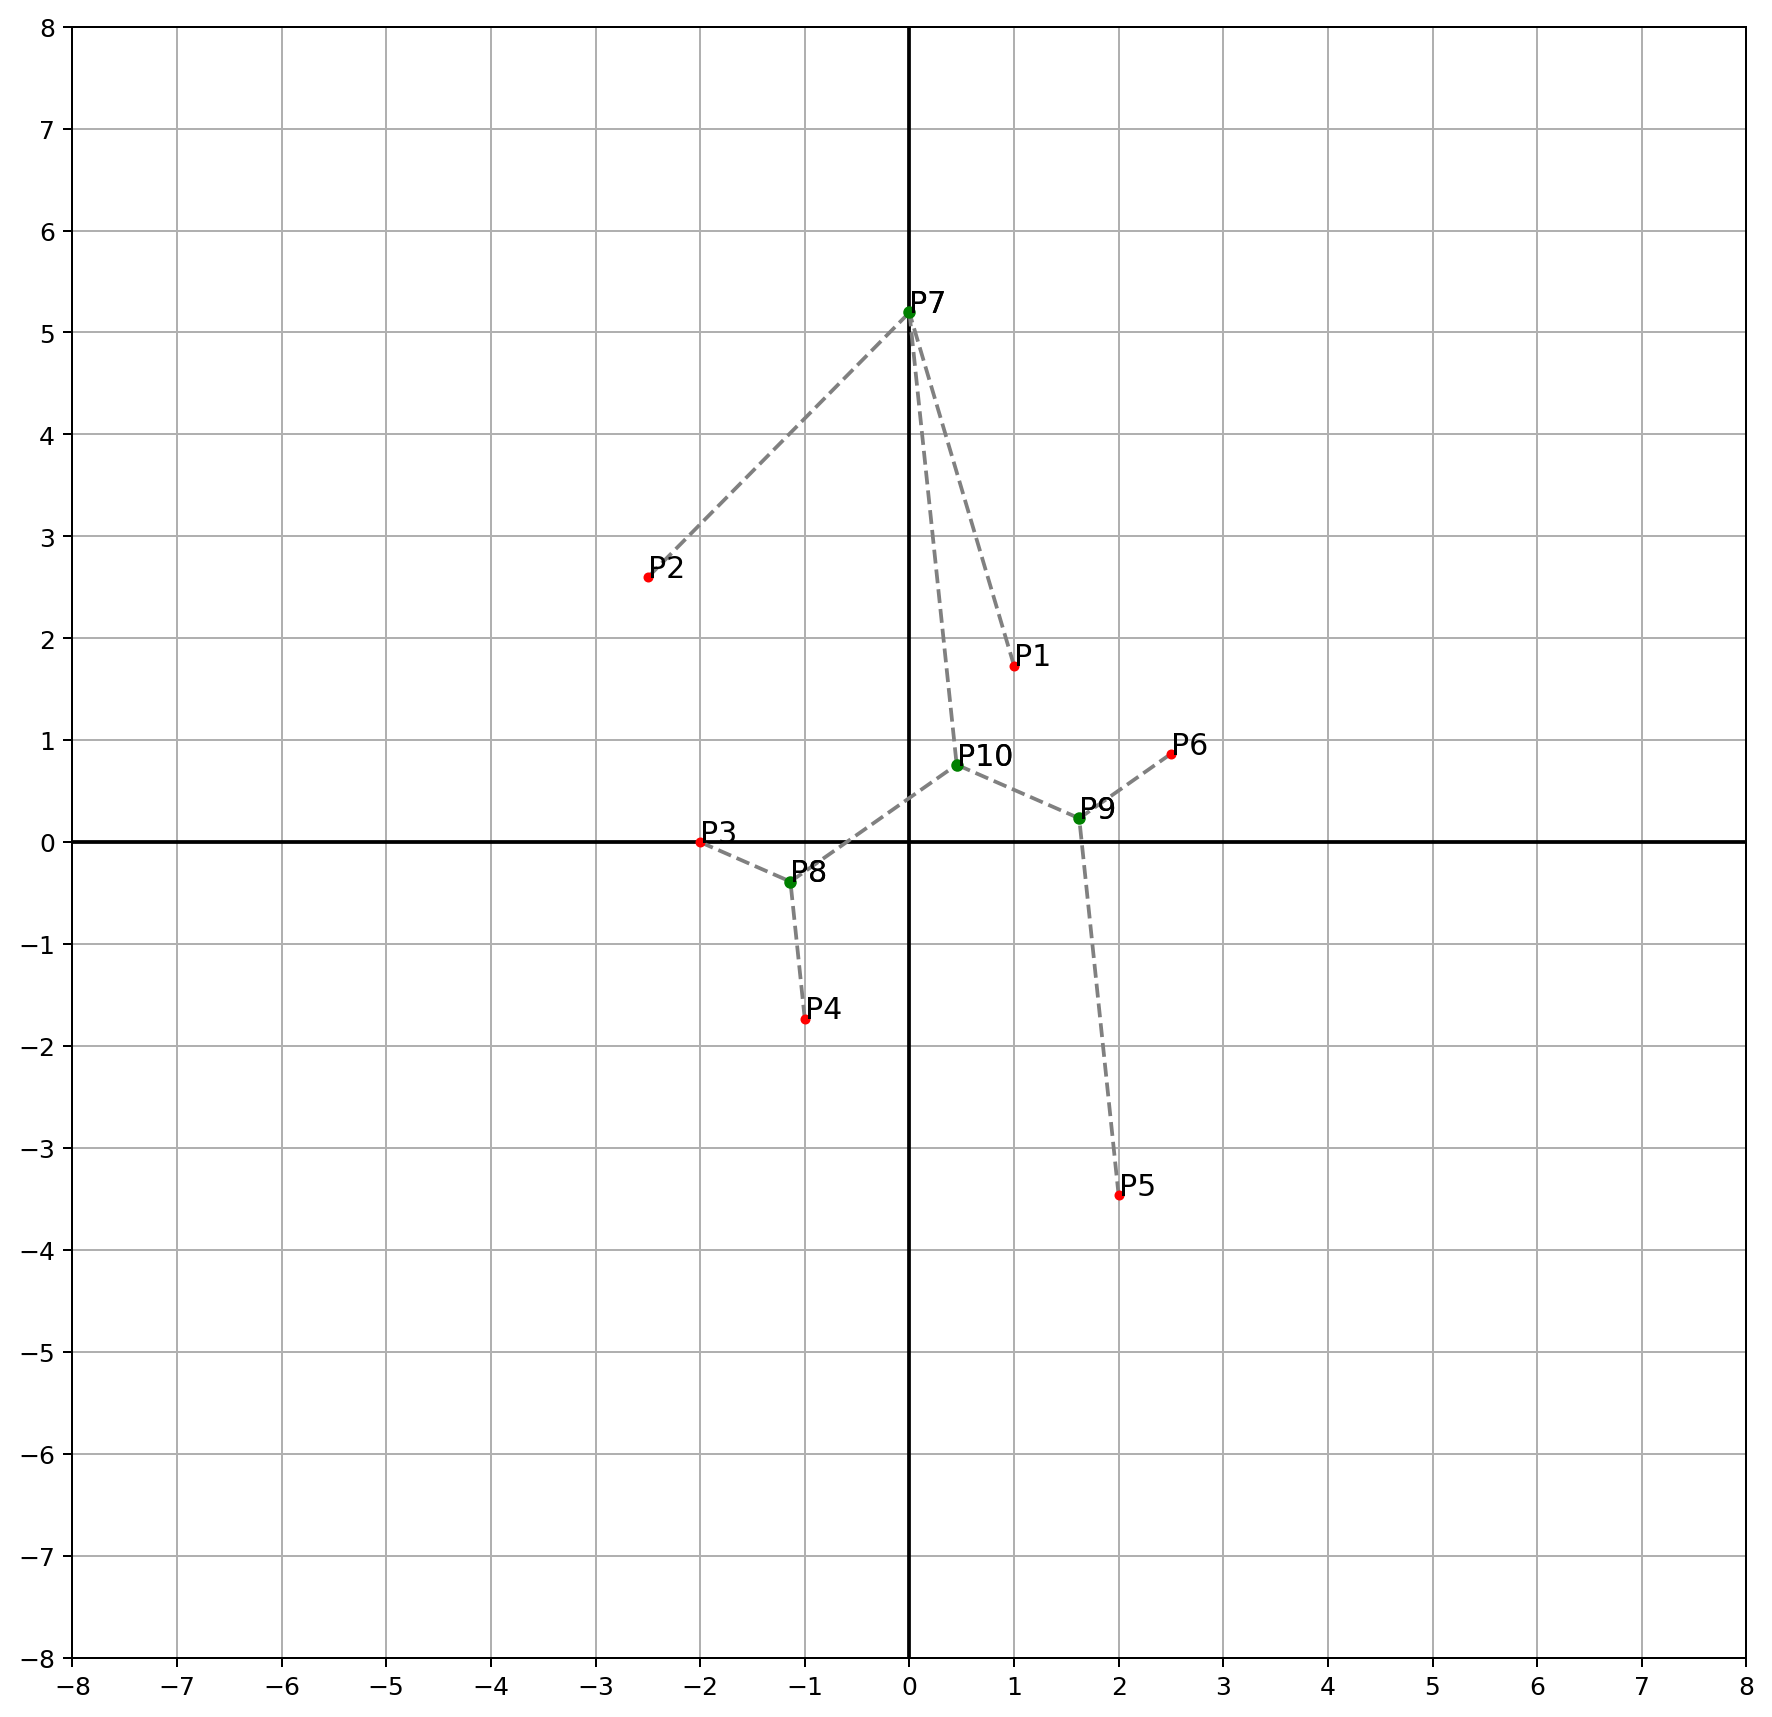

In [25]:
create_stein_point(x, y, 3, 4, 8, 10)

Нашли центр описанной окружности с радиусом 2.08166599947 и центром в S1:


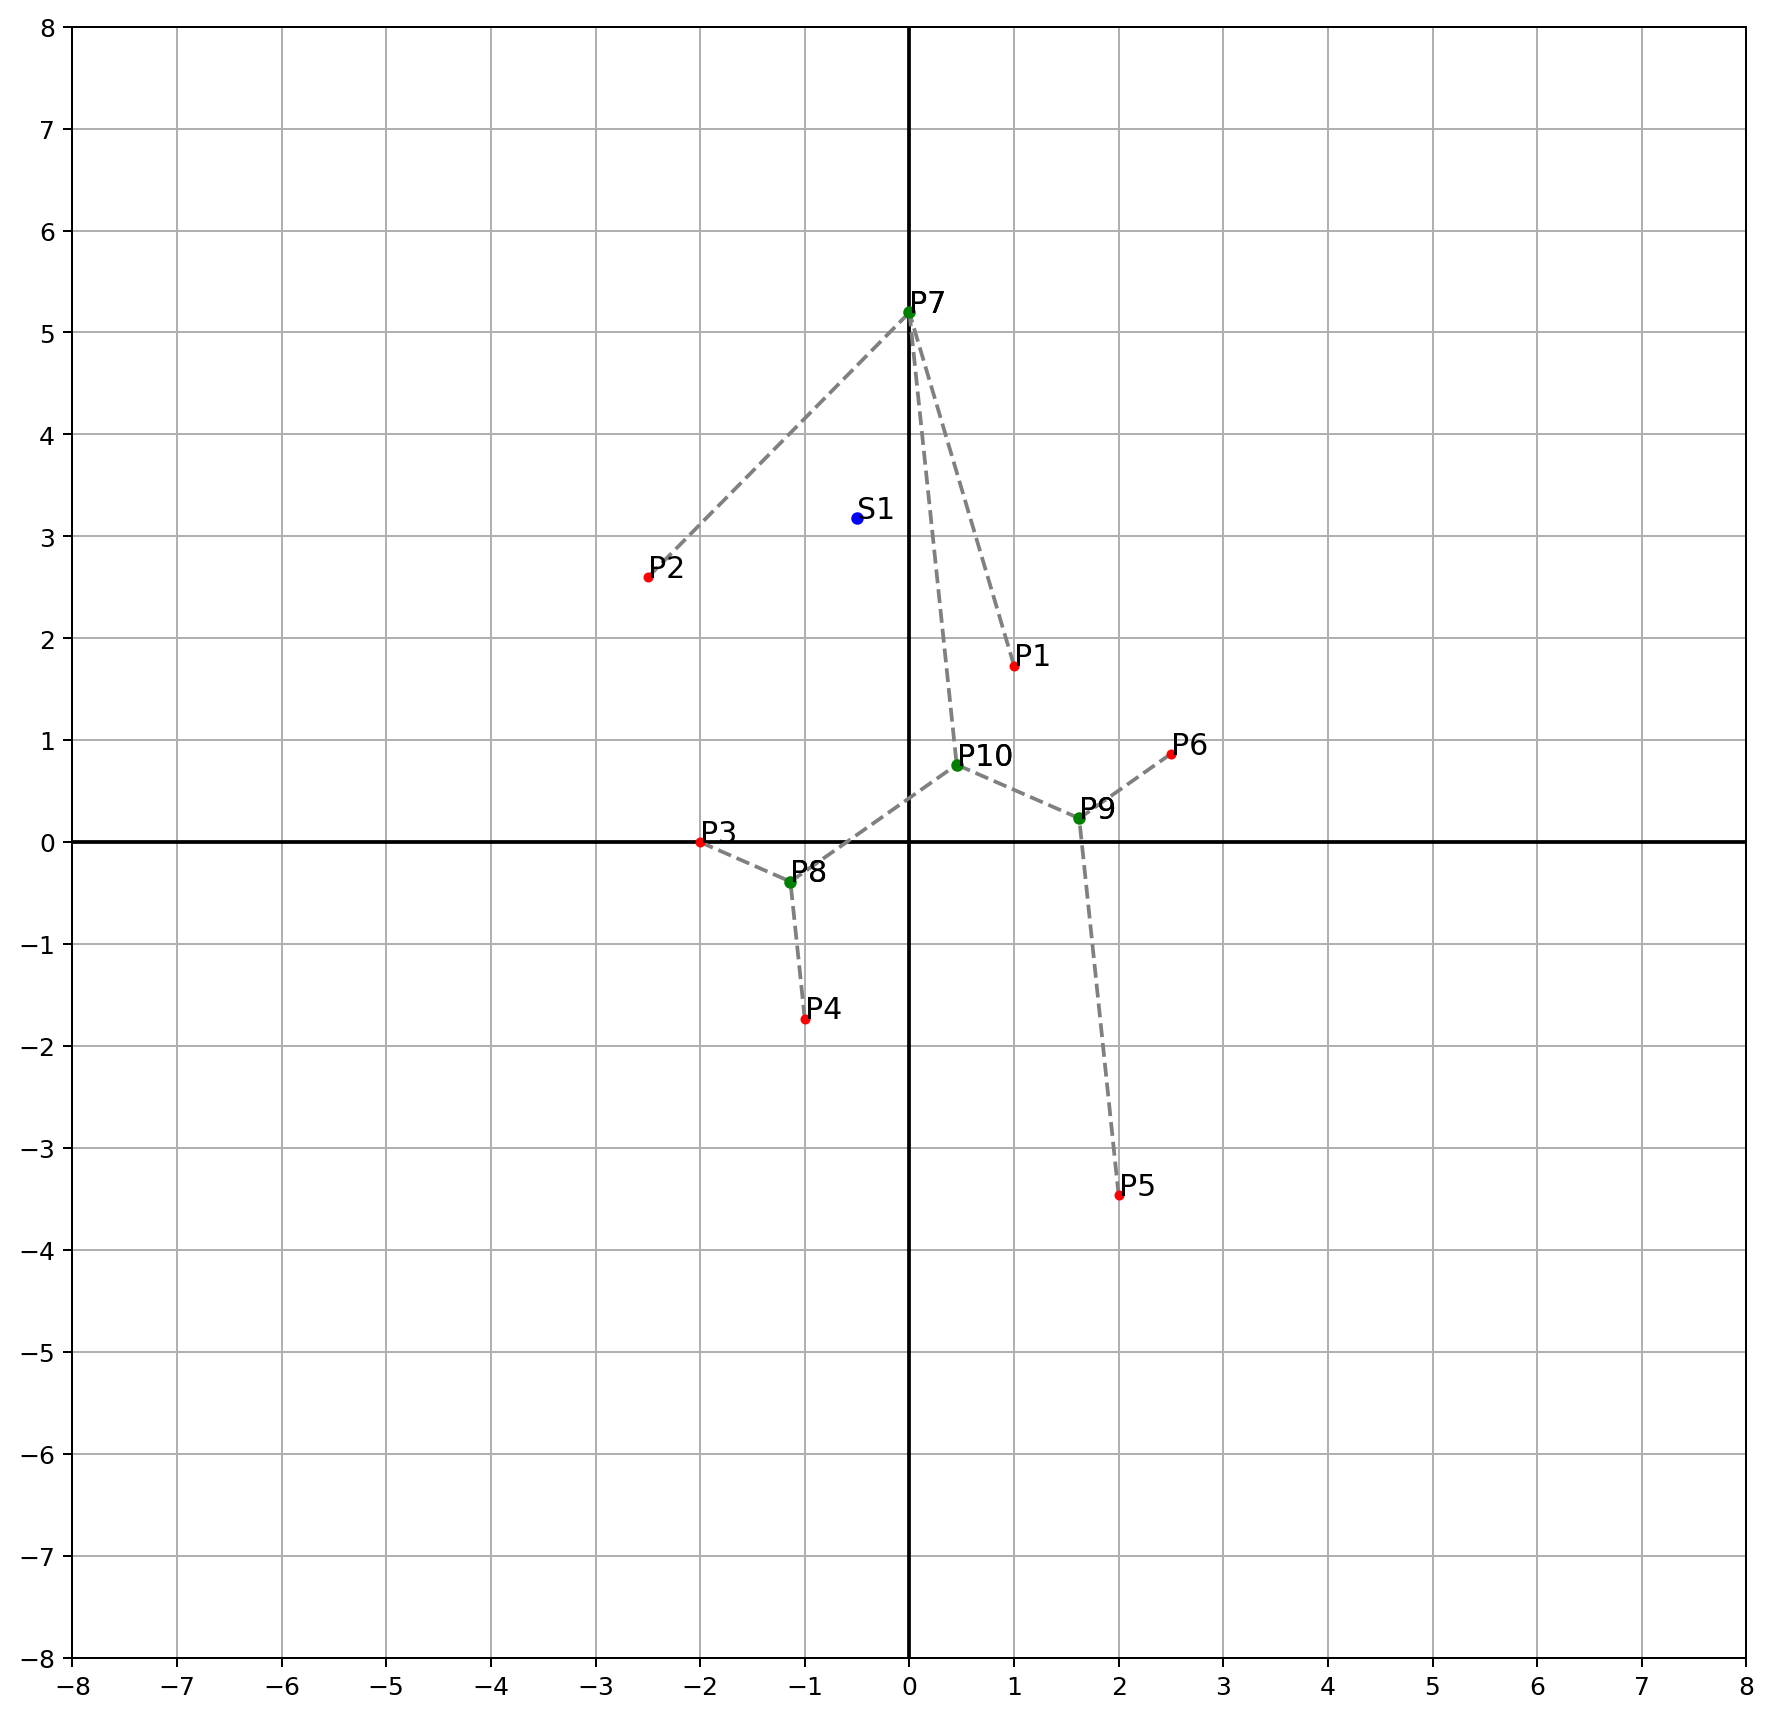

Check: OK
Нашли положение новой точки Штейнера - S1:


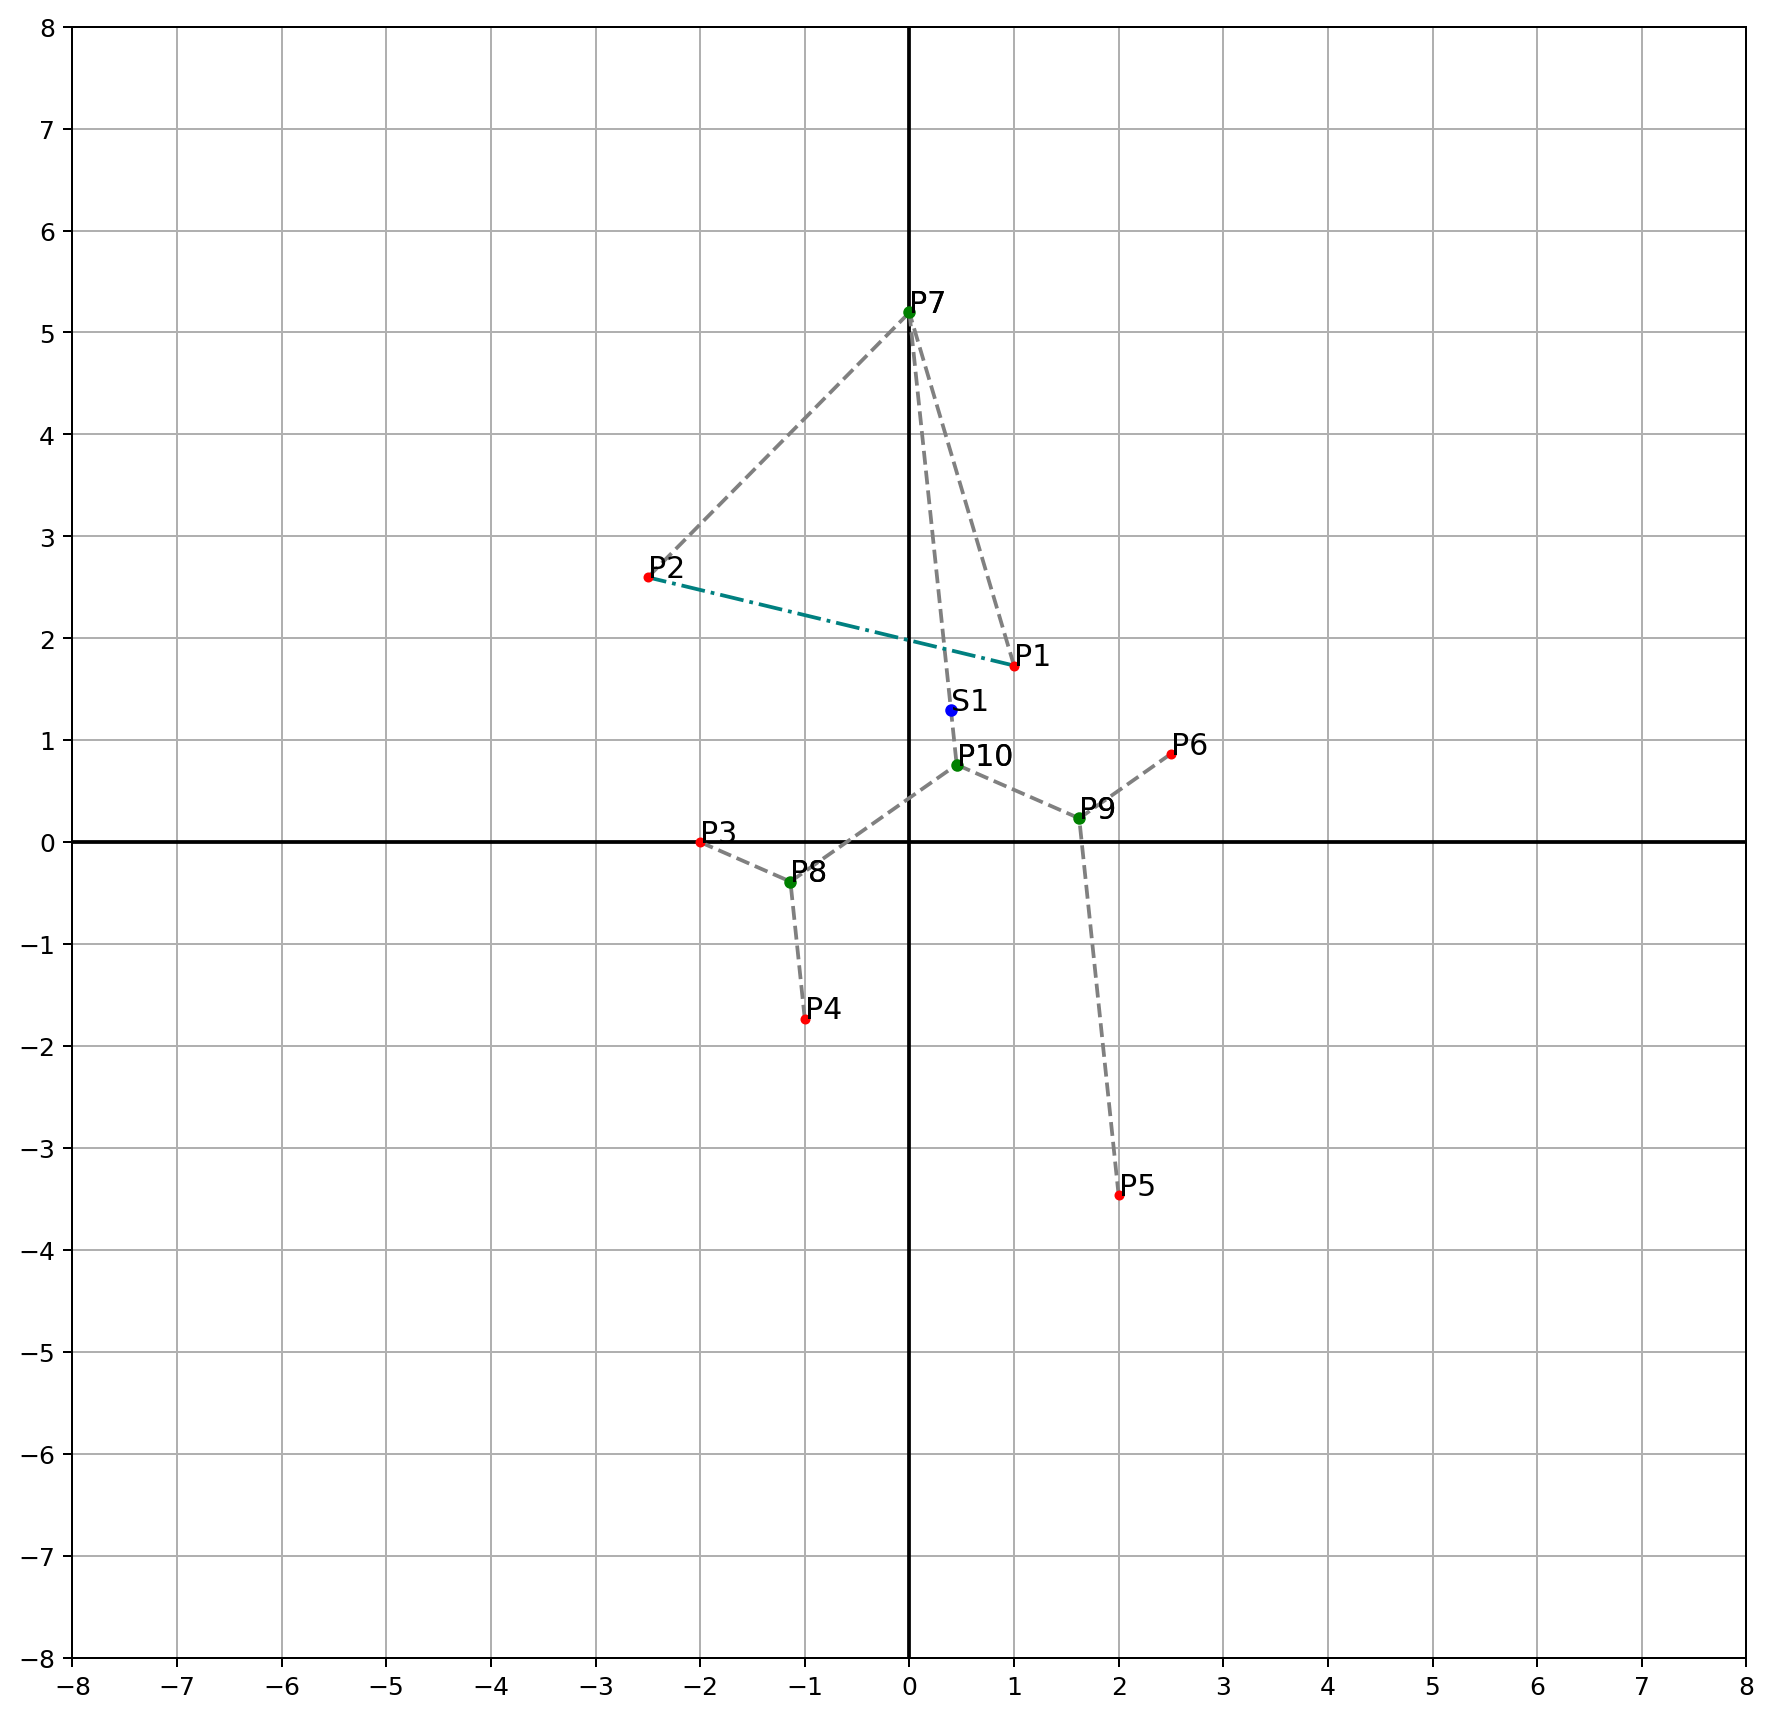

Построили точку Штейнера P7:


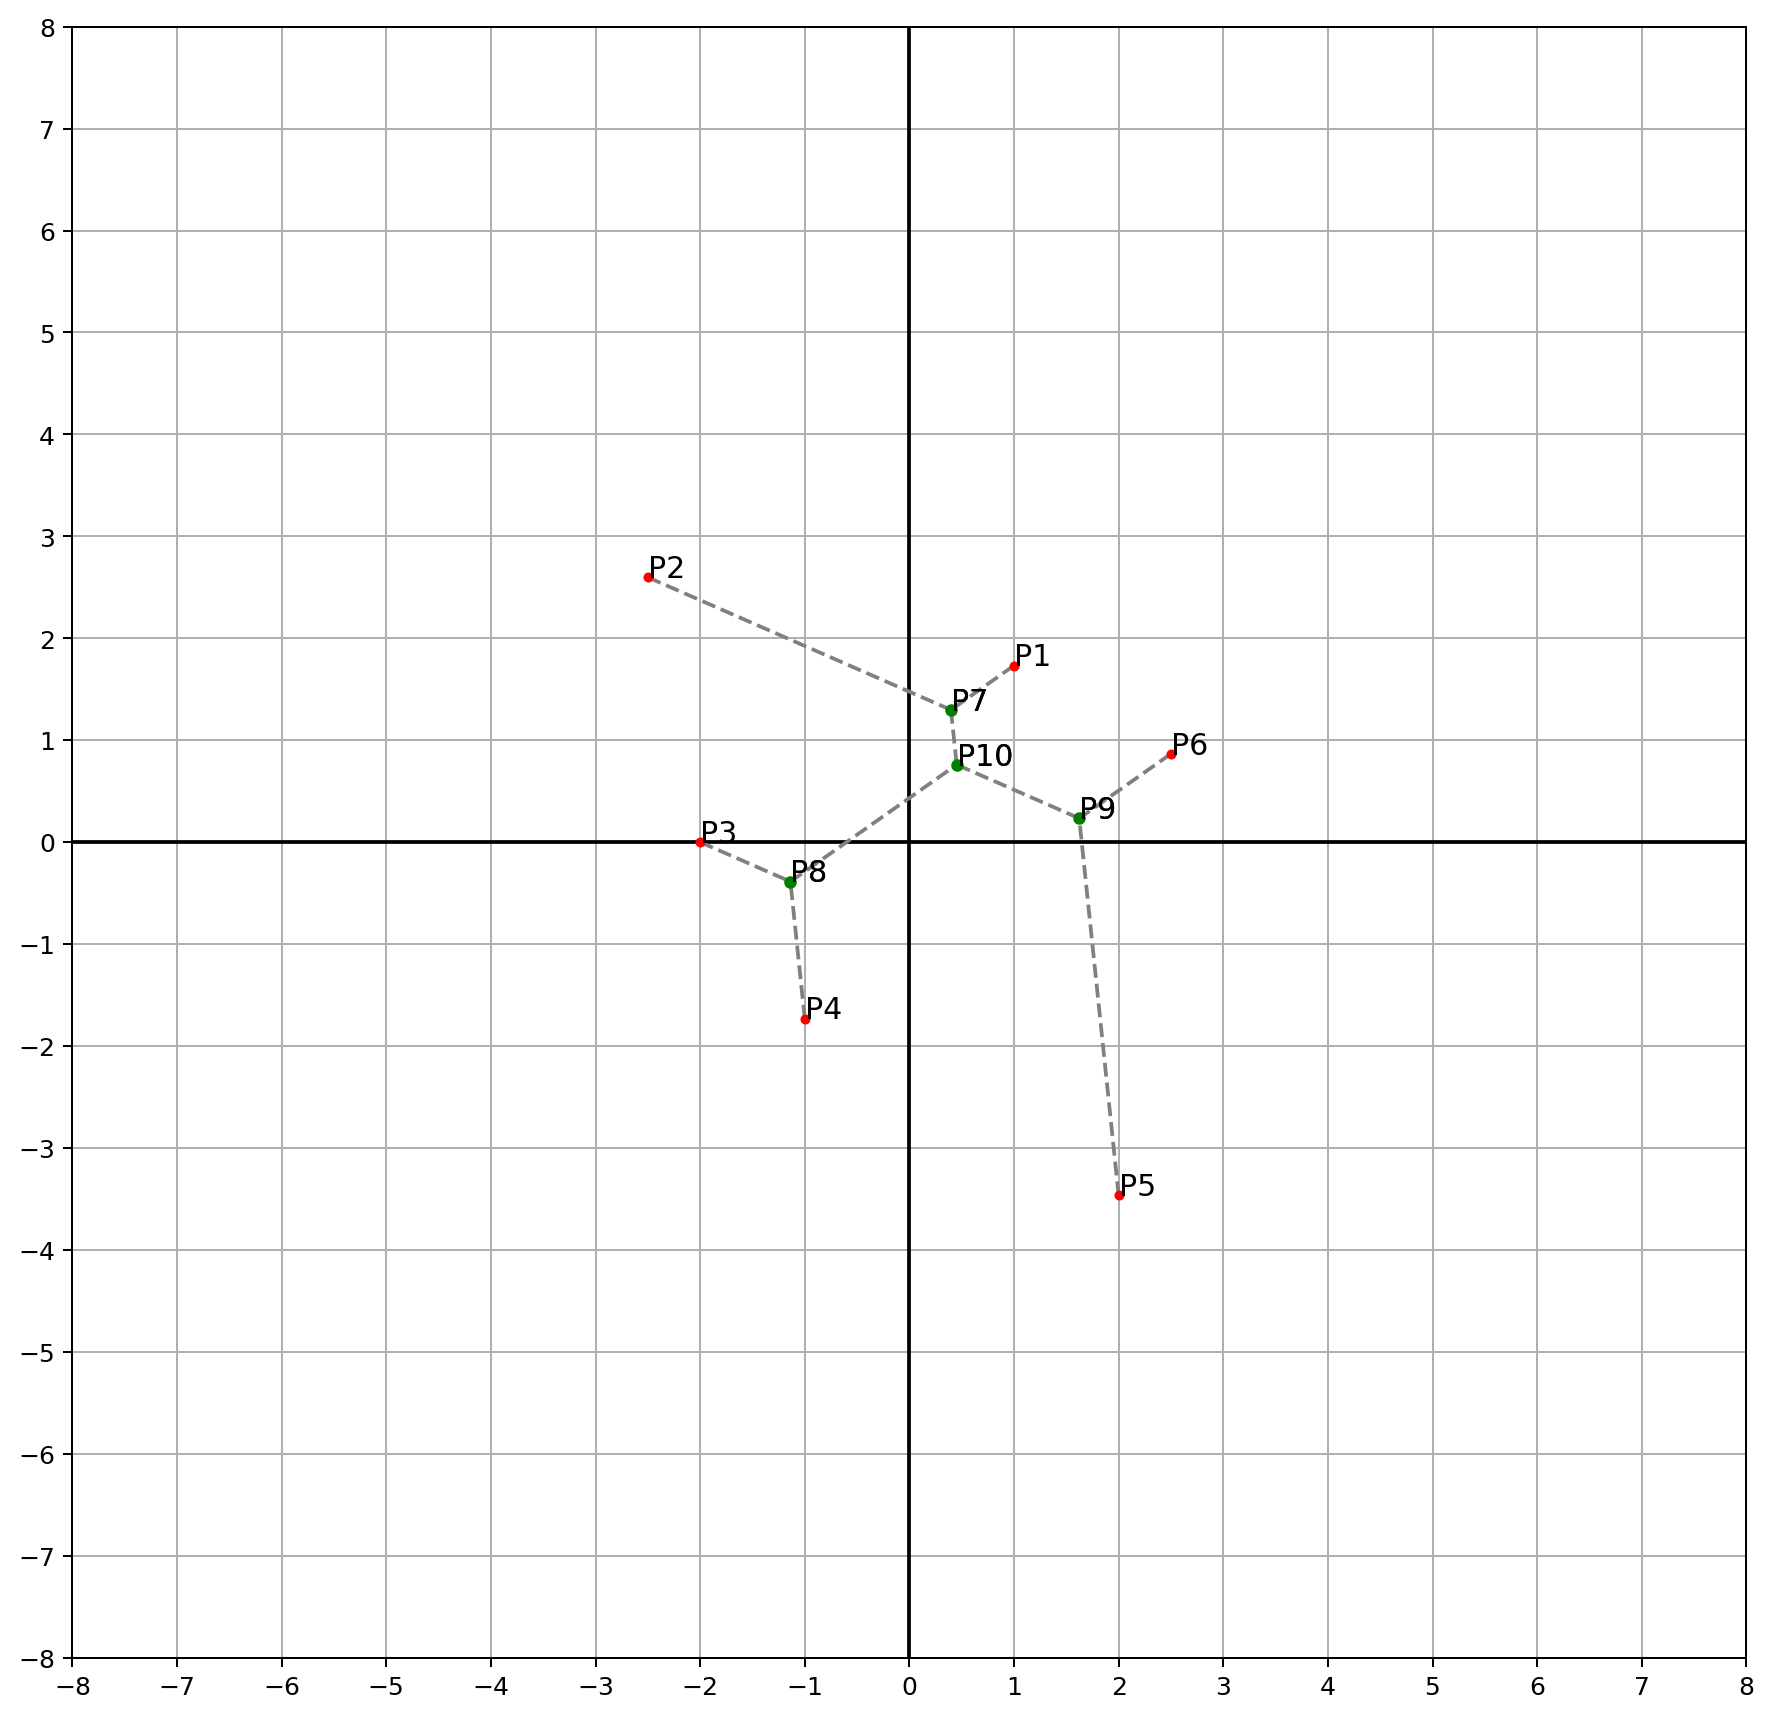

In [26]:
create_stein_point(x, y, 1, 2, 7, 10)

## Общее решение

In [27]:
def solve(l, G):
    
    draw.graph = G

    x, y = generate_data(l)

    origin_len = len(x)

    for i in range(origin_len, len(G), 1):
        create_edge_point(x, y, G[i][0], G[i][1])

    for i in reversed(range(origin_len, len(G), 1)):
        create_stein_point(x, y, G[i][0], G[i][1], i+1, G[i][2])

P1: (1.0, 1.73205080757)
P2: (-2.5, 2.59807621135)
P3: (-2.0, 1.22464679915e-16)
P4: (-1.0, -1.73205080757)
P5: (2.0, -3.46410161514)
P6: (2.5, 0.866025403784)
Строим вершины треугольников - S1 и S2:


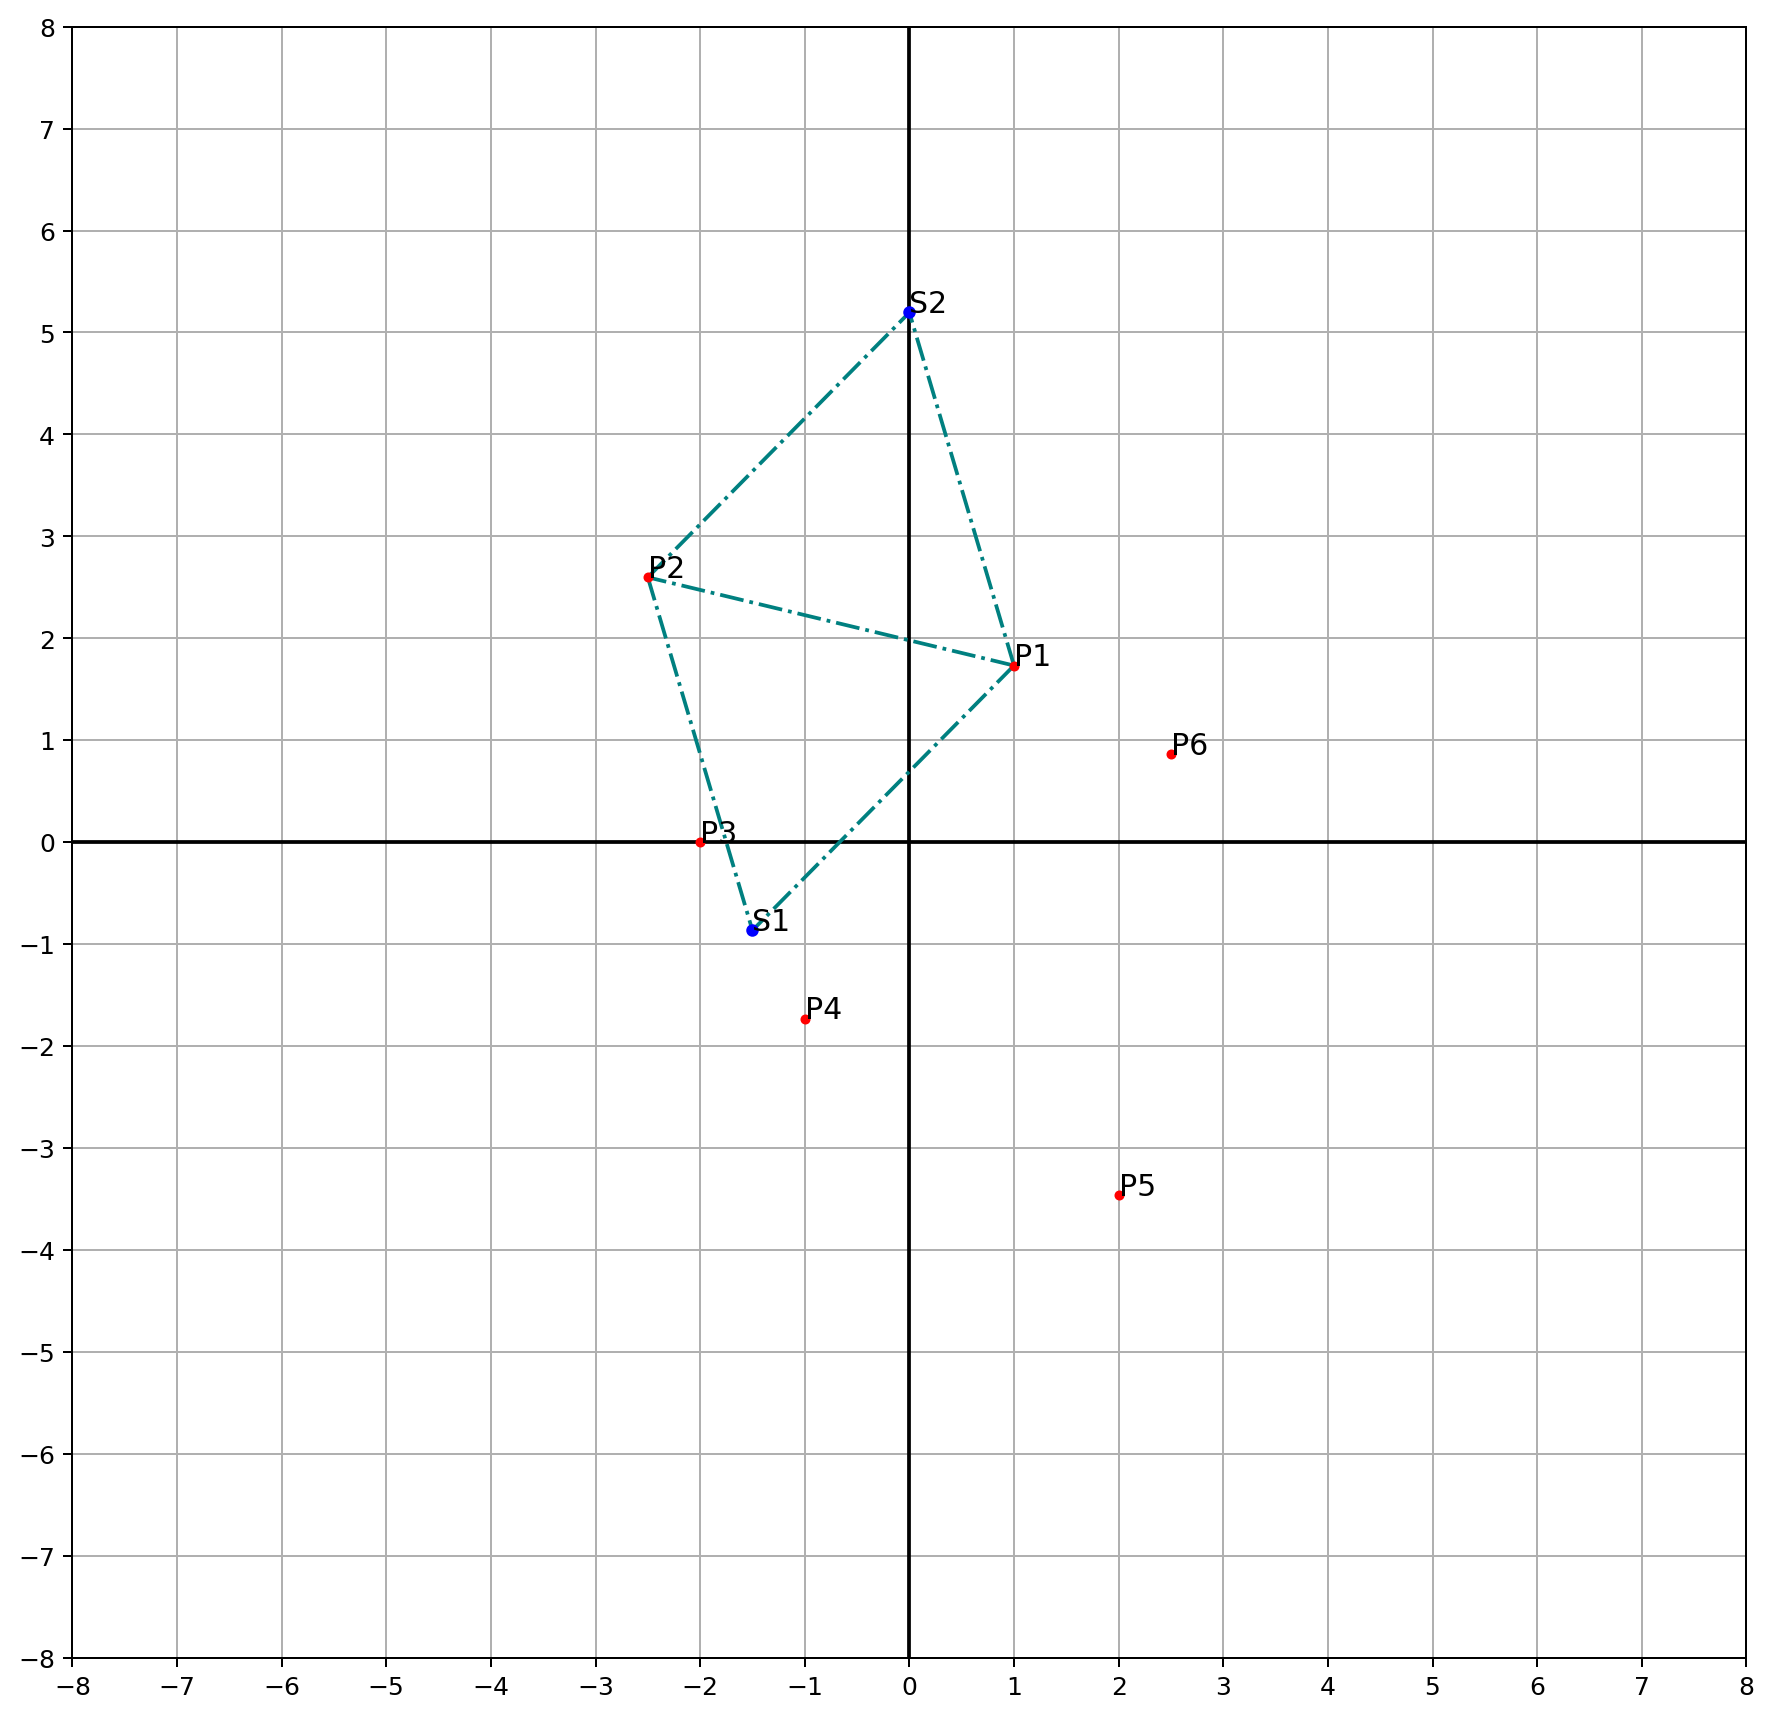

Выбрали необходимую граничную вершину P7:


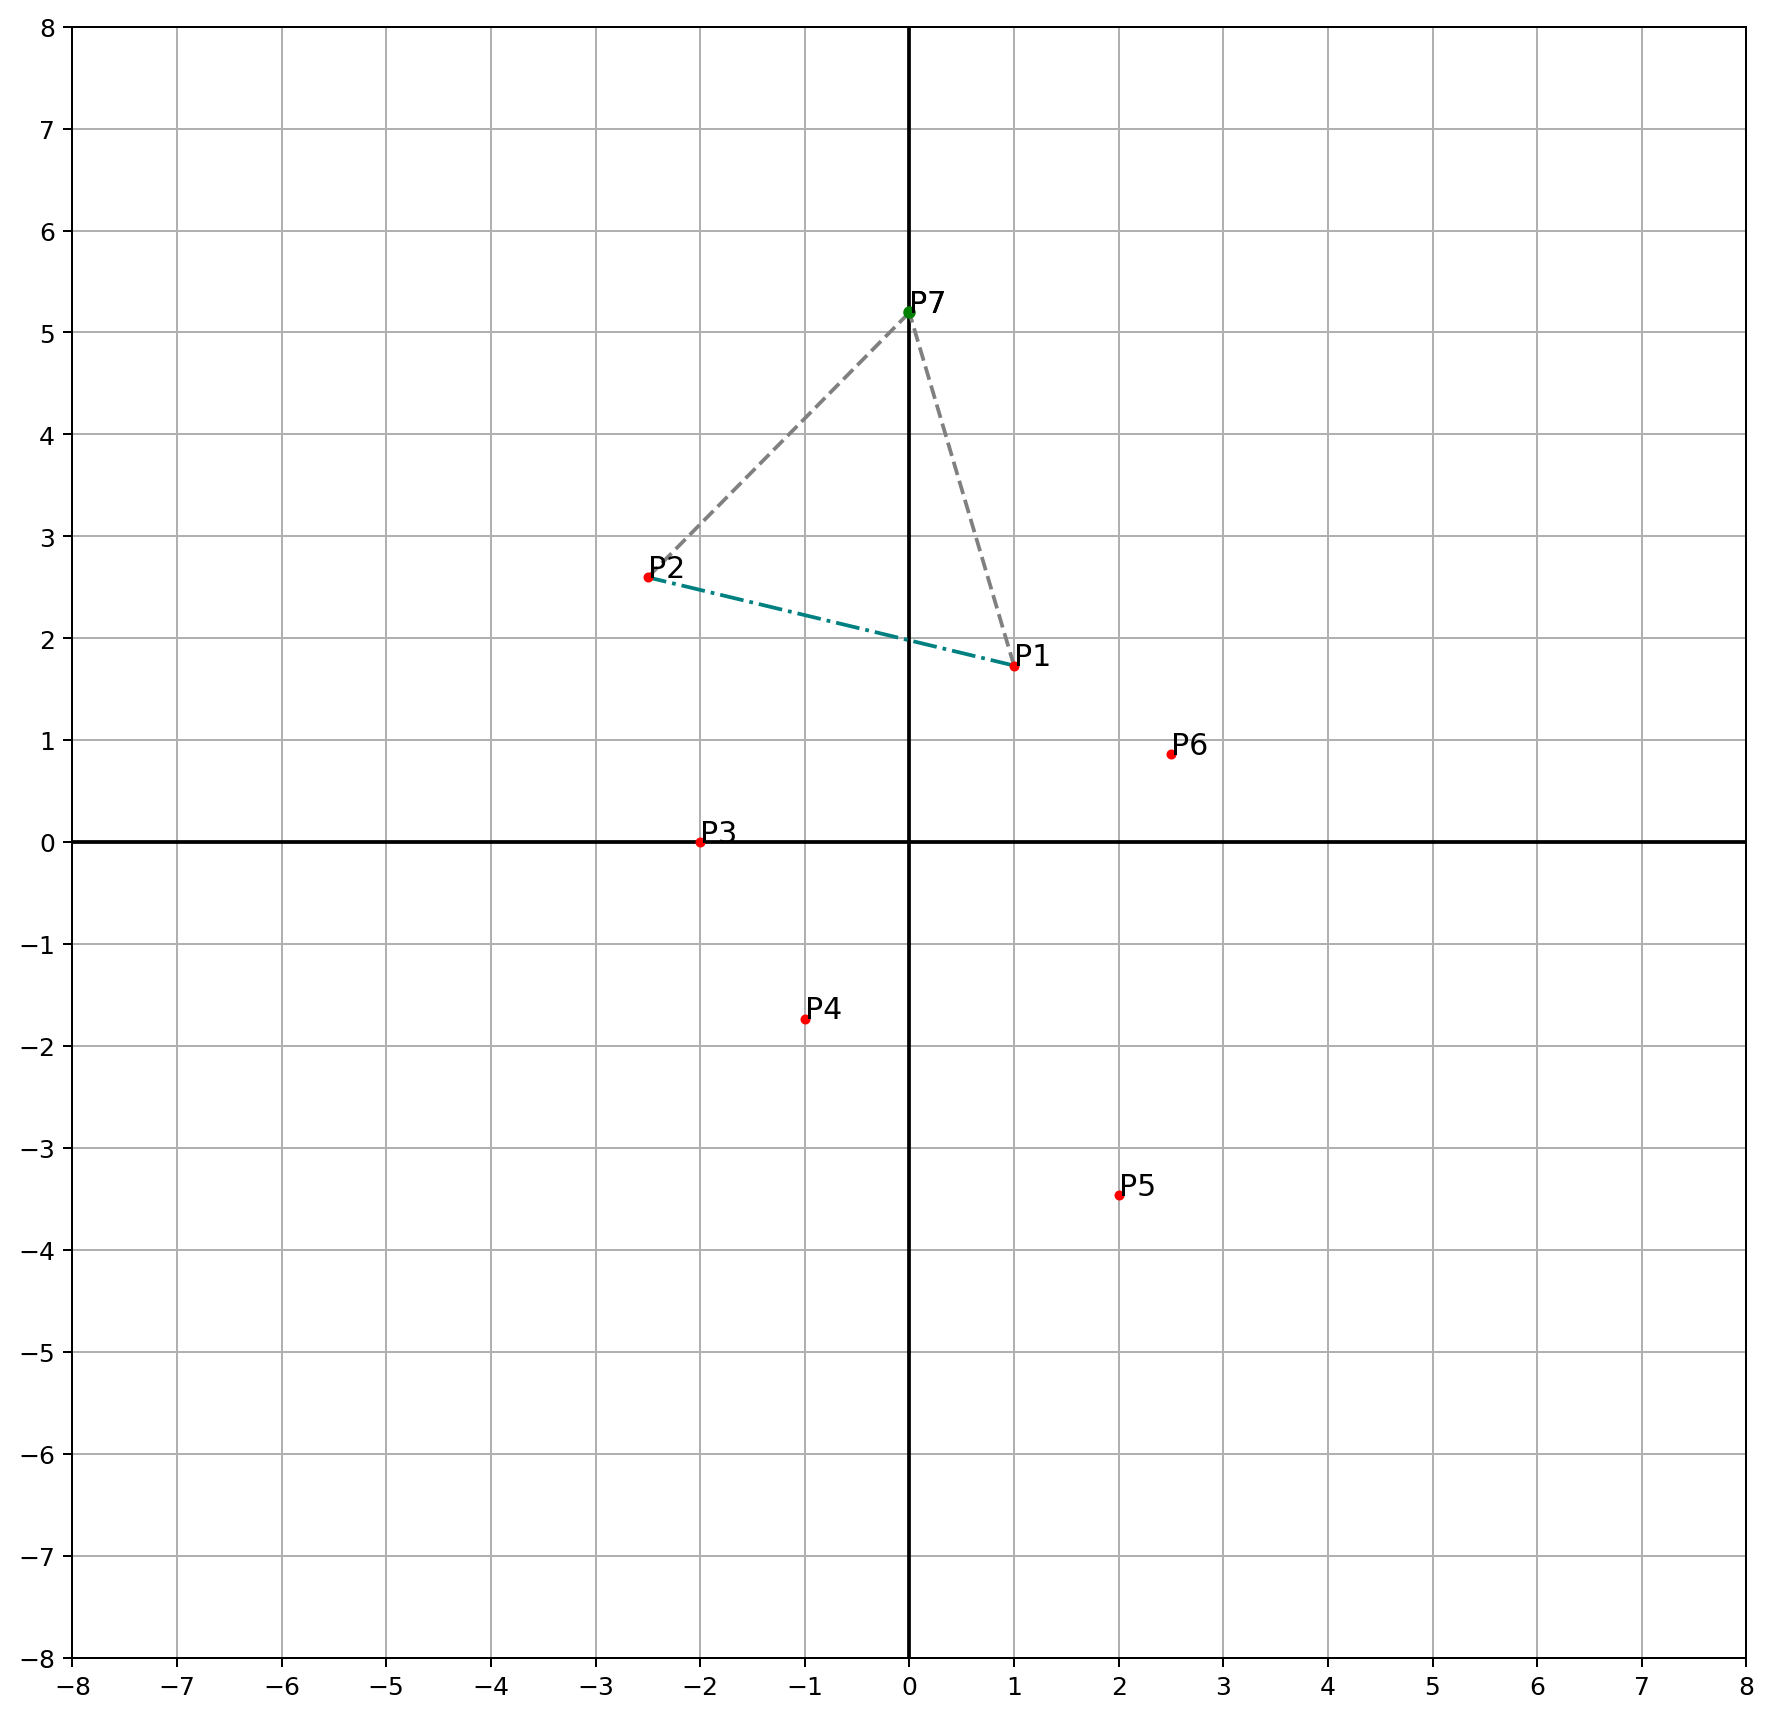

Строим вершины треугольников - S1 и S2:


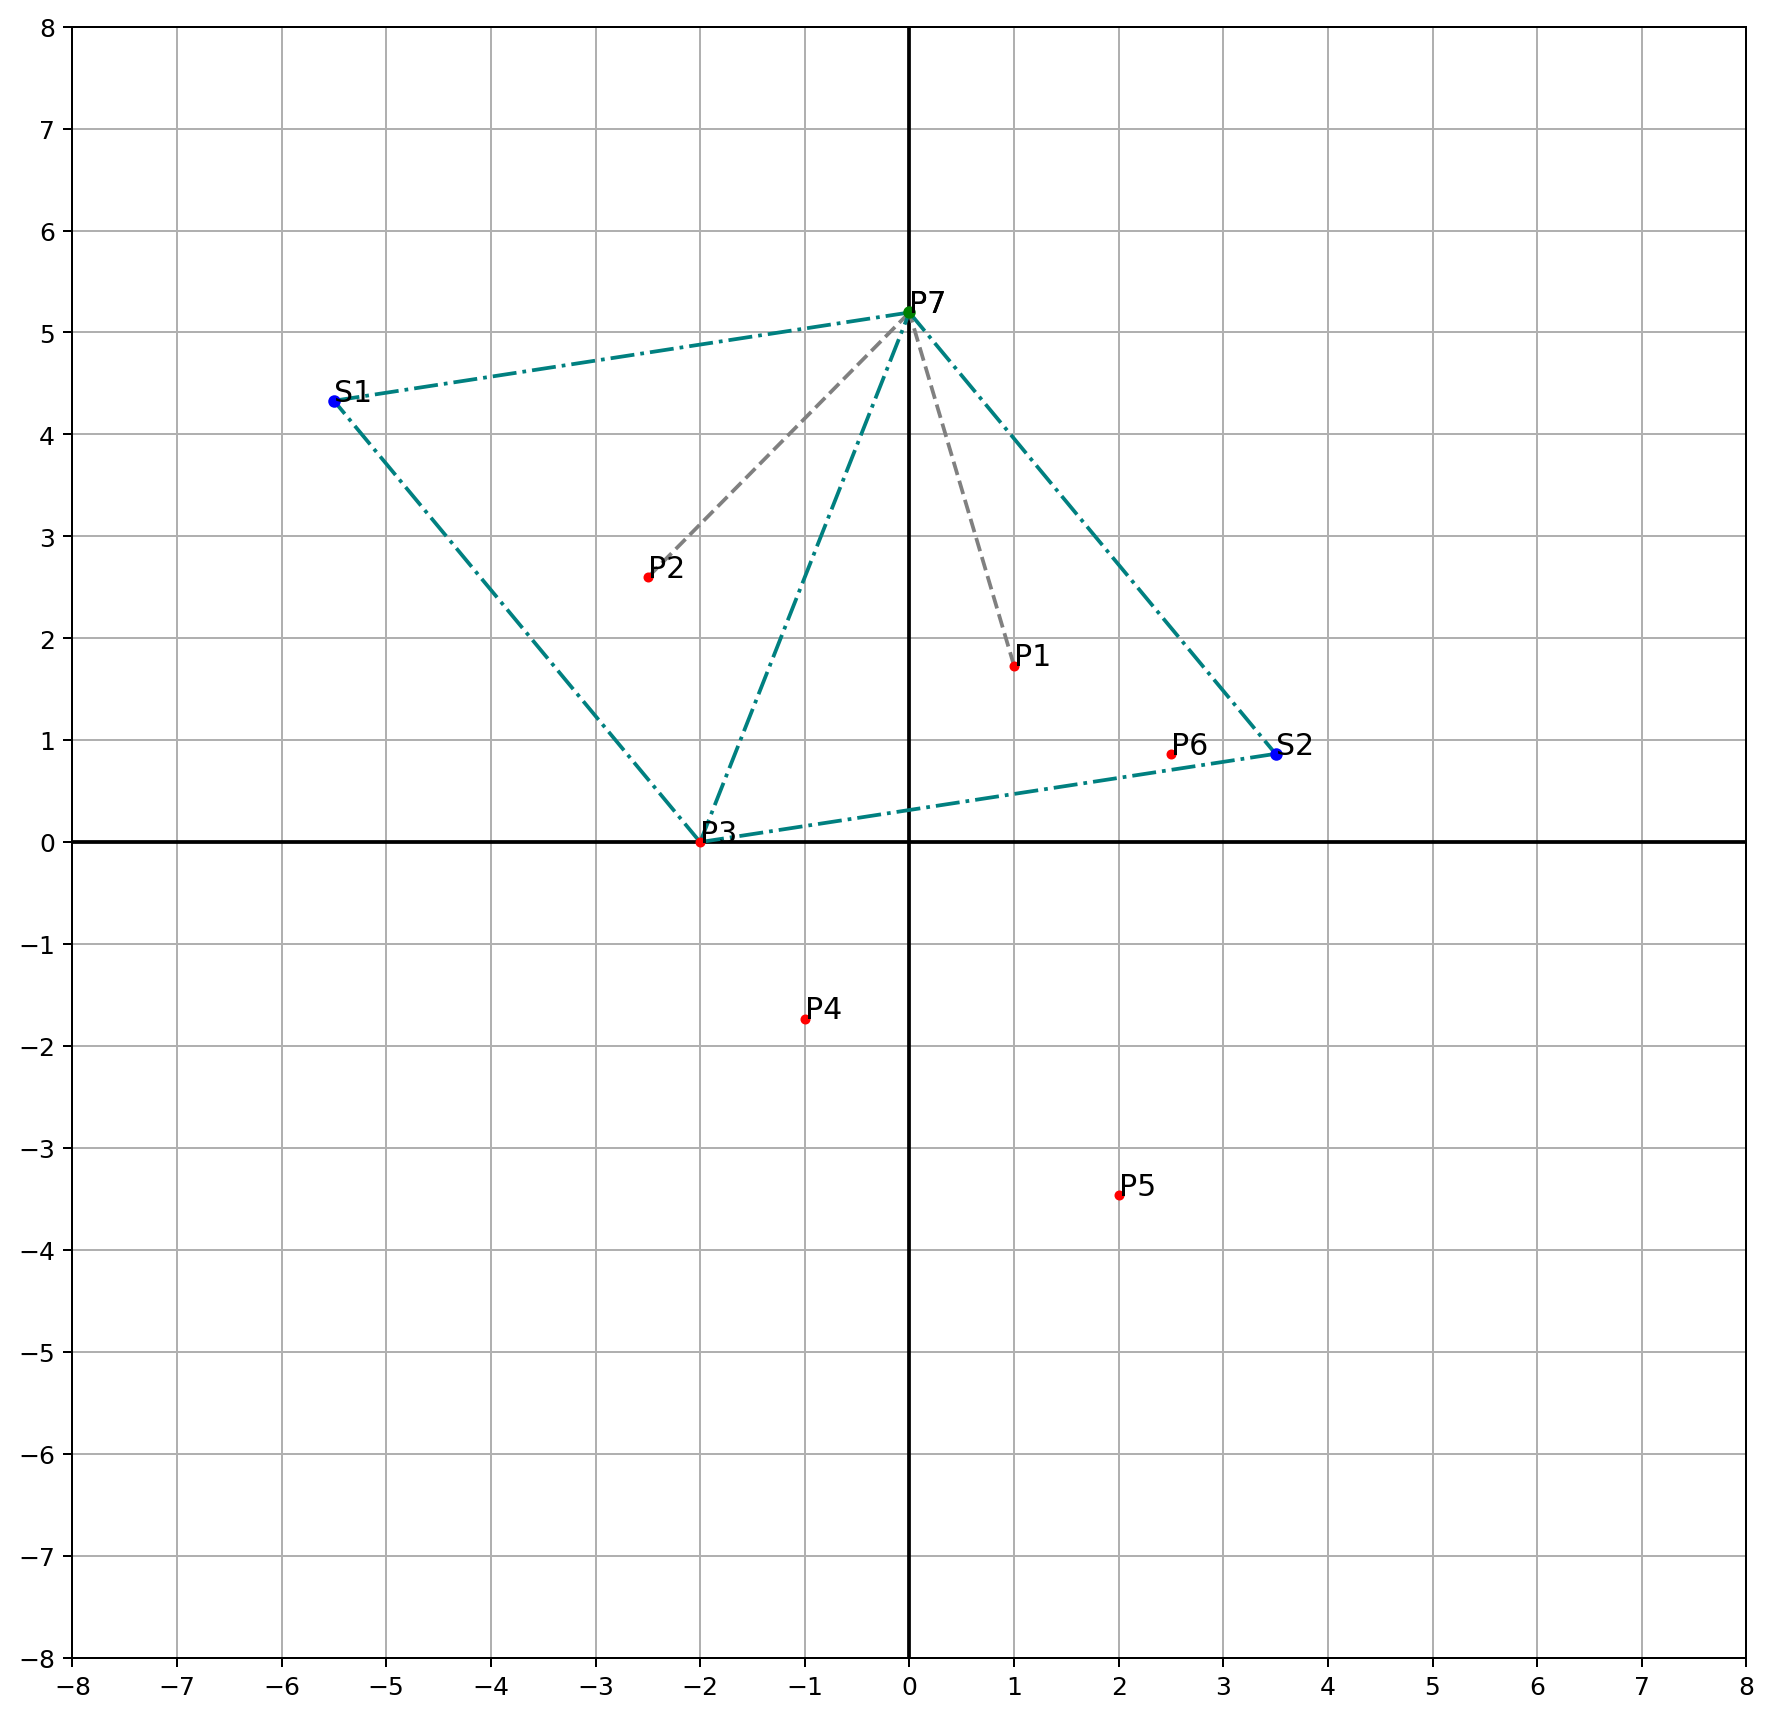

Выбрали необходимую граничную вершину P8:


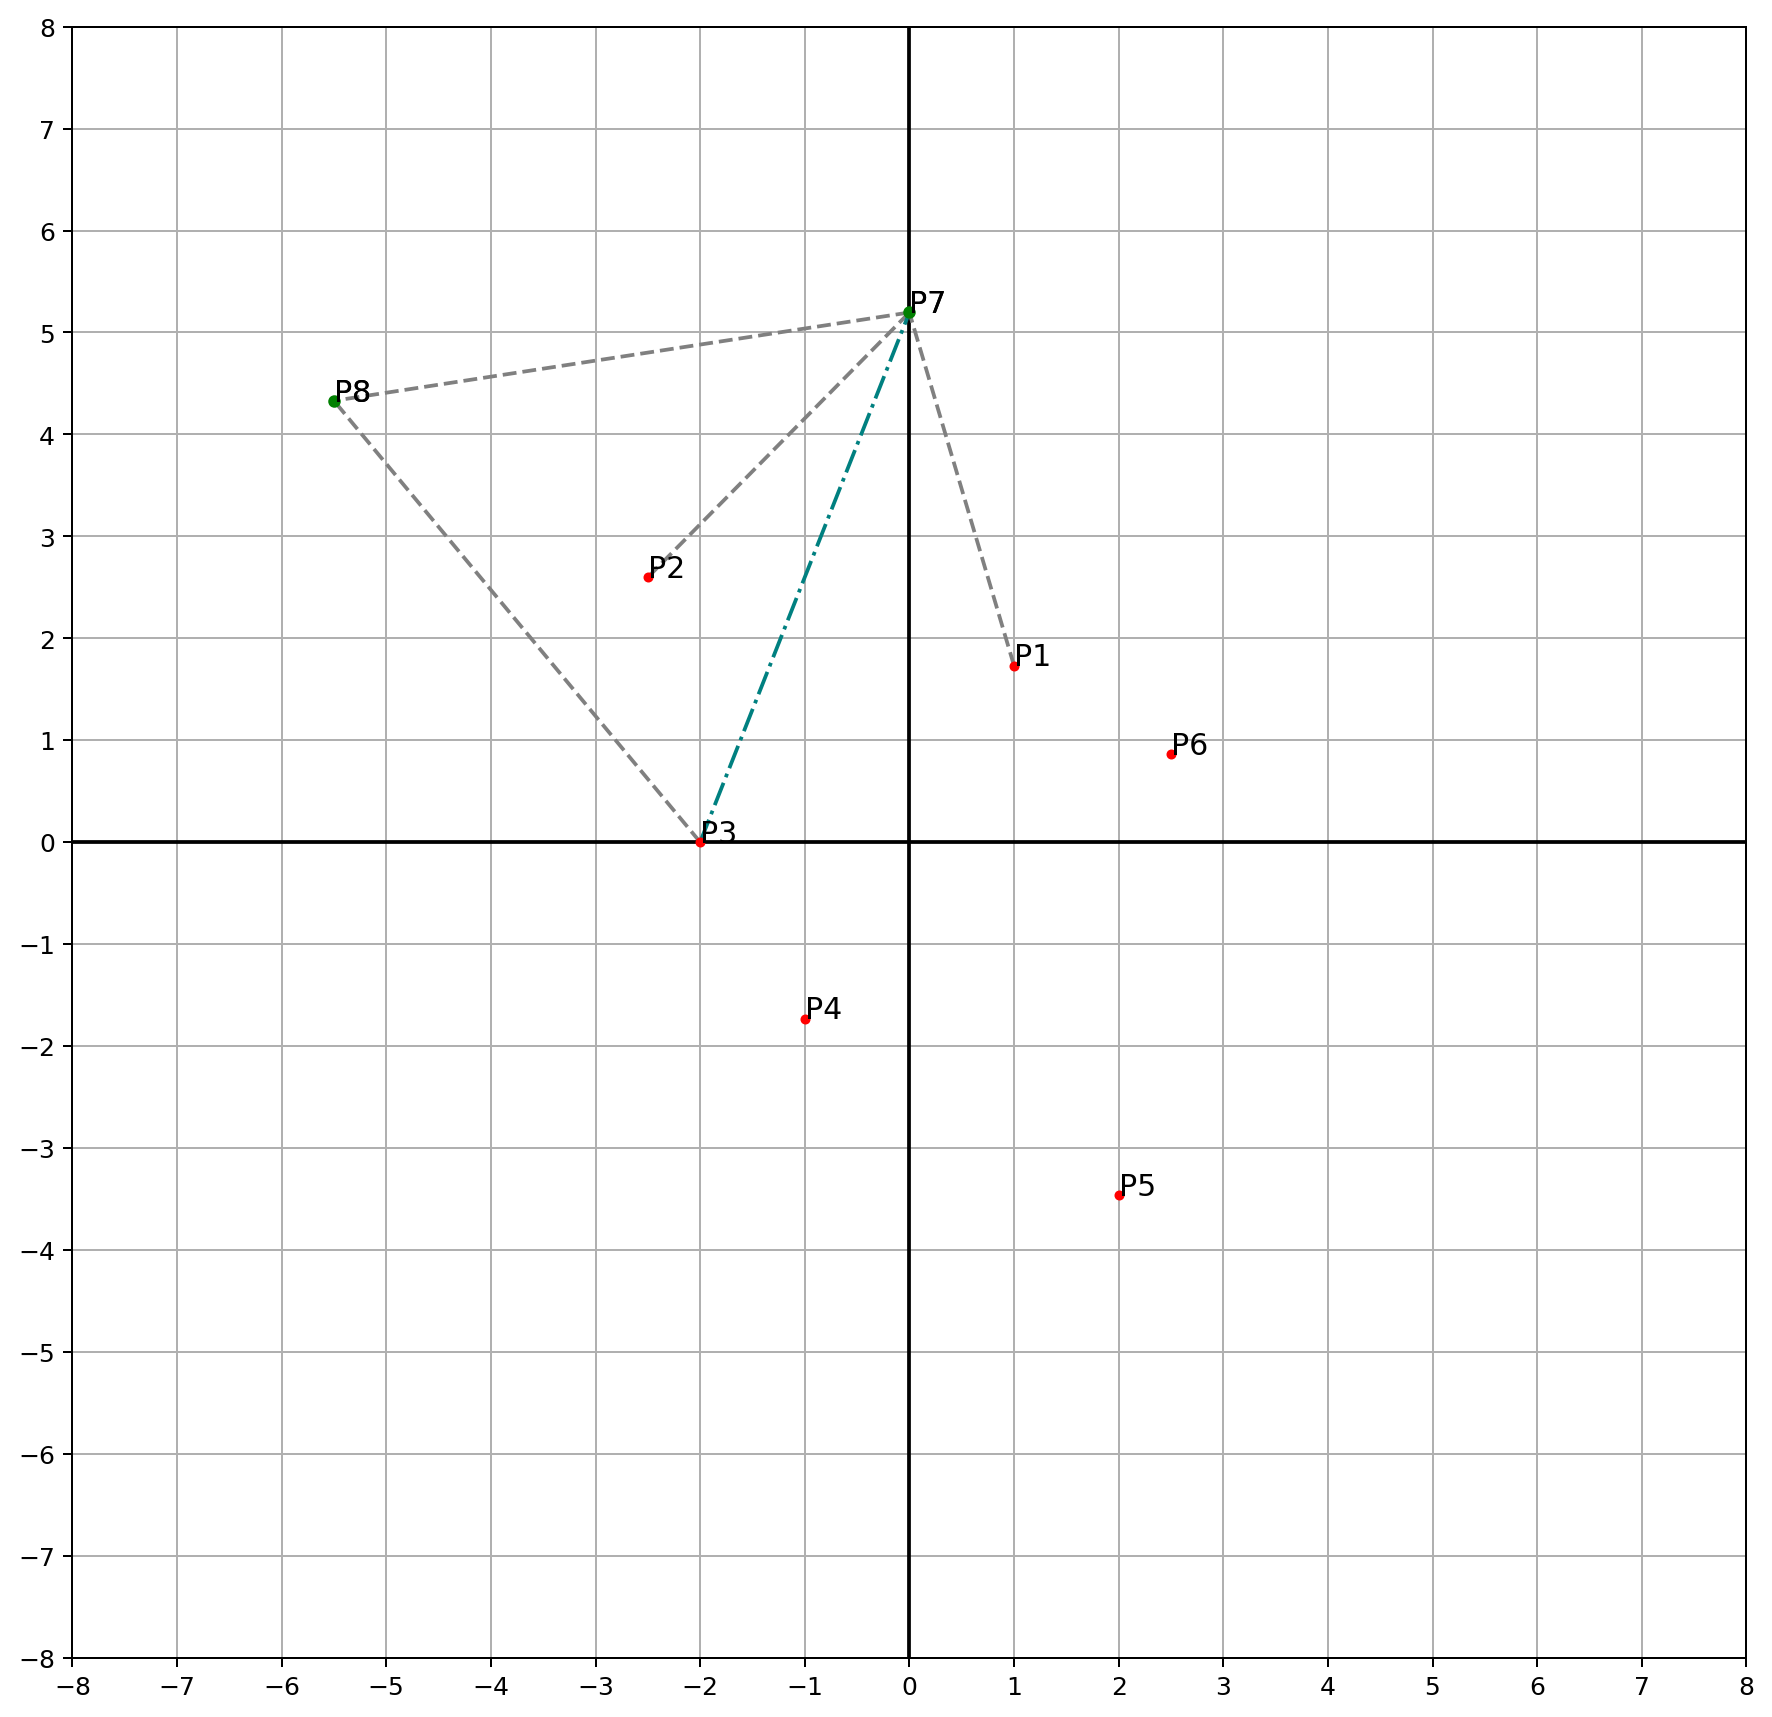

Строим вершины треугольников - S1 и S2:


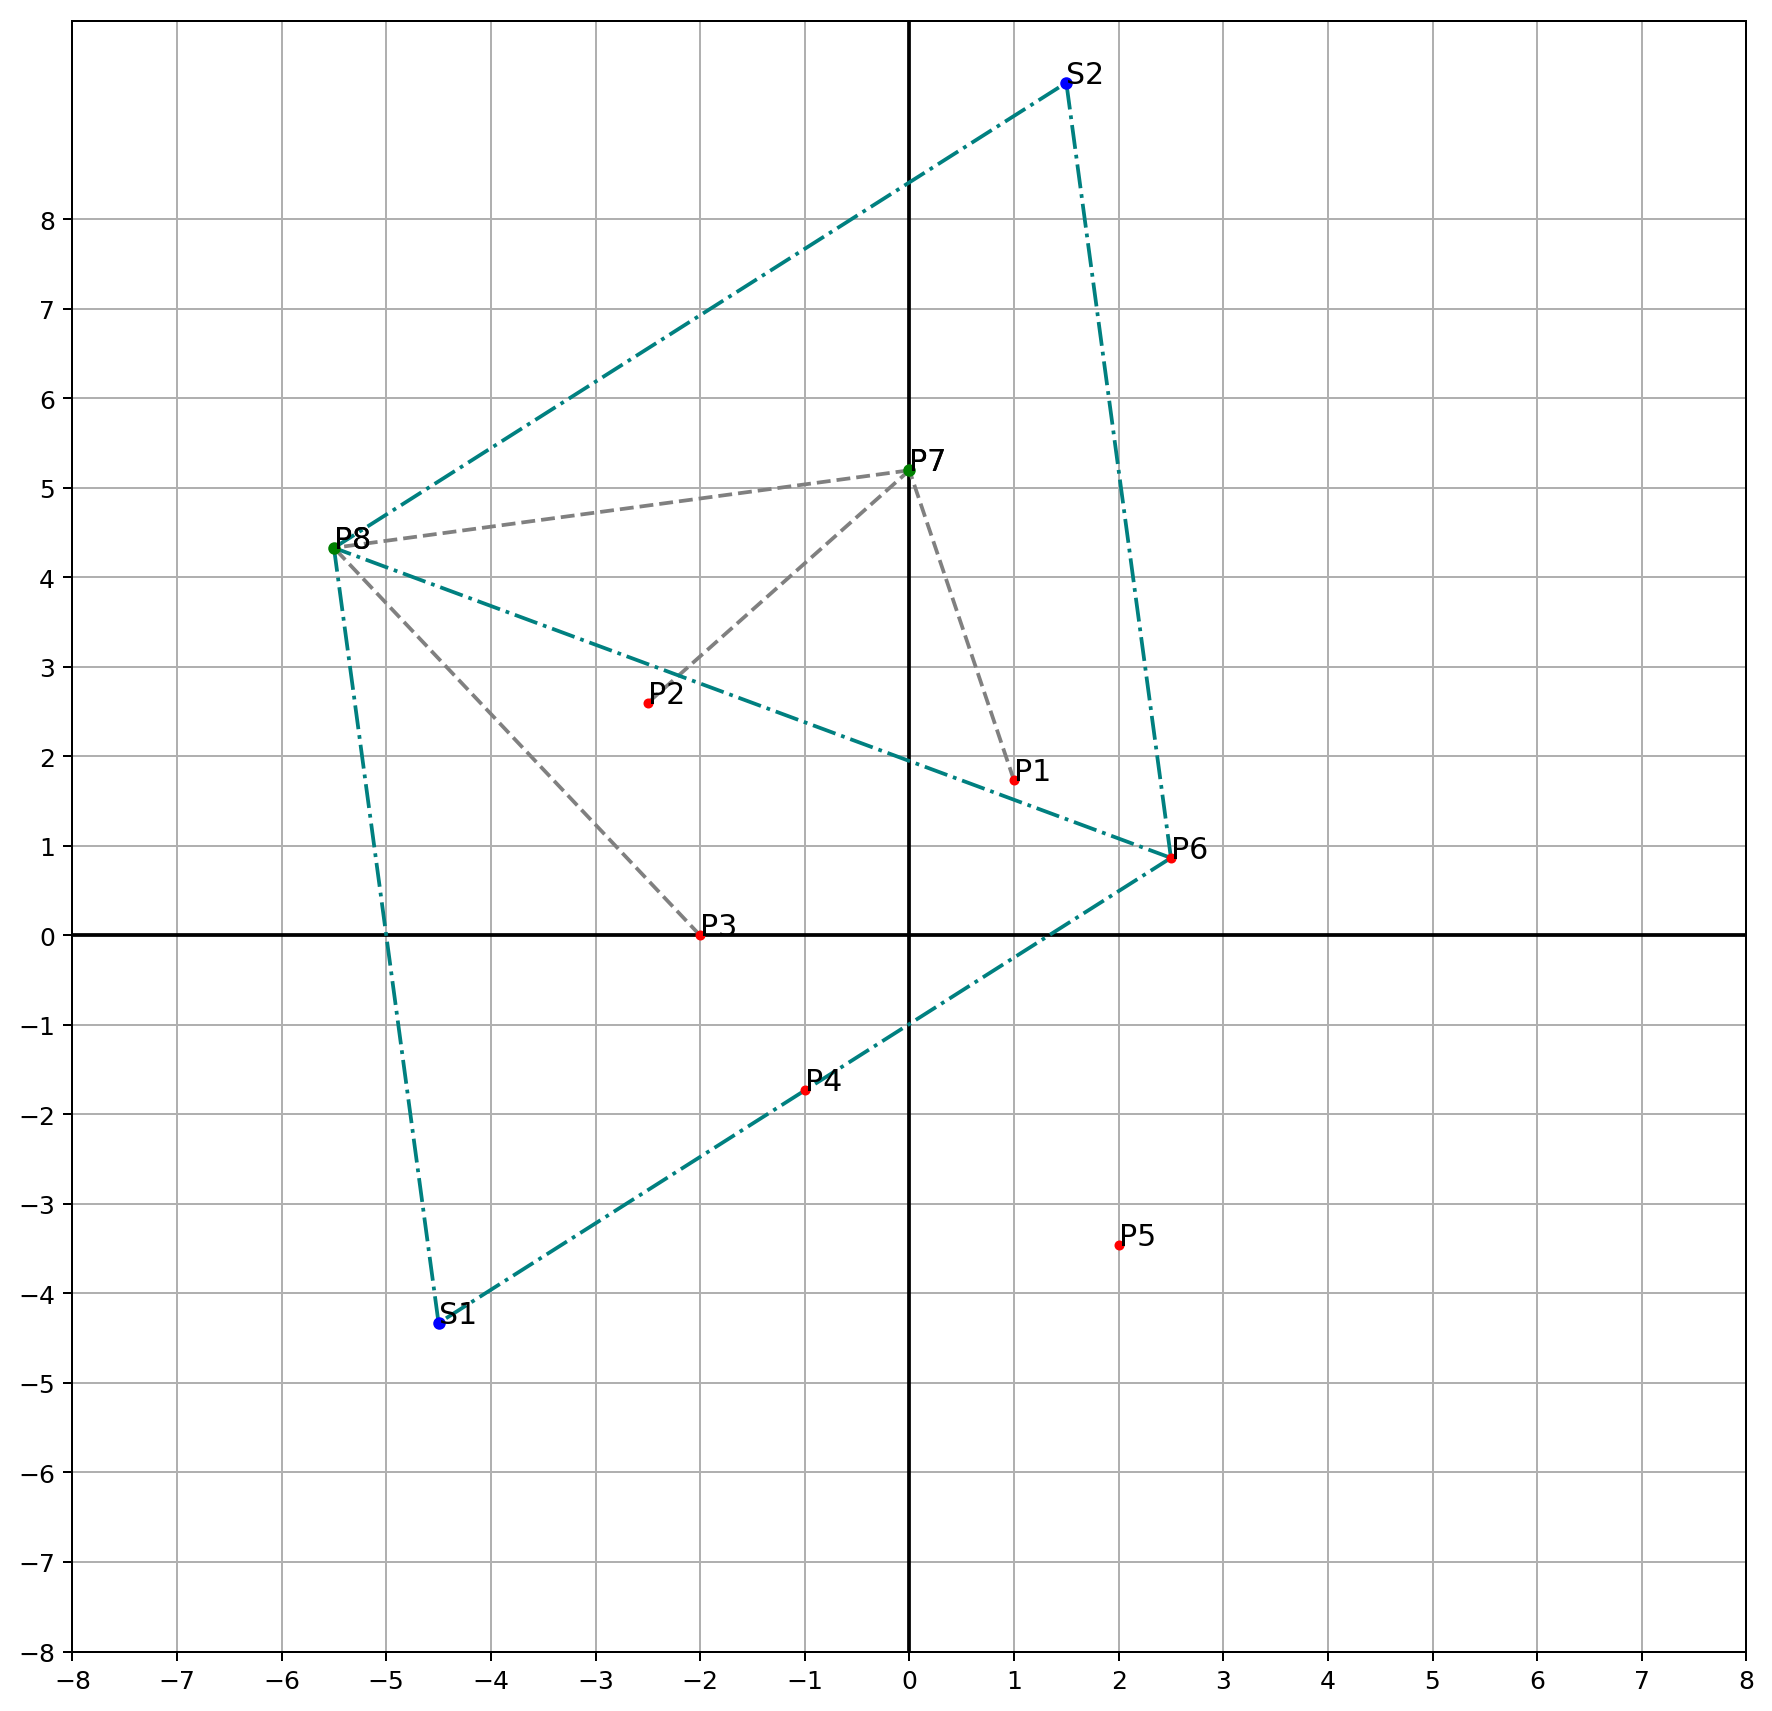

Выбрали необходимую граничную вершину P9:


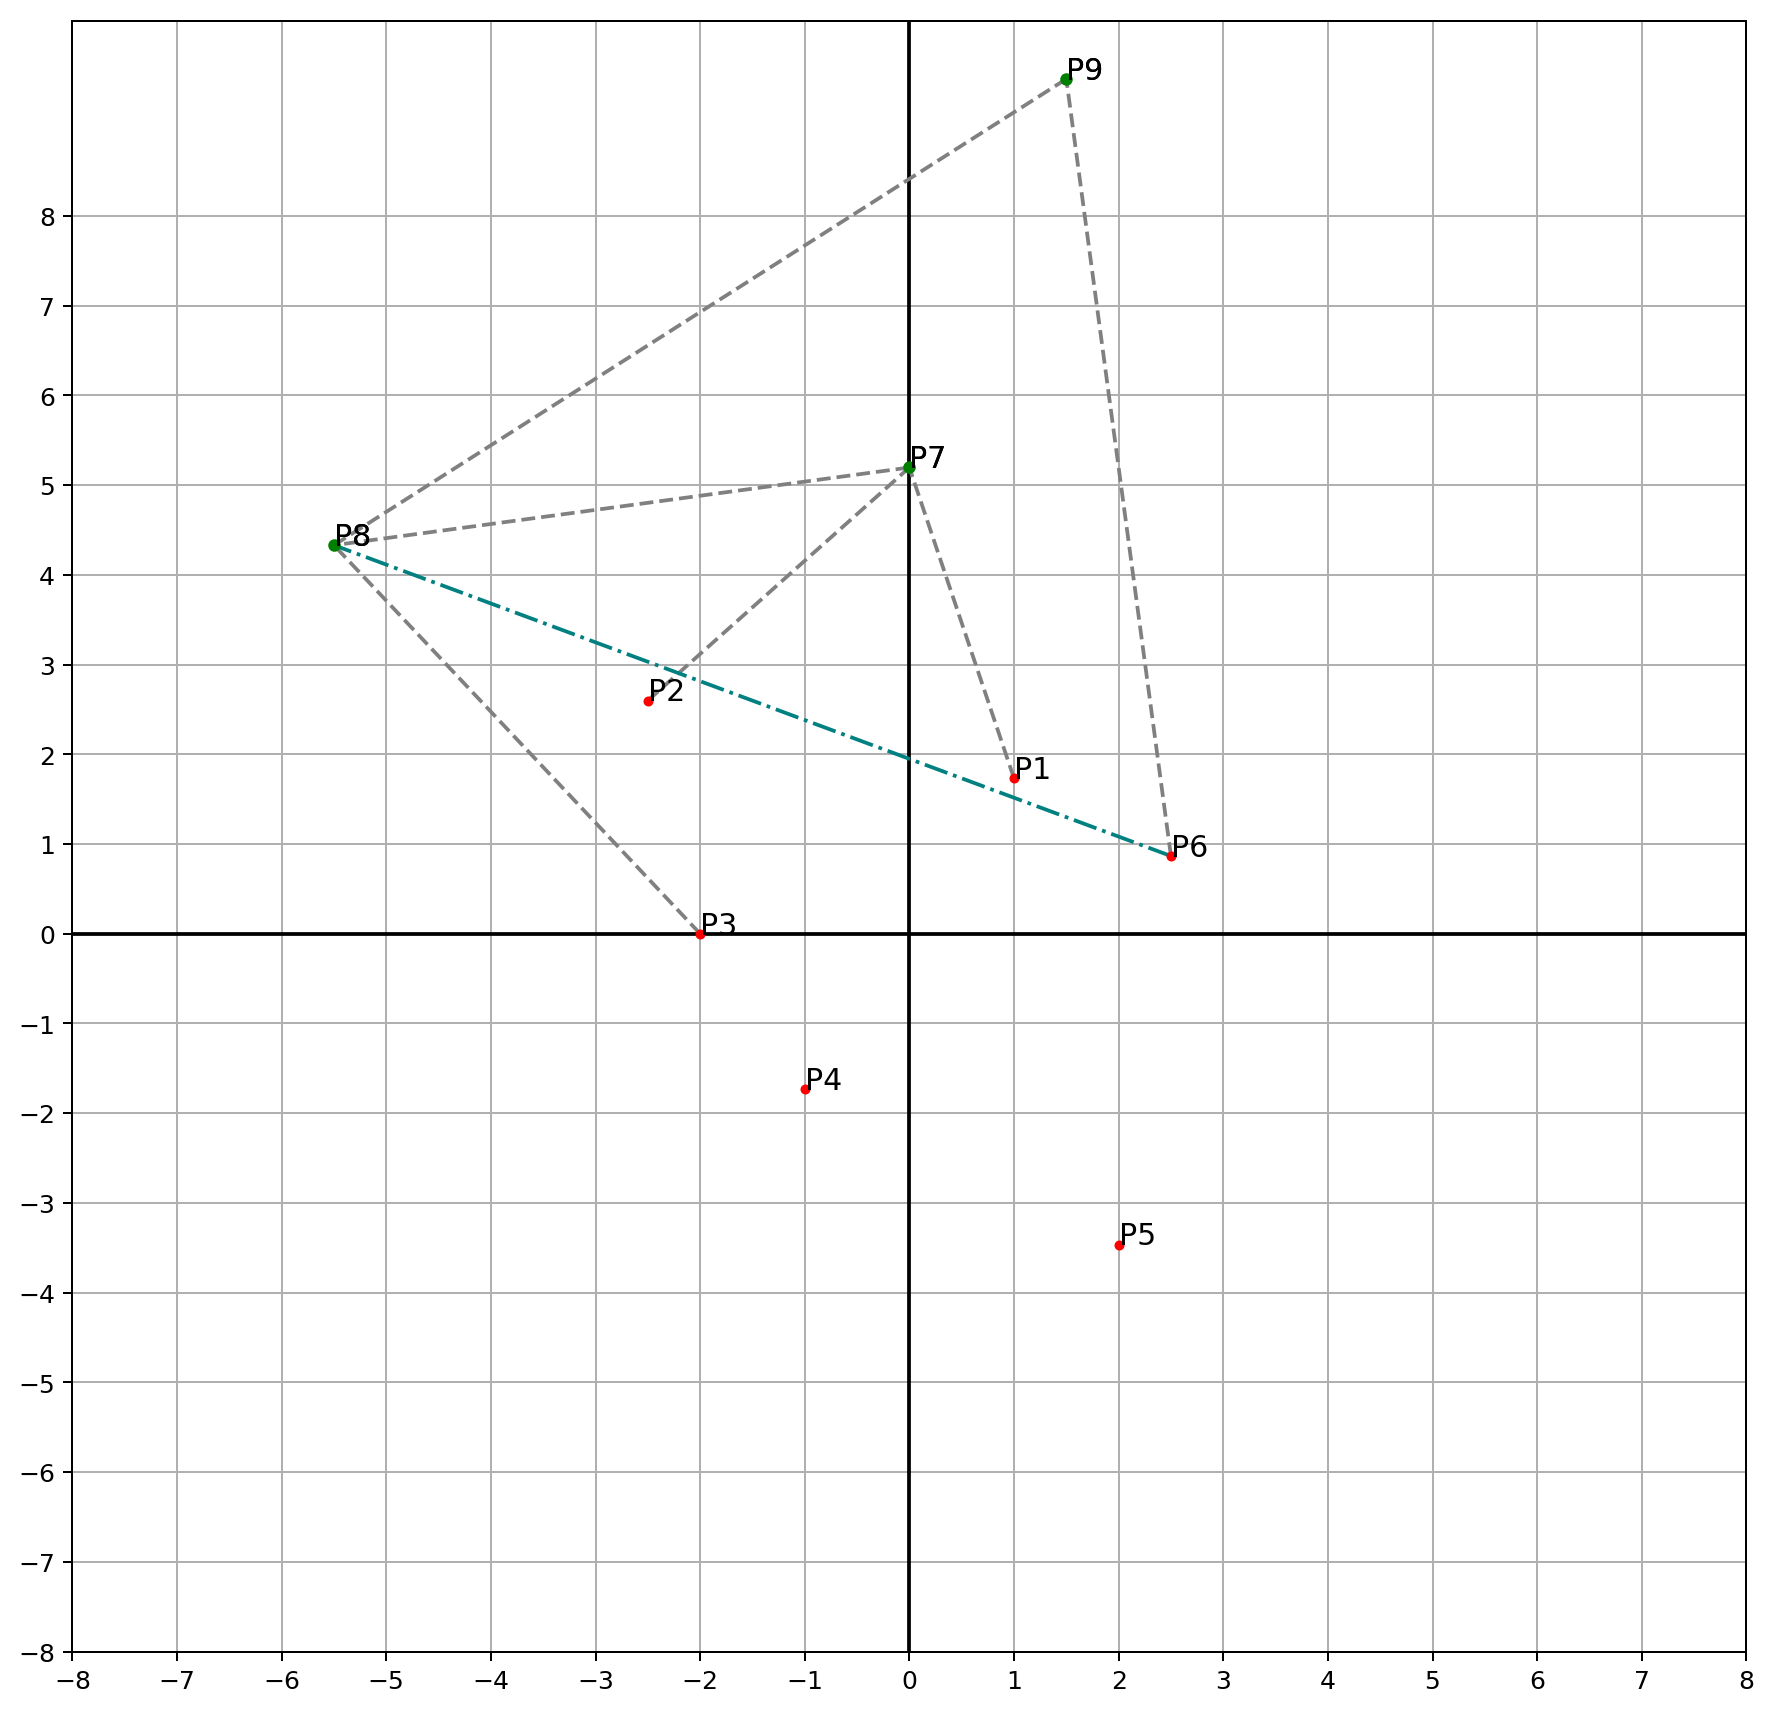

Строим вершины треугольников - S1 и S2:


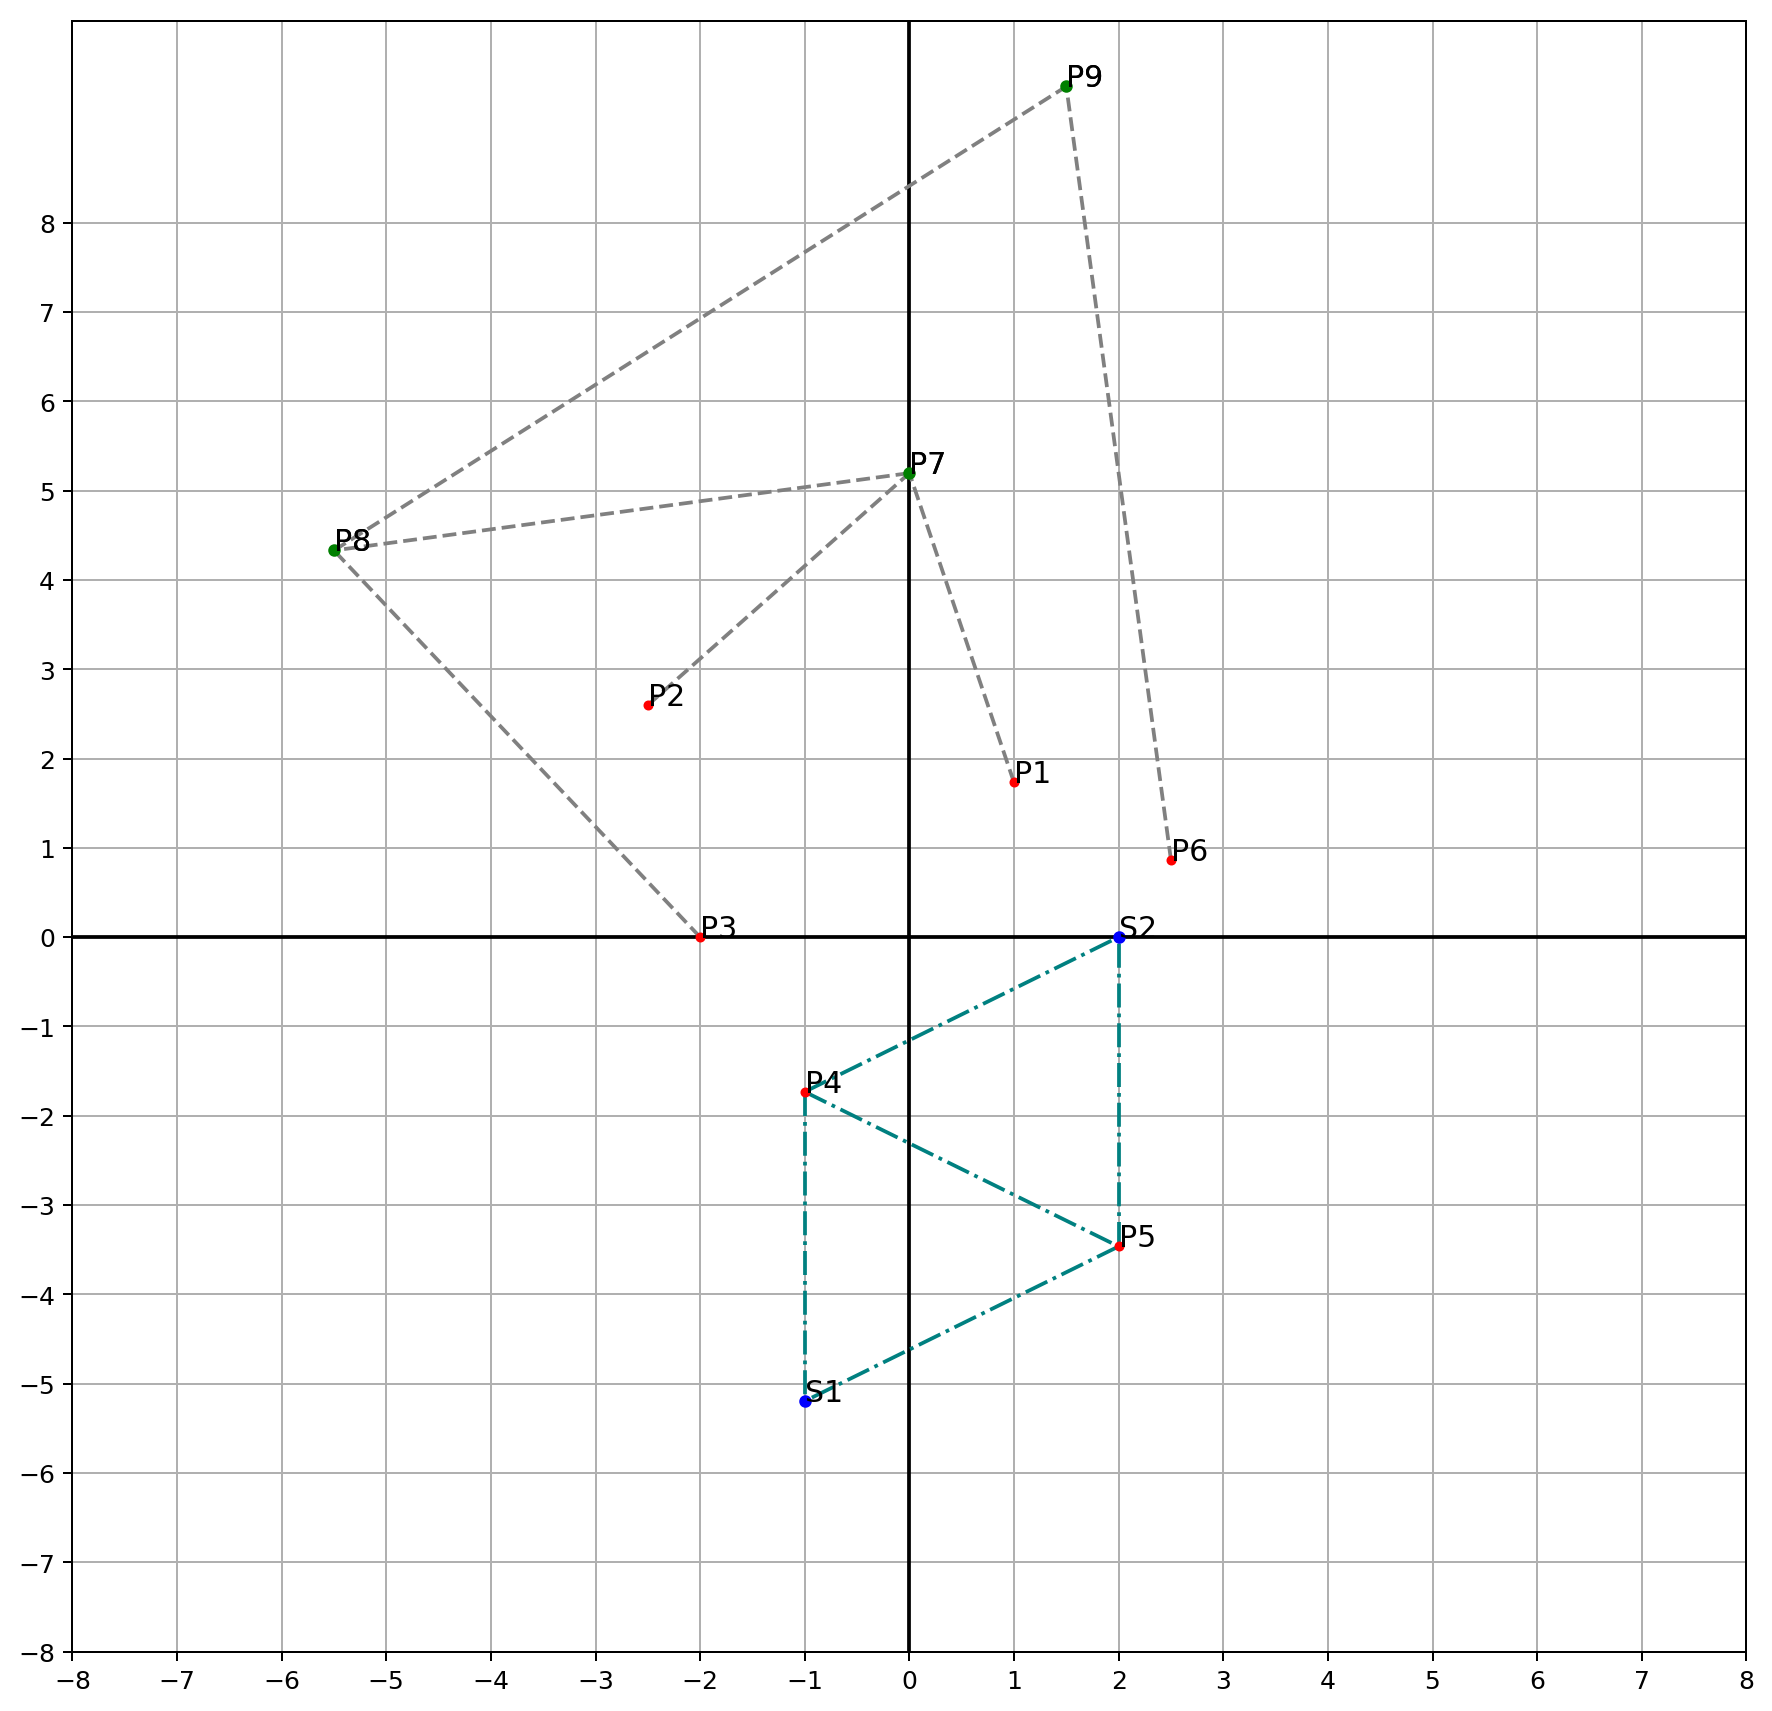

Выбрали необходимую граничную вершину P10:


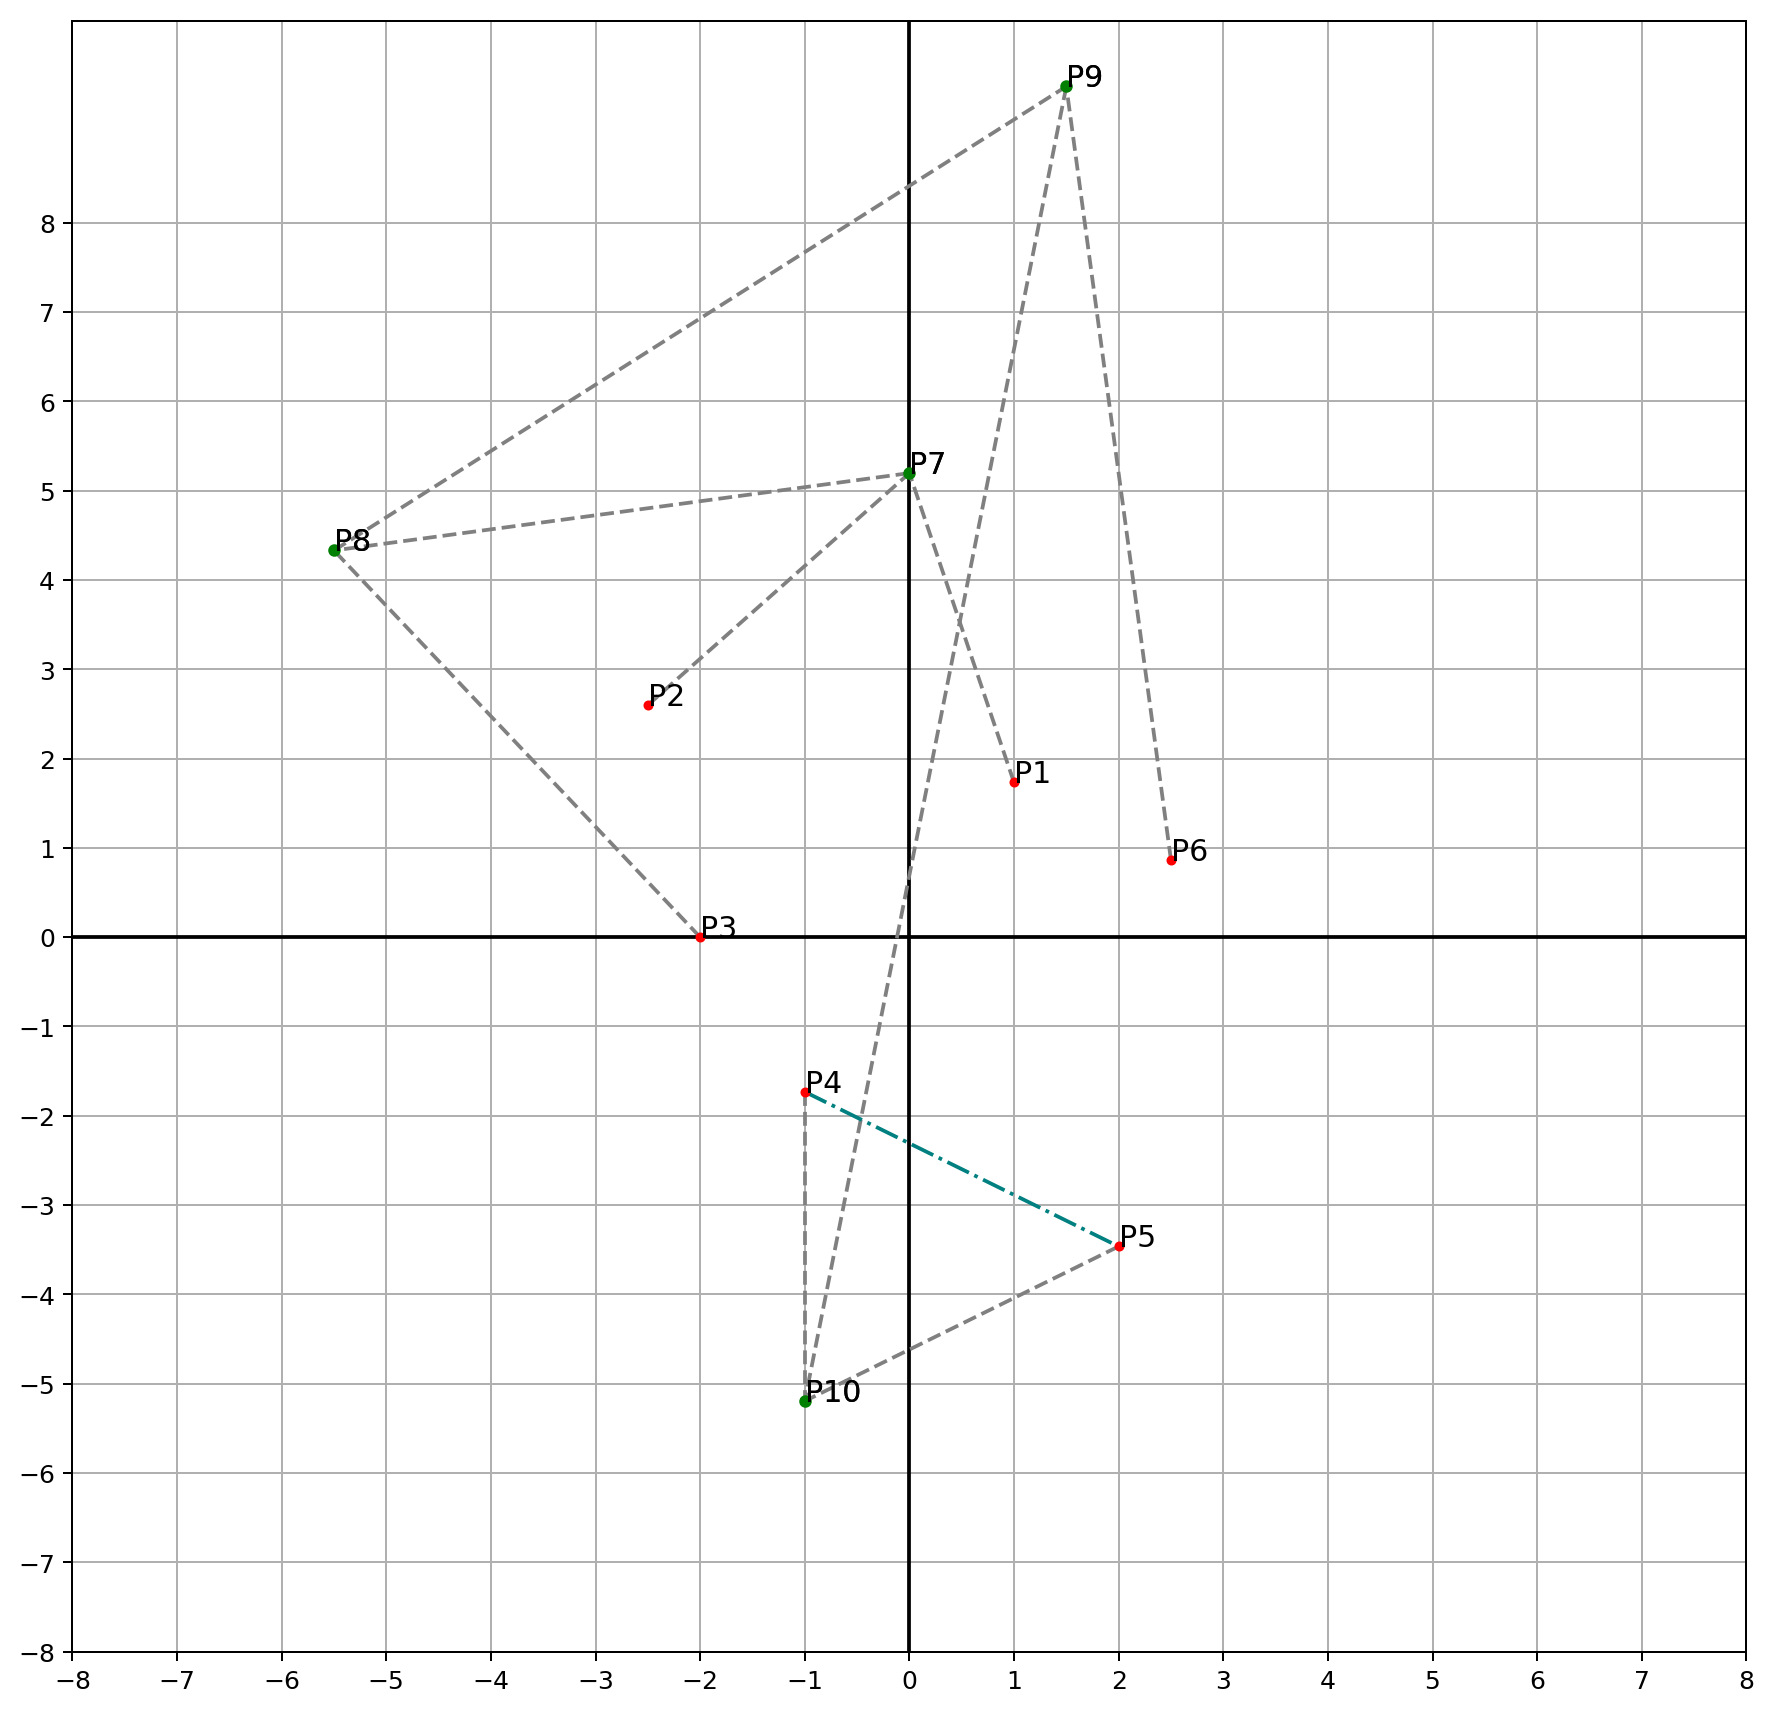

Нашли центр описанной окружности с радиусом 2.0 и центром в S1:


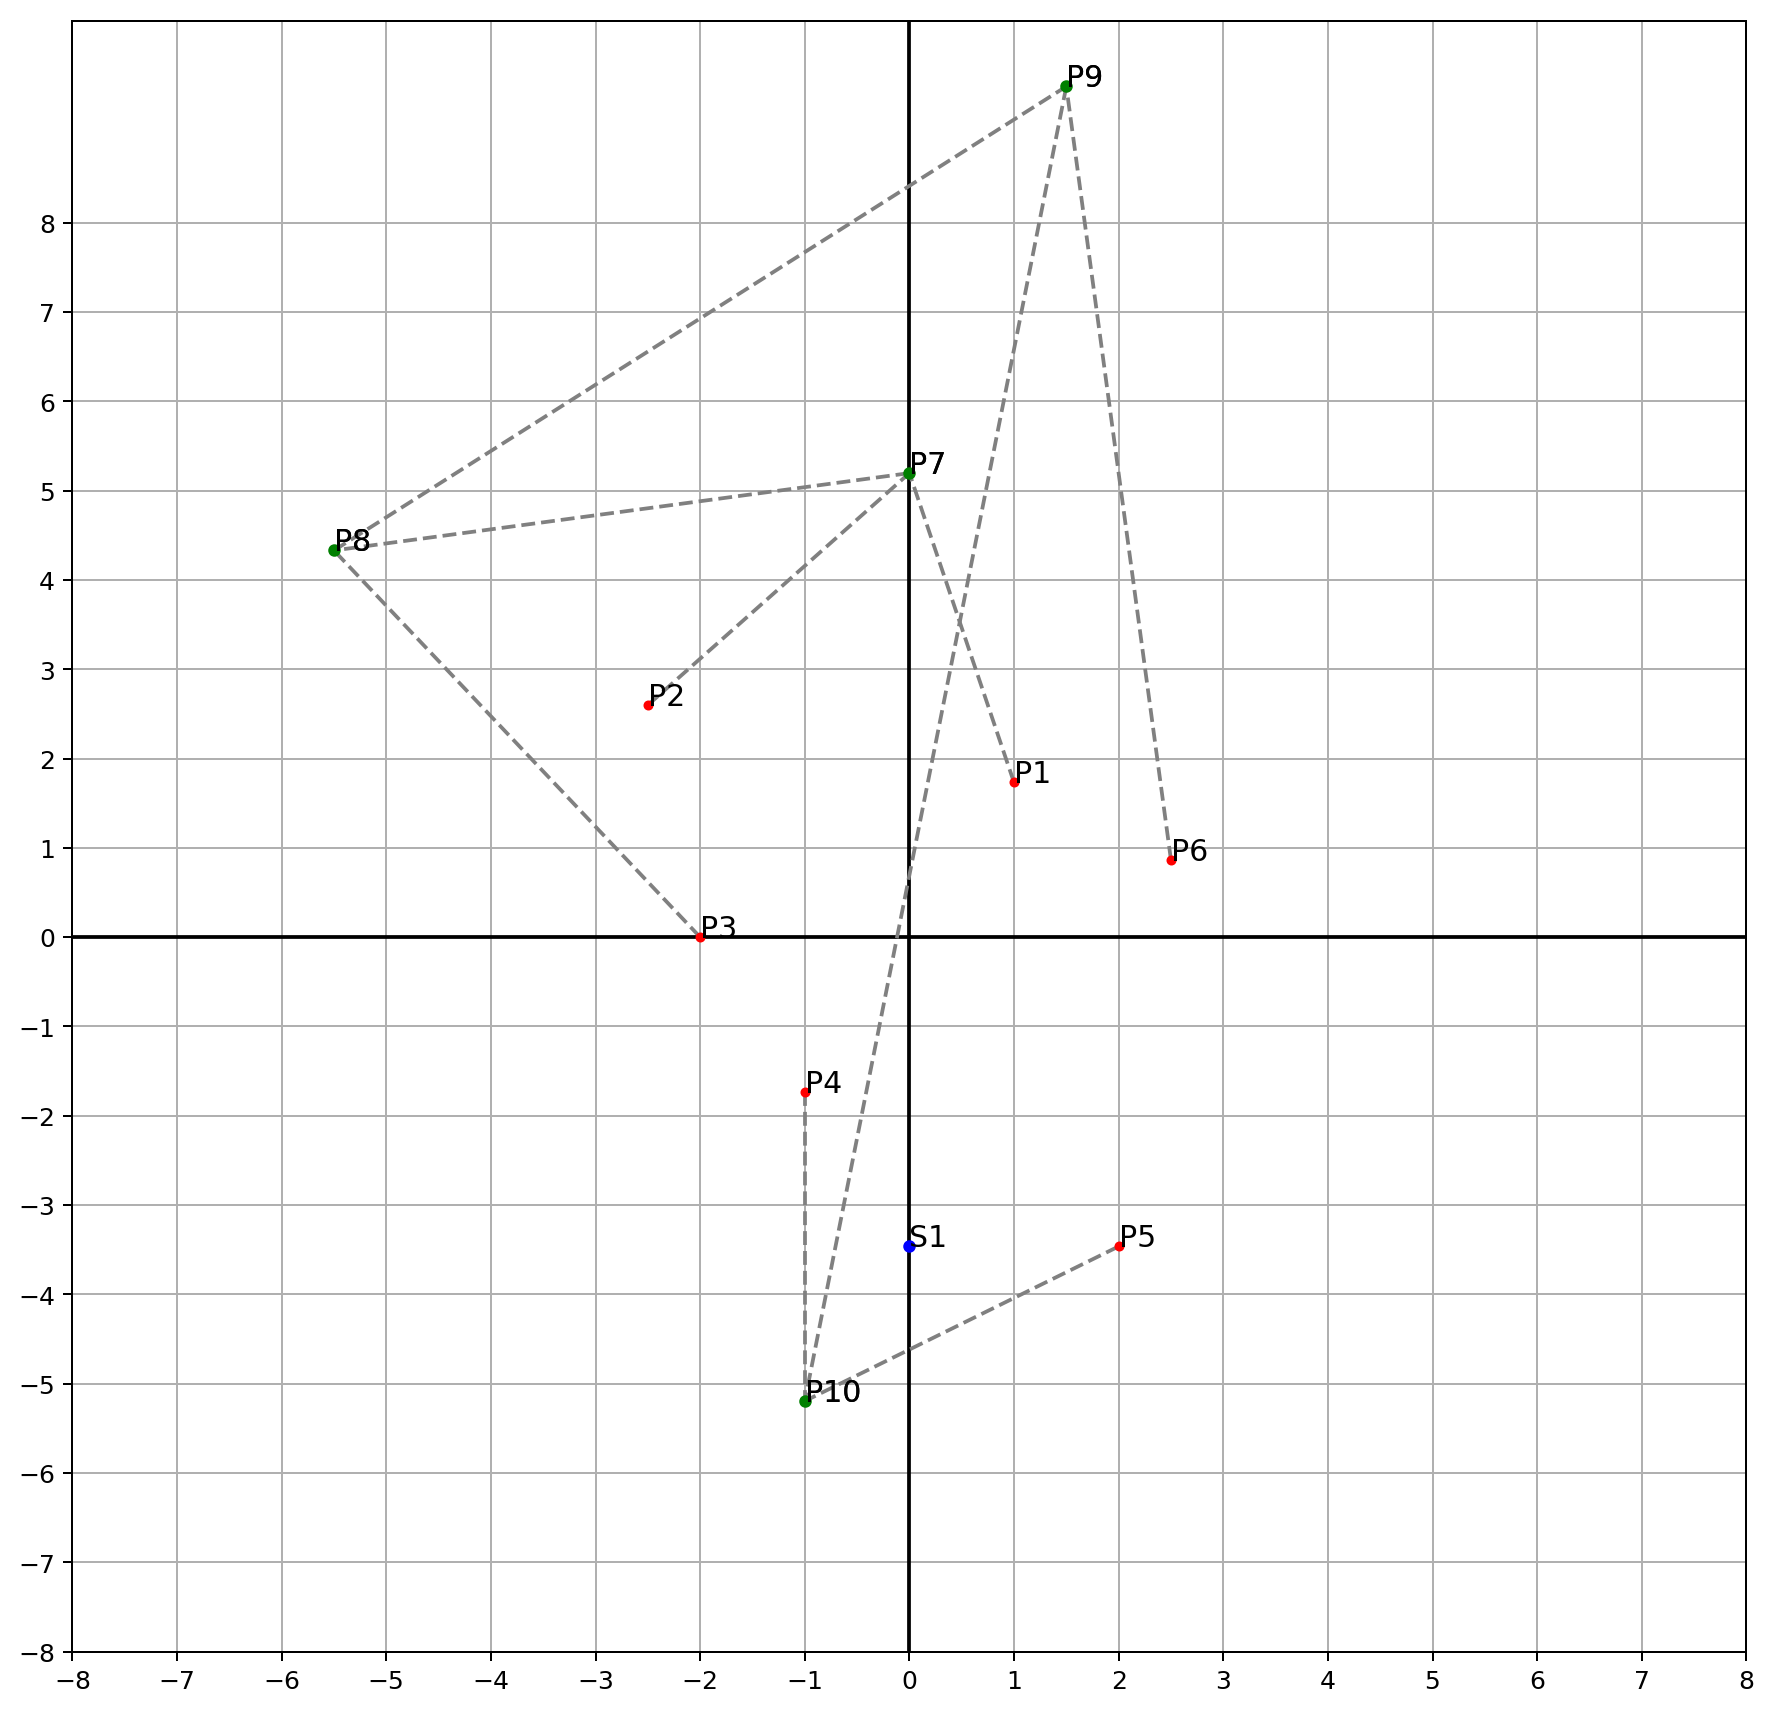

Check: OK
Нашли положение новой точки Штейнера - S1:


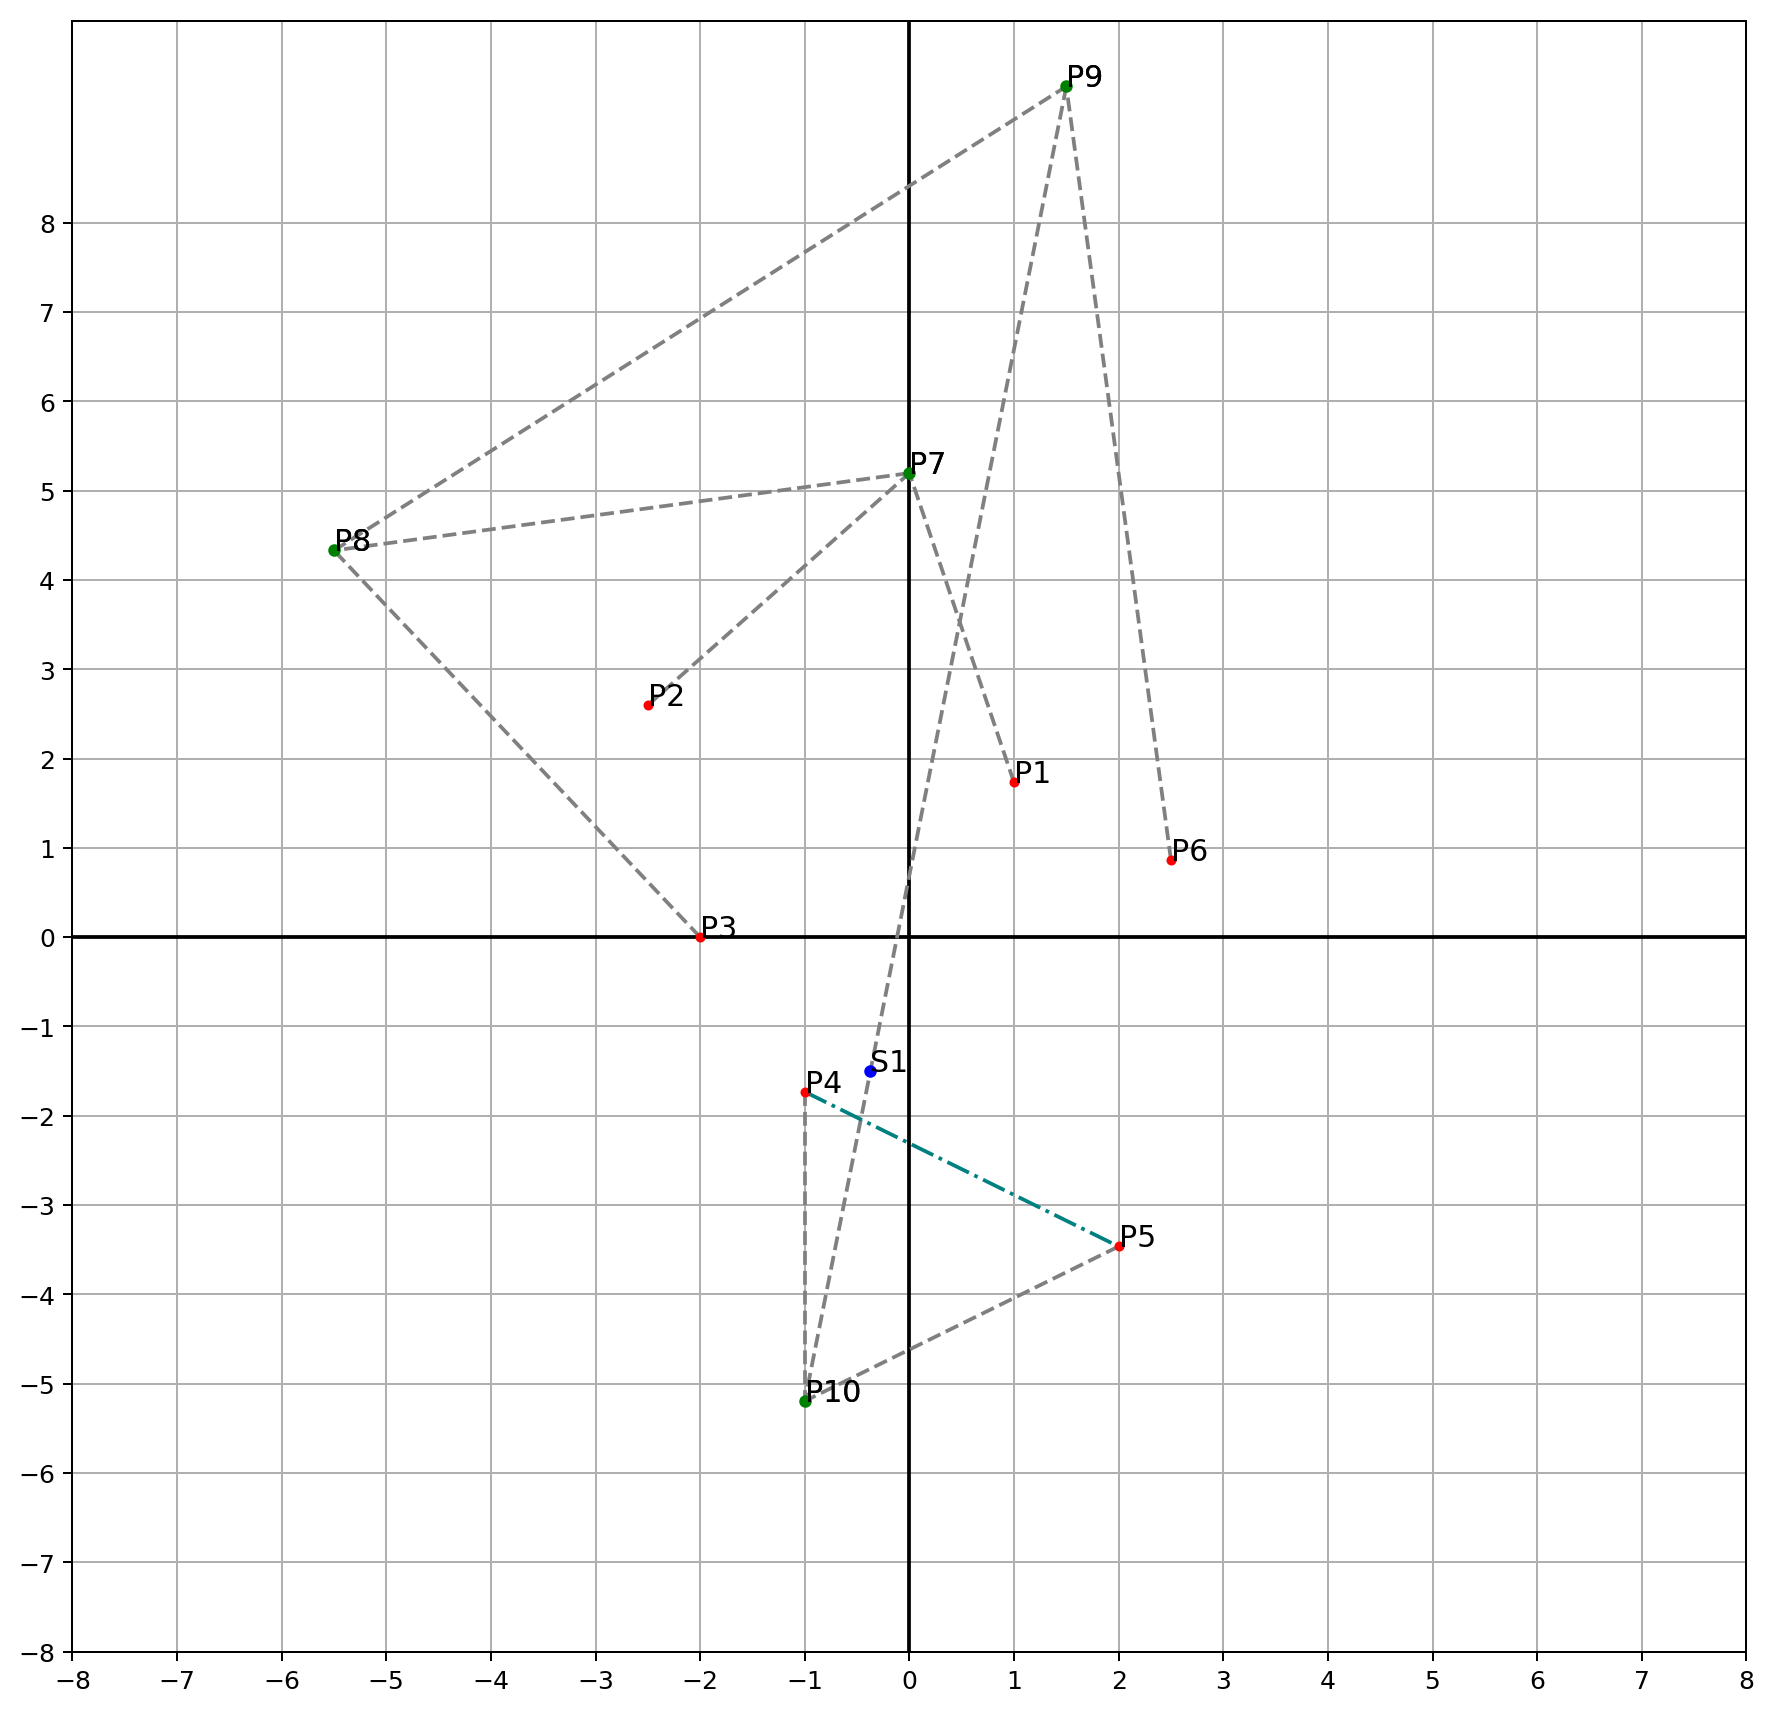

Построили точку Штейнера P10:


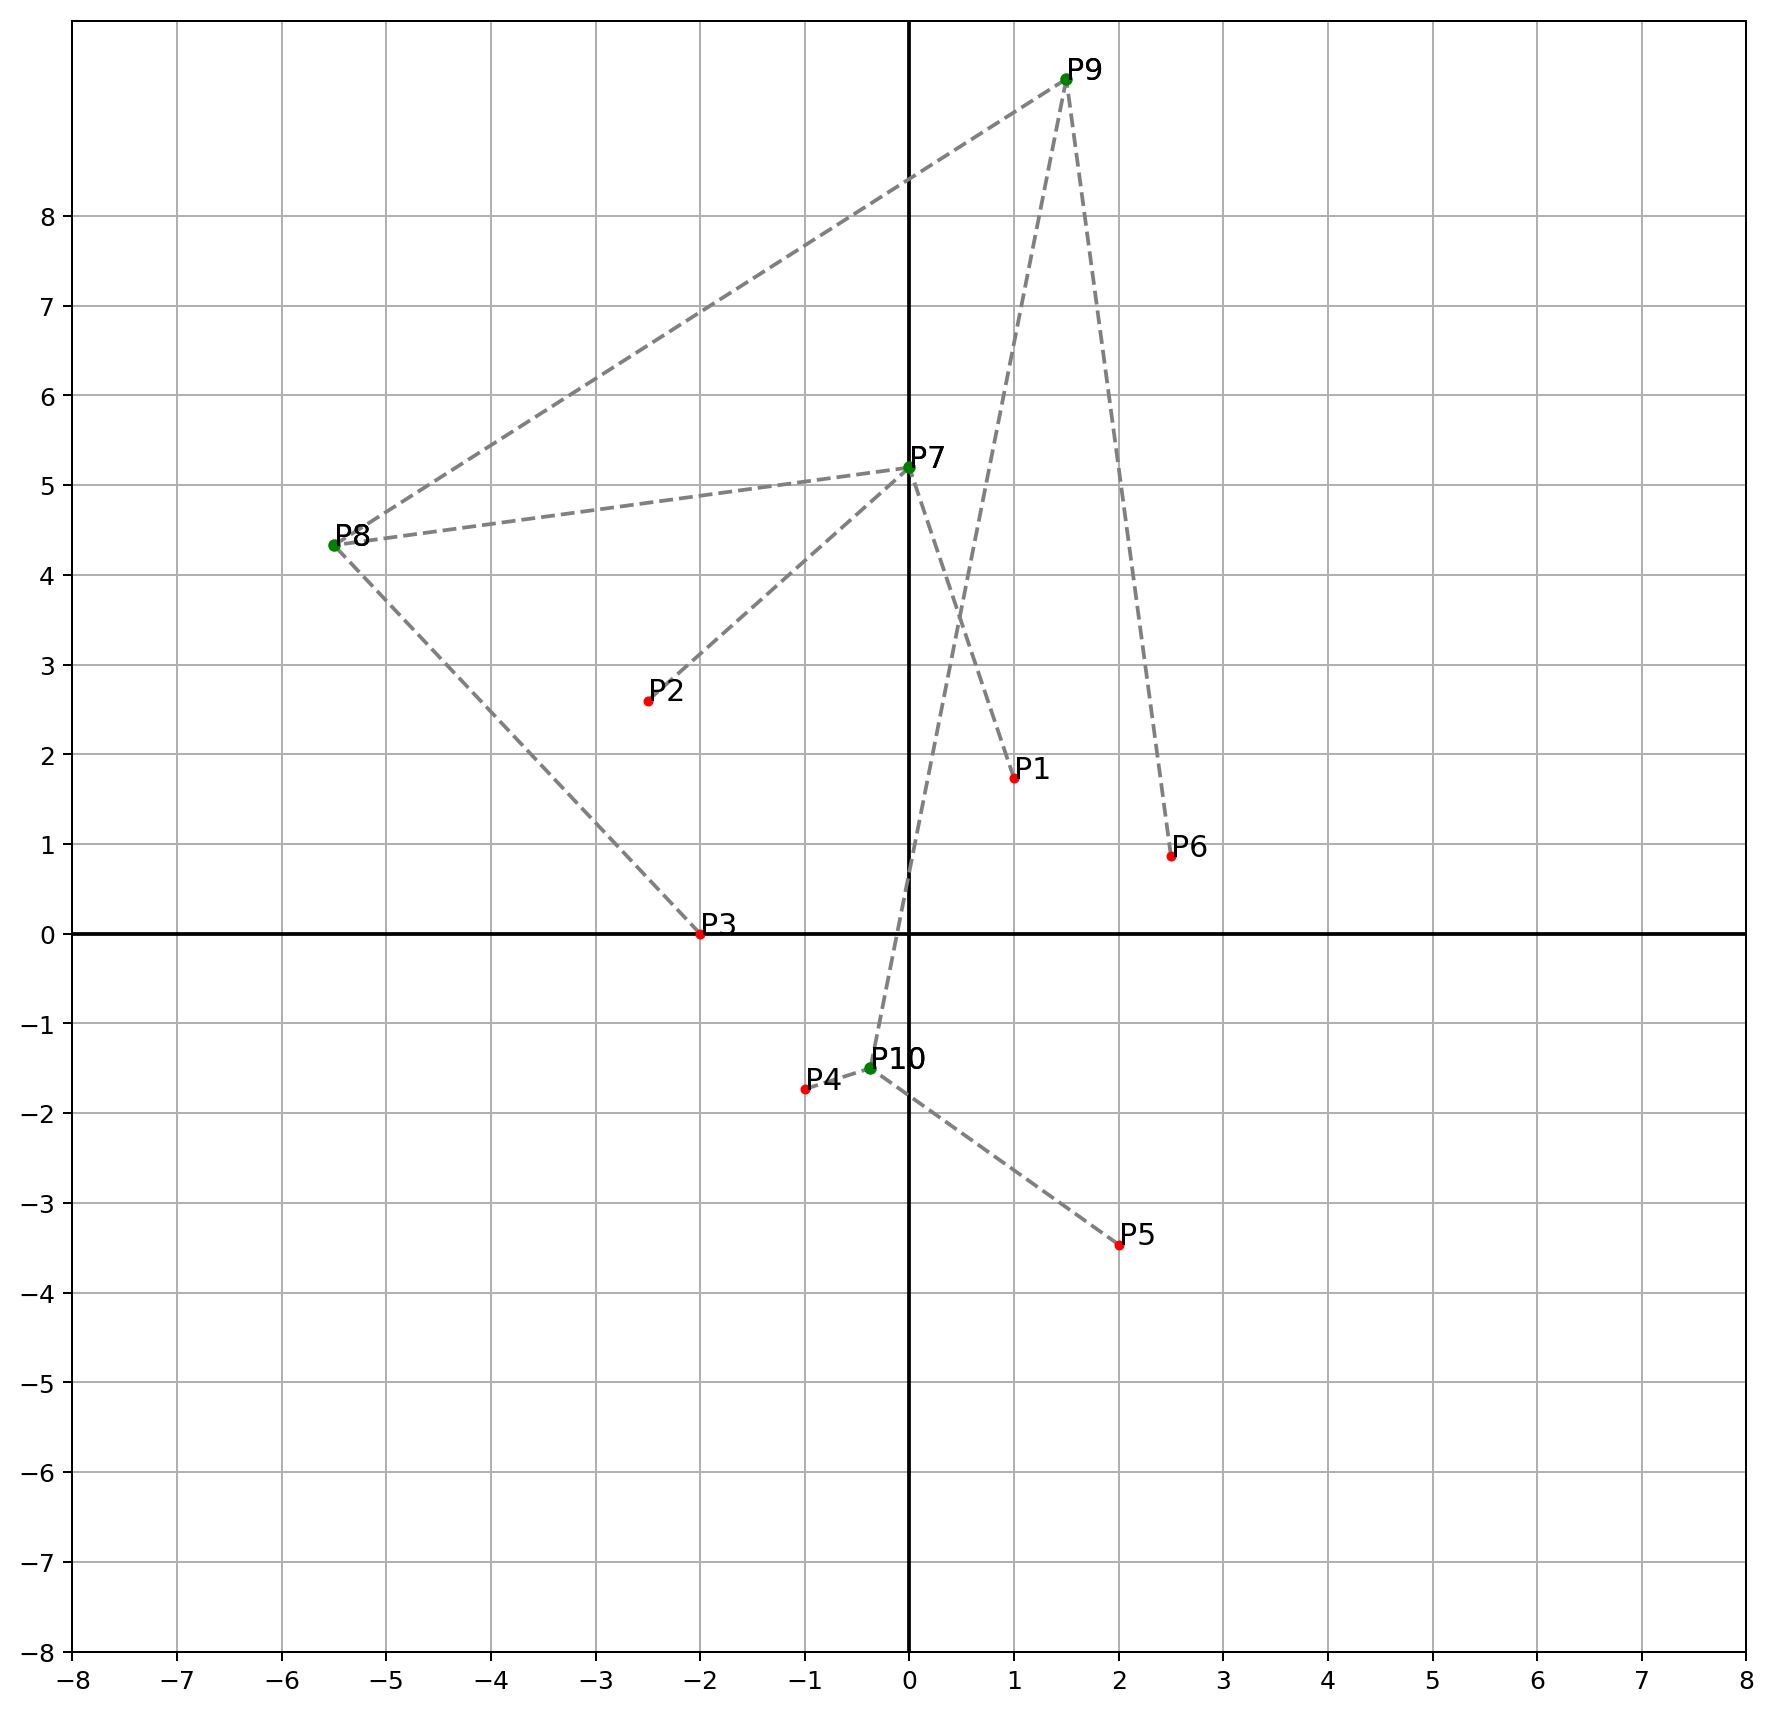

Нашли центр описанной окружности с радиусом 5.03322295685 и центром в S1:


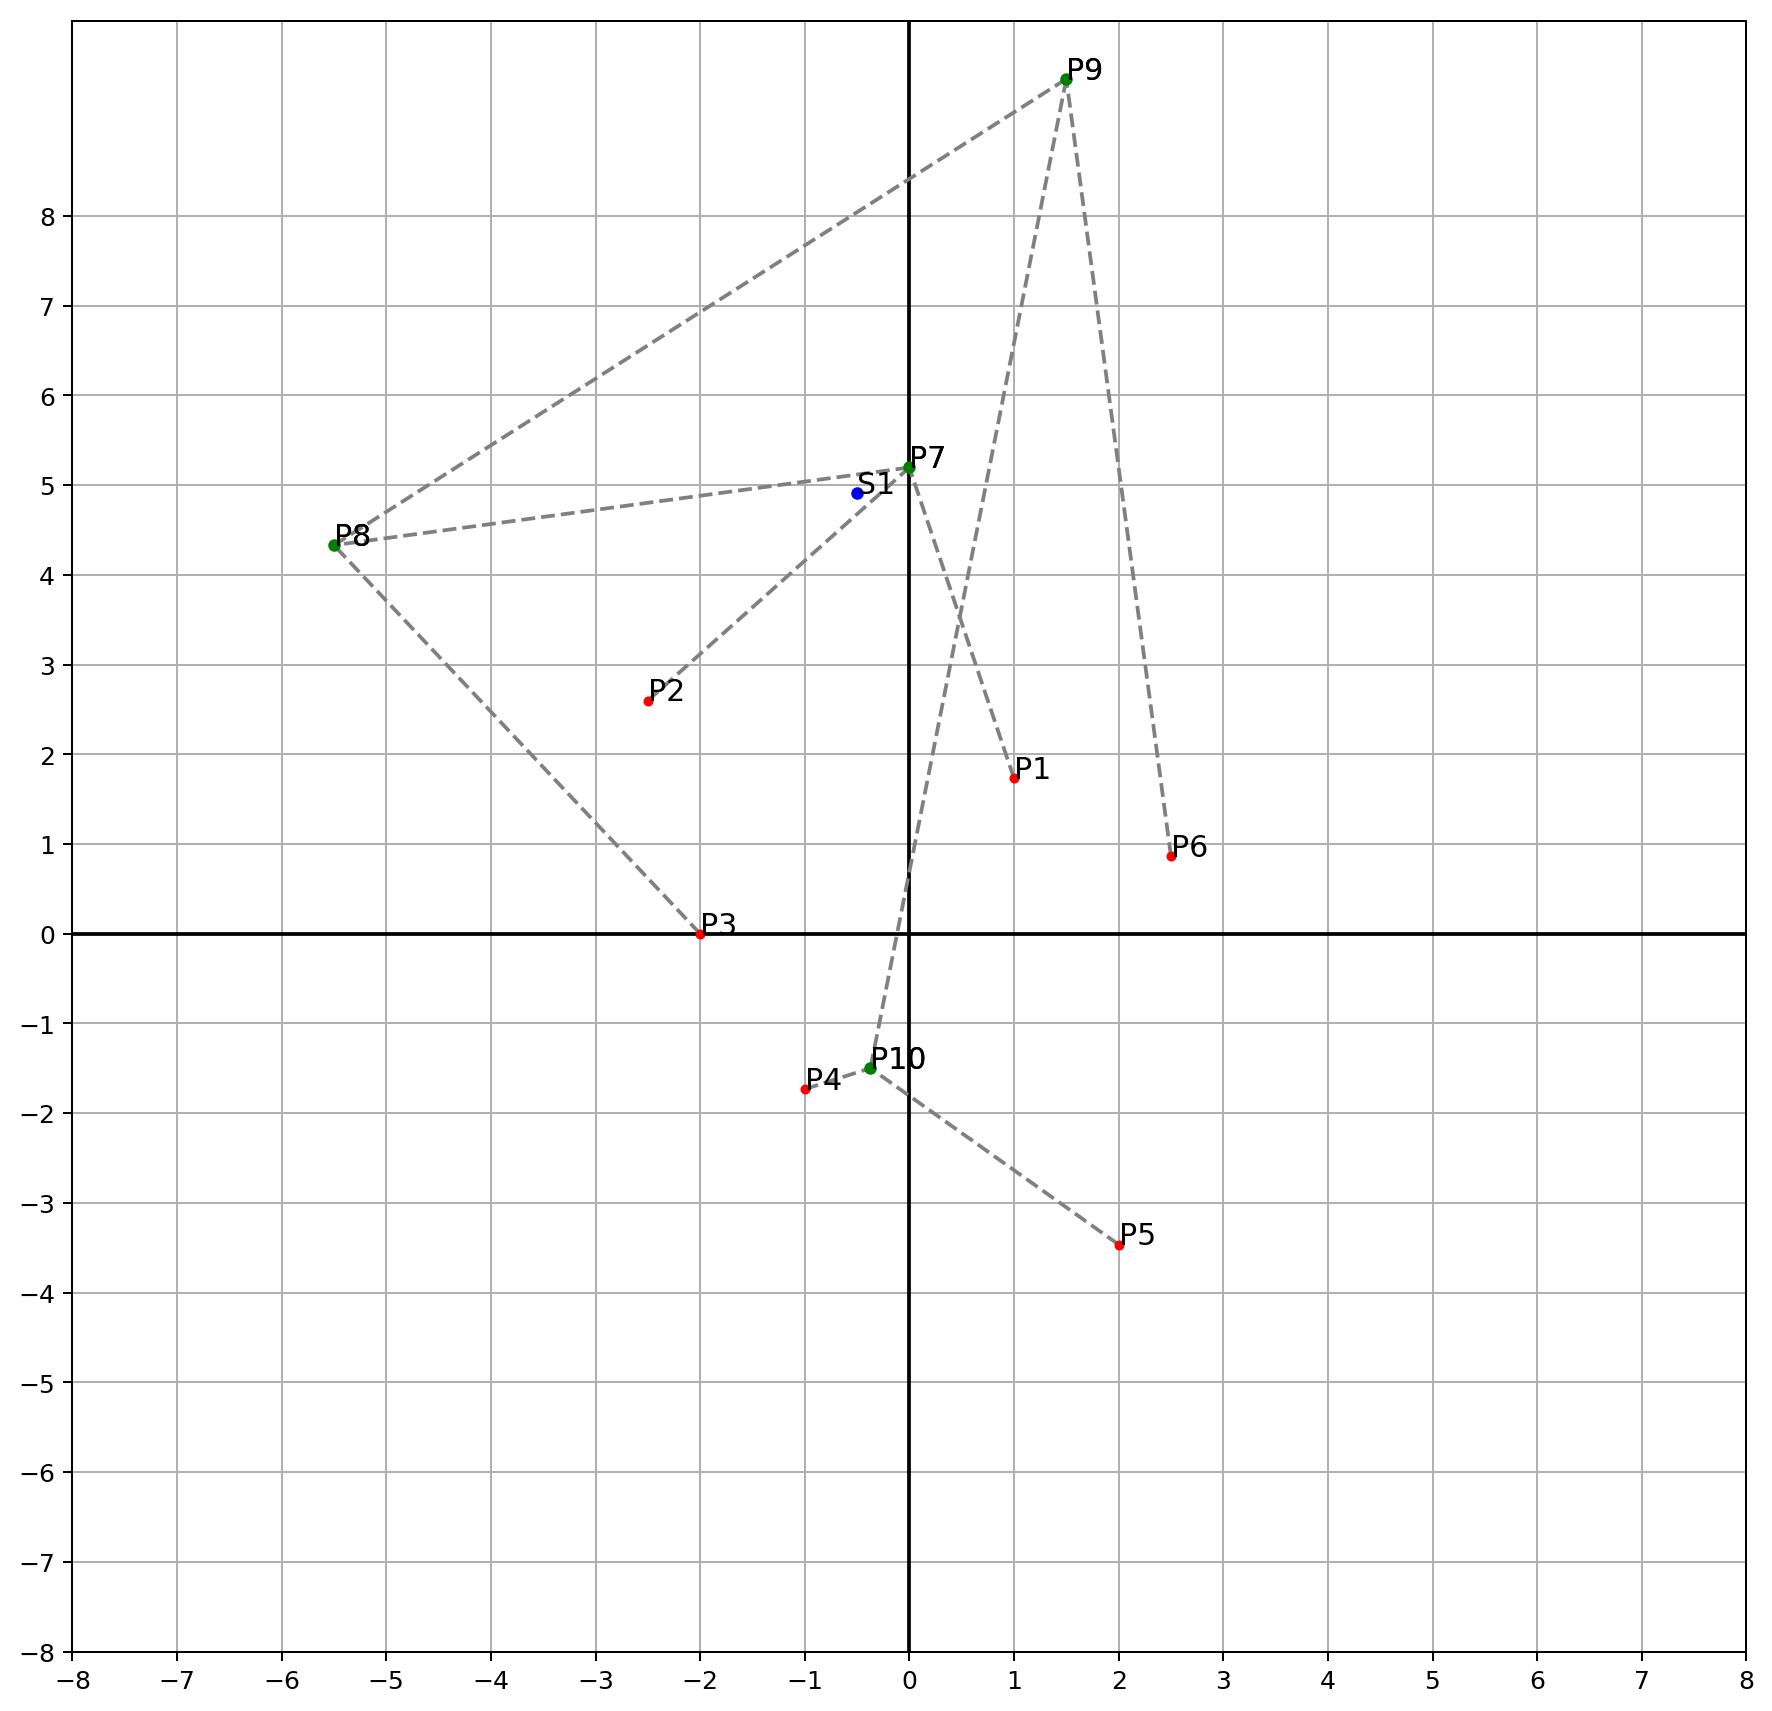

Check: OK
Нашли положение новой точки Штейнера - S1:


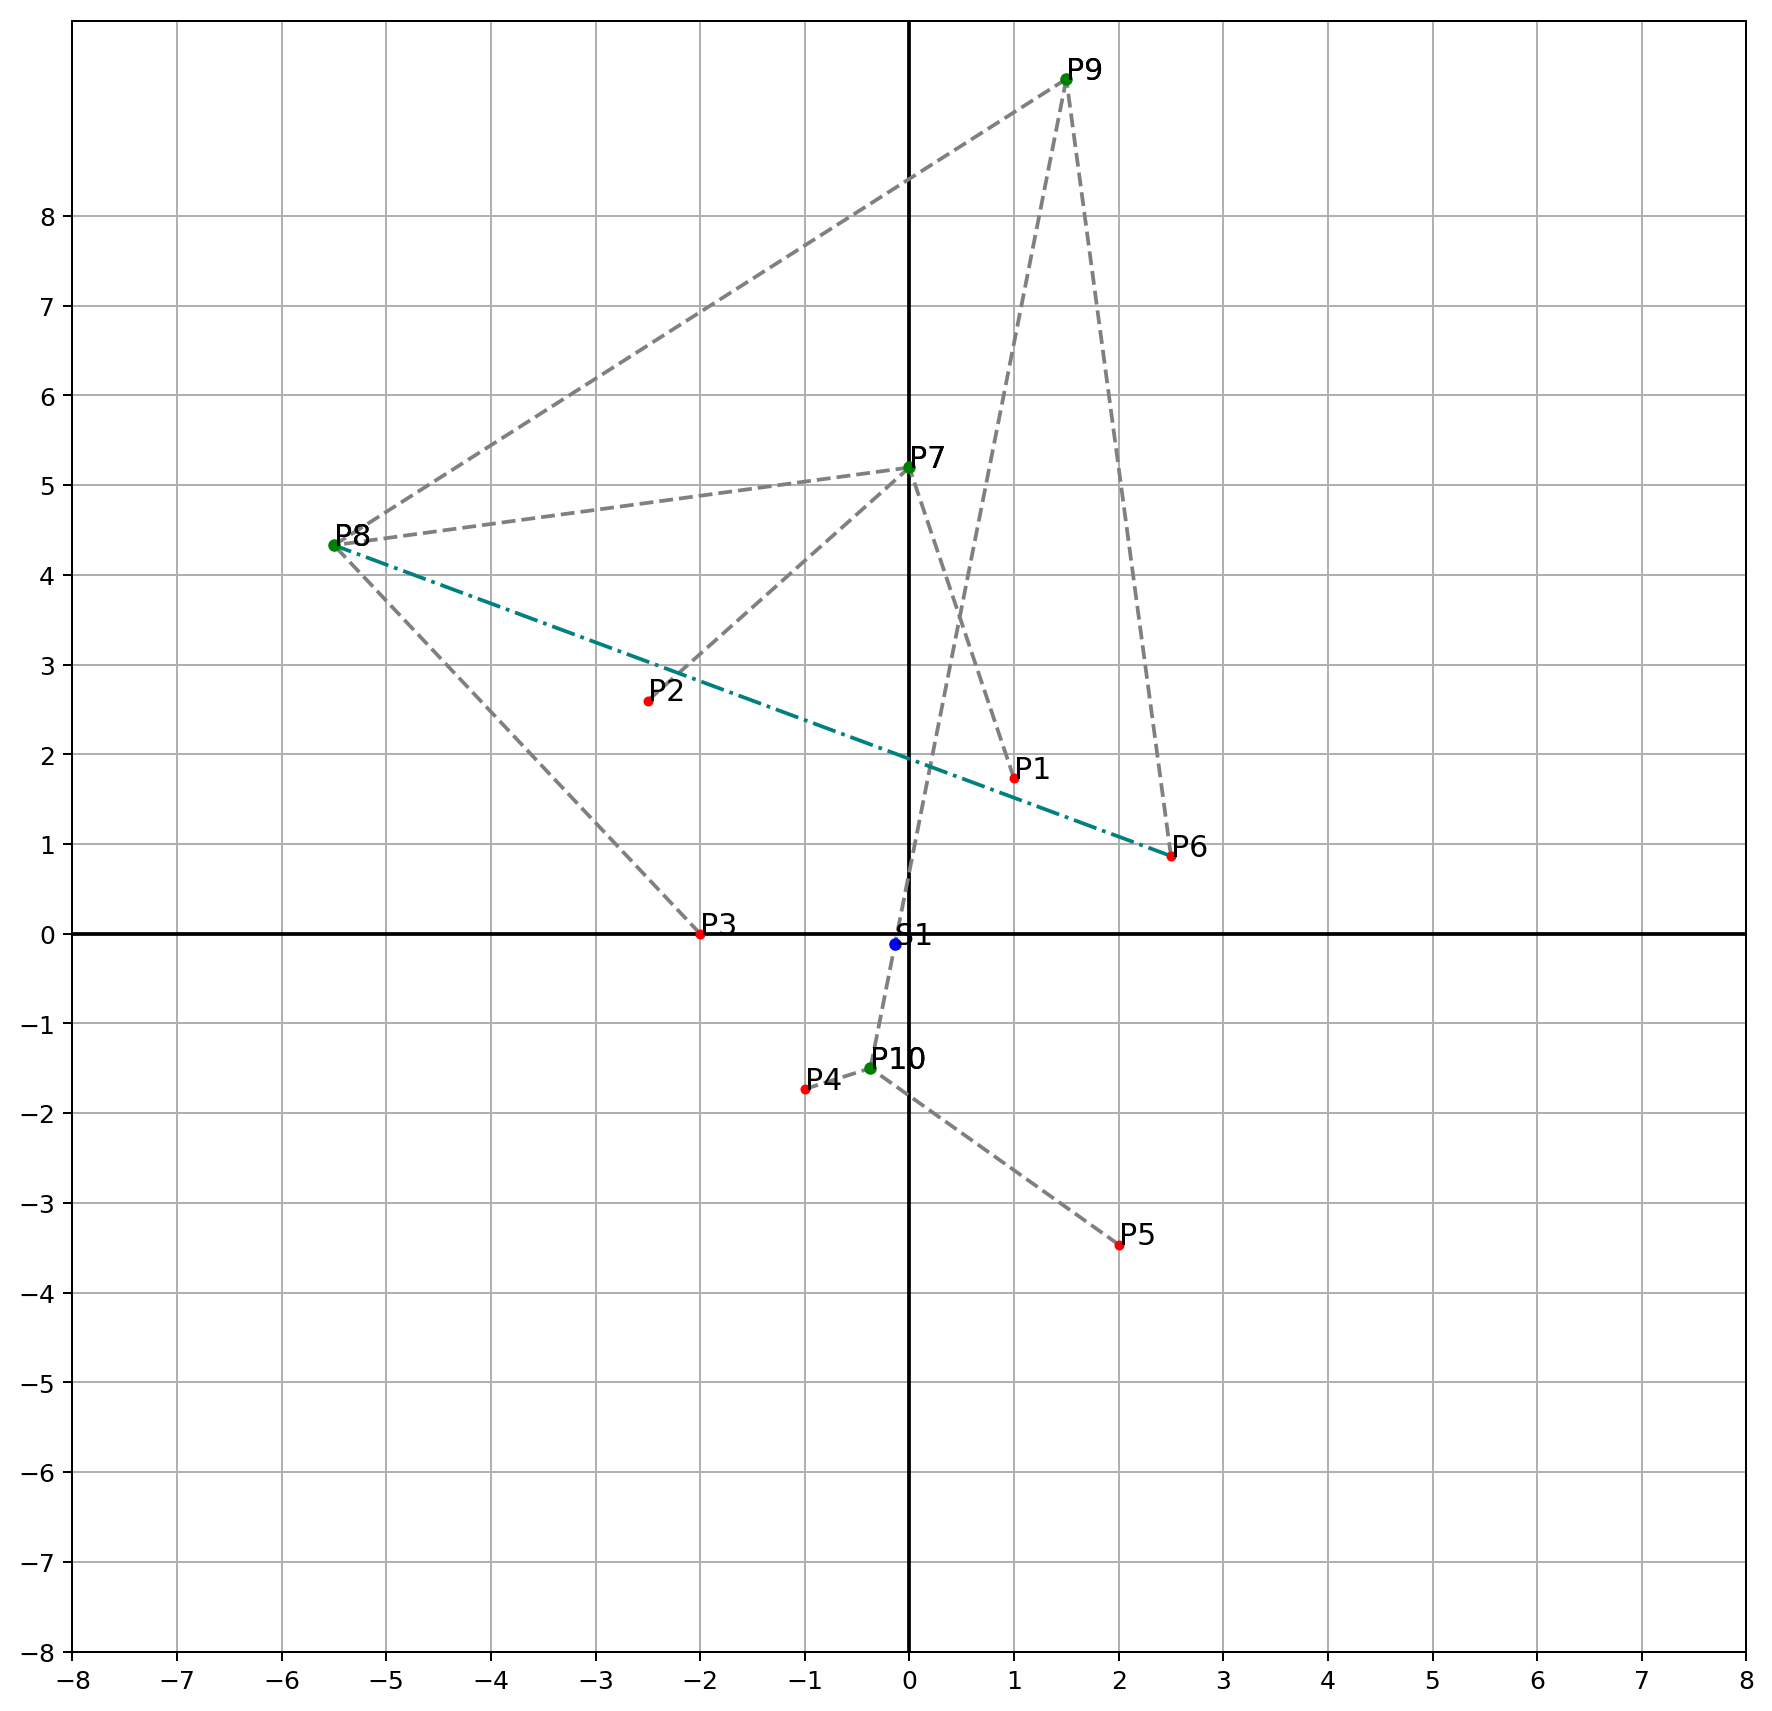

Построили точку Штейнера P9:


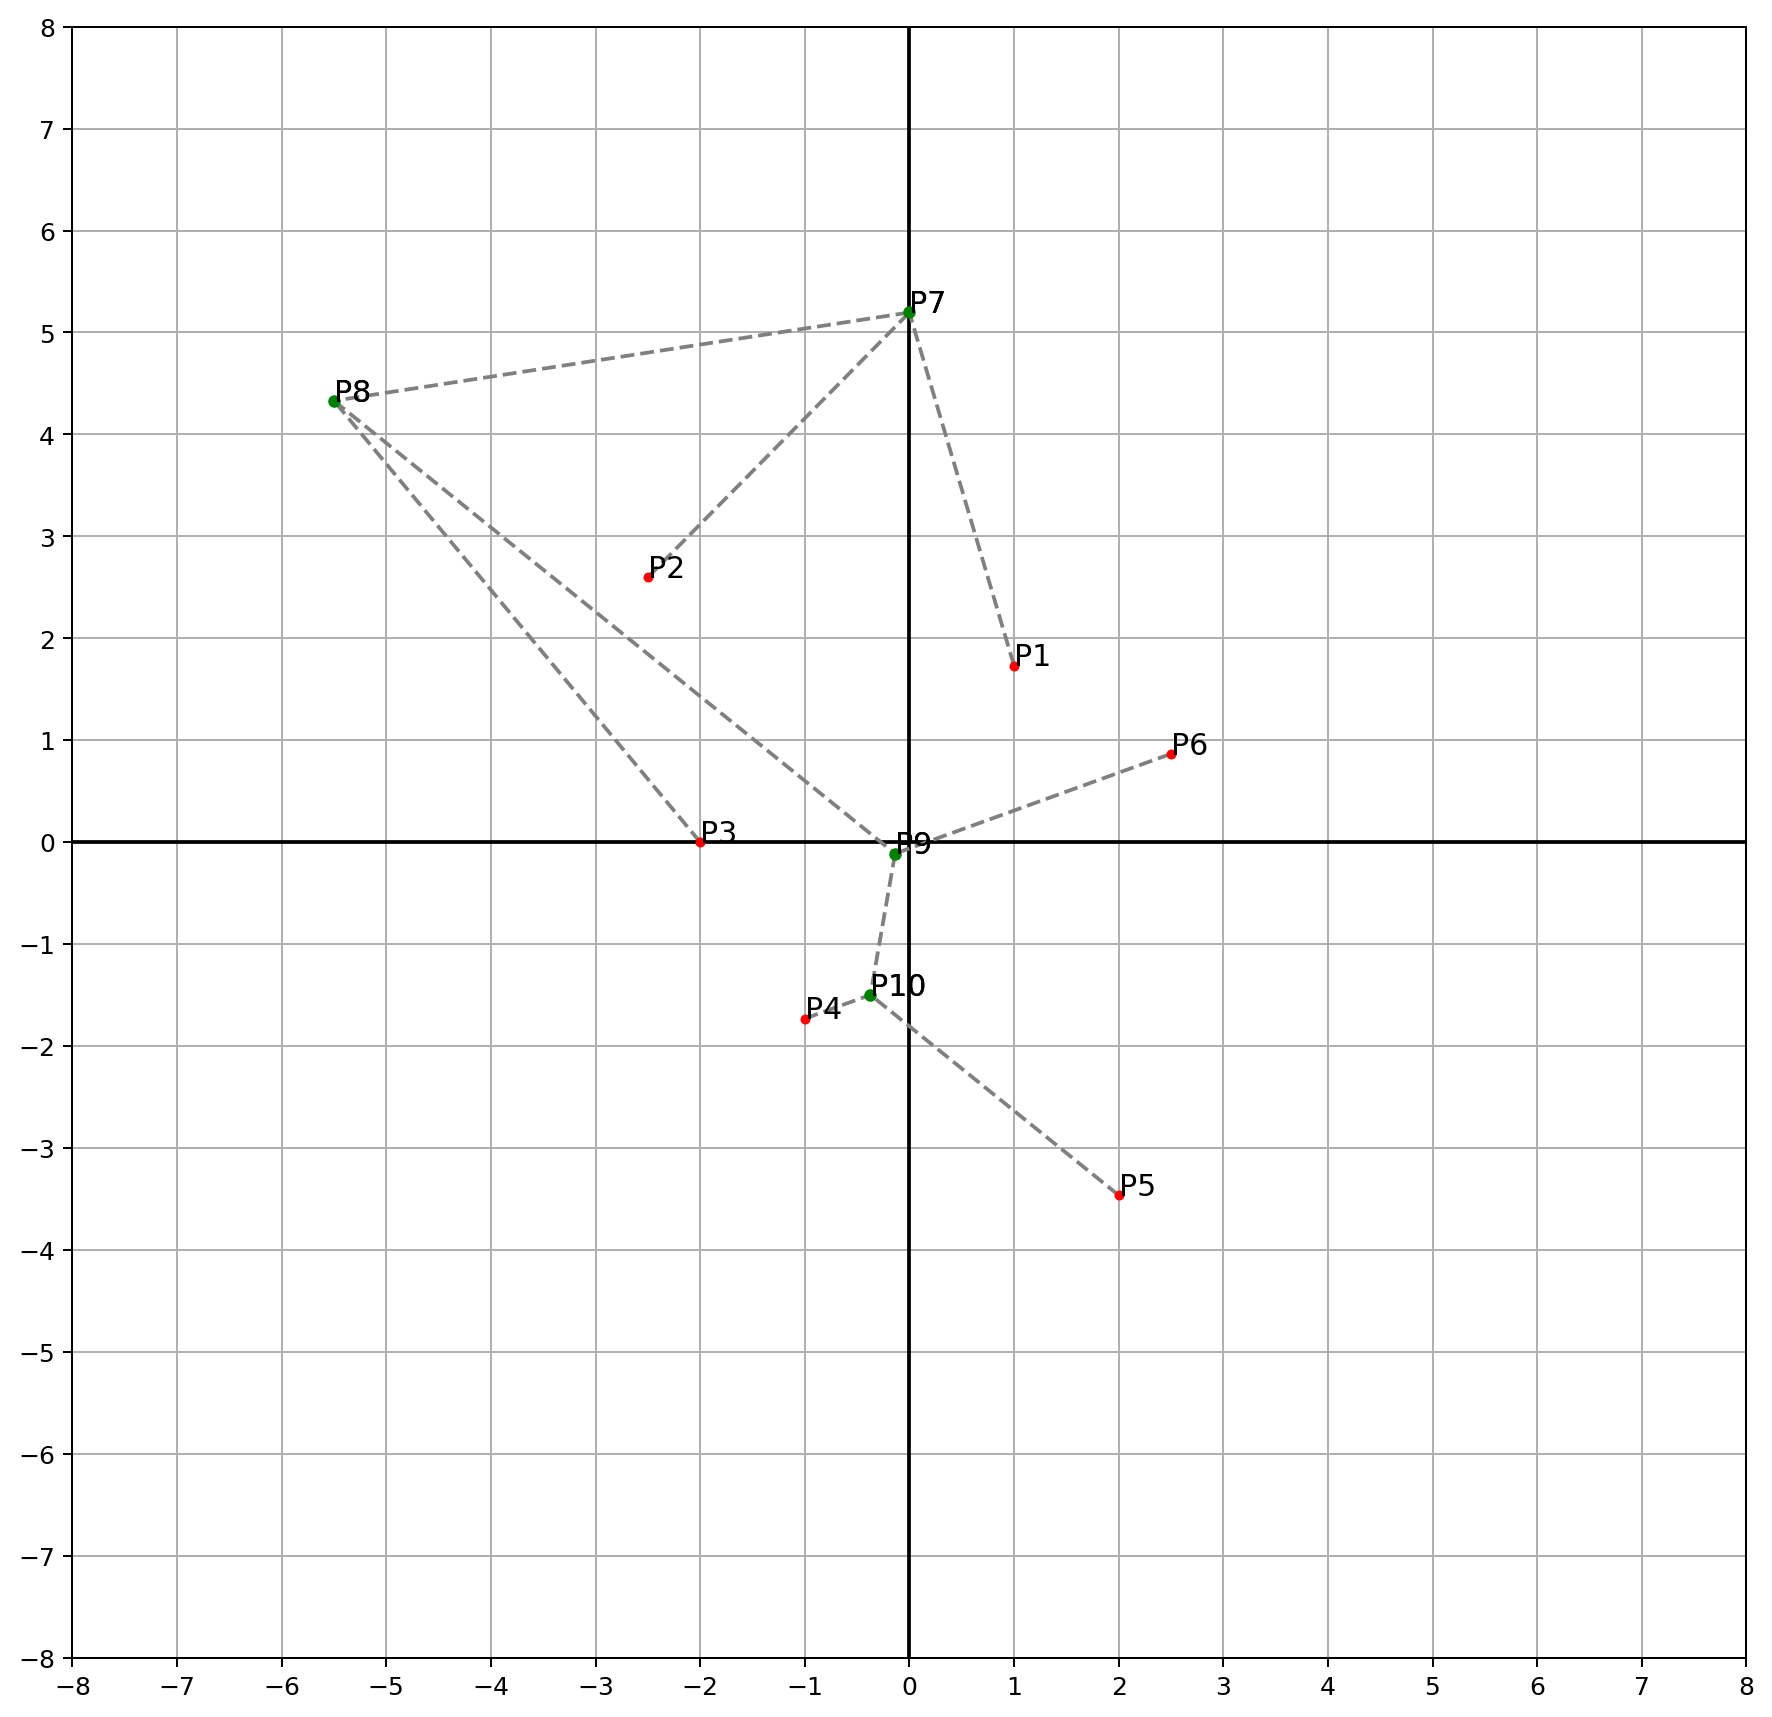

Нашли центр описанной окружности с радиусом 3.21455025366 и центром в S1:


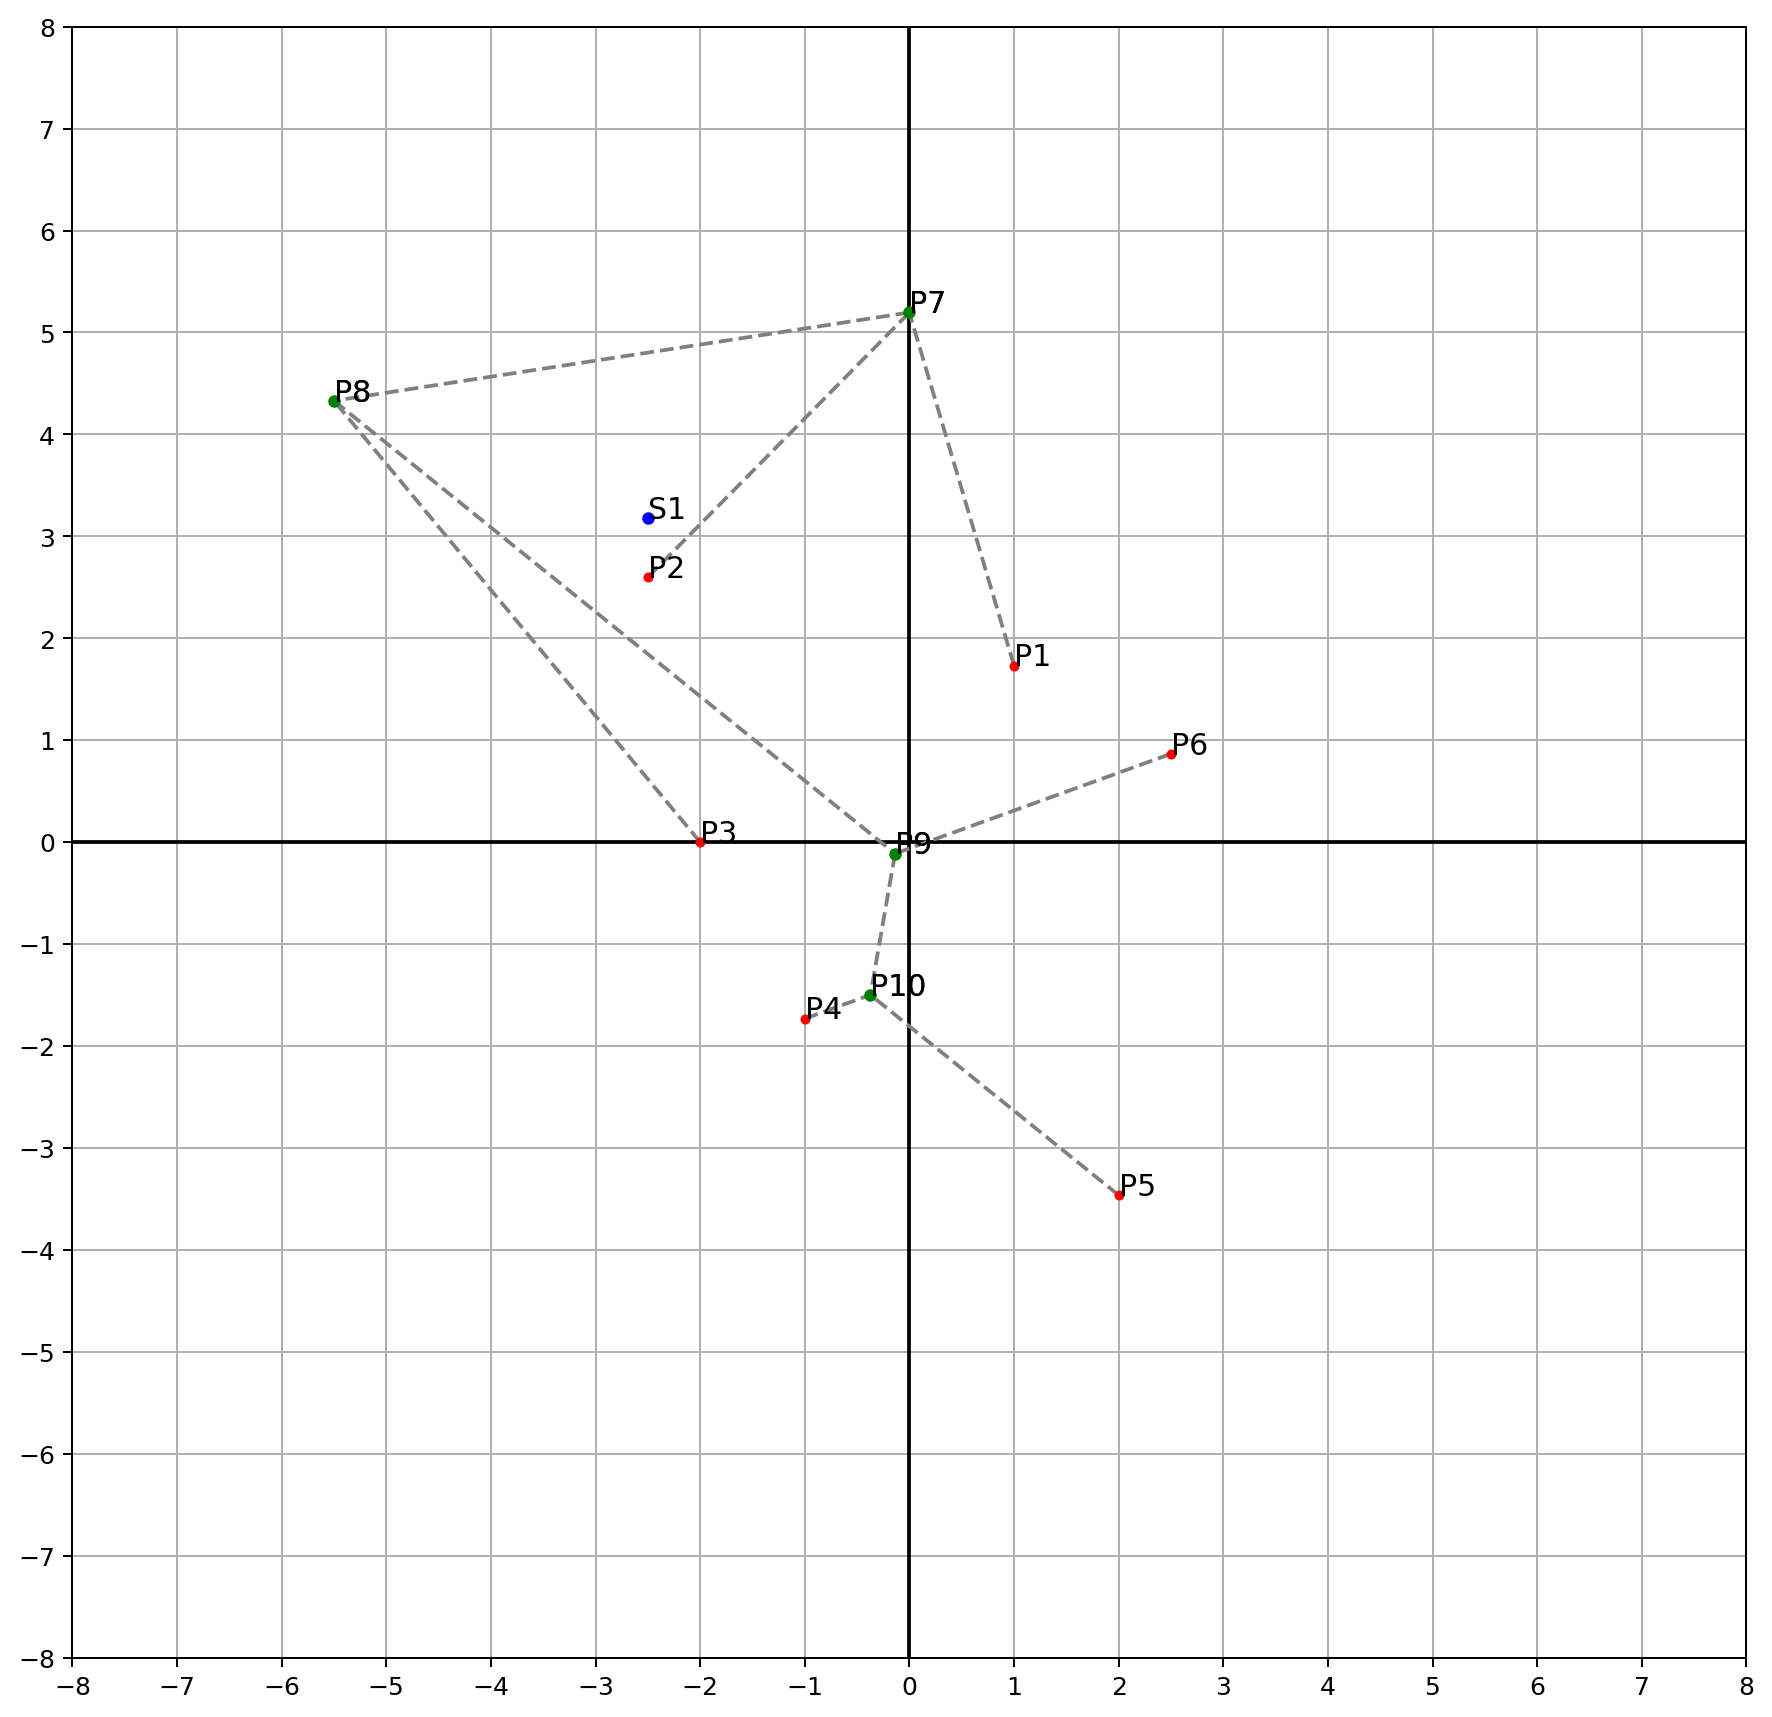

Check: OK
Нашли положение новой точки Штейнера - S1:


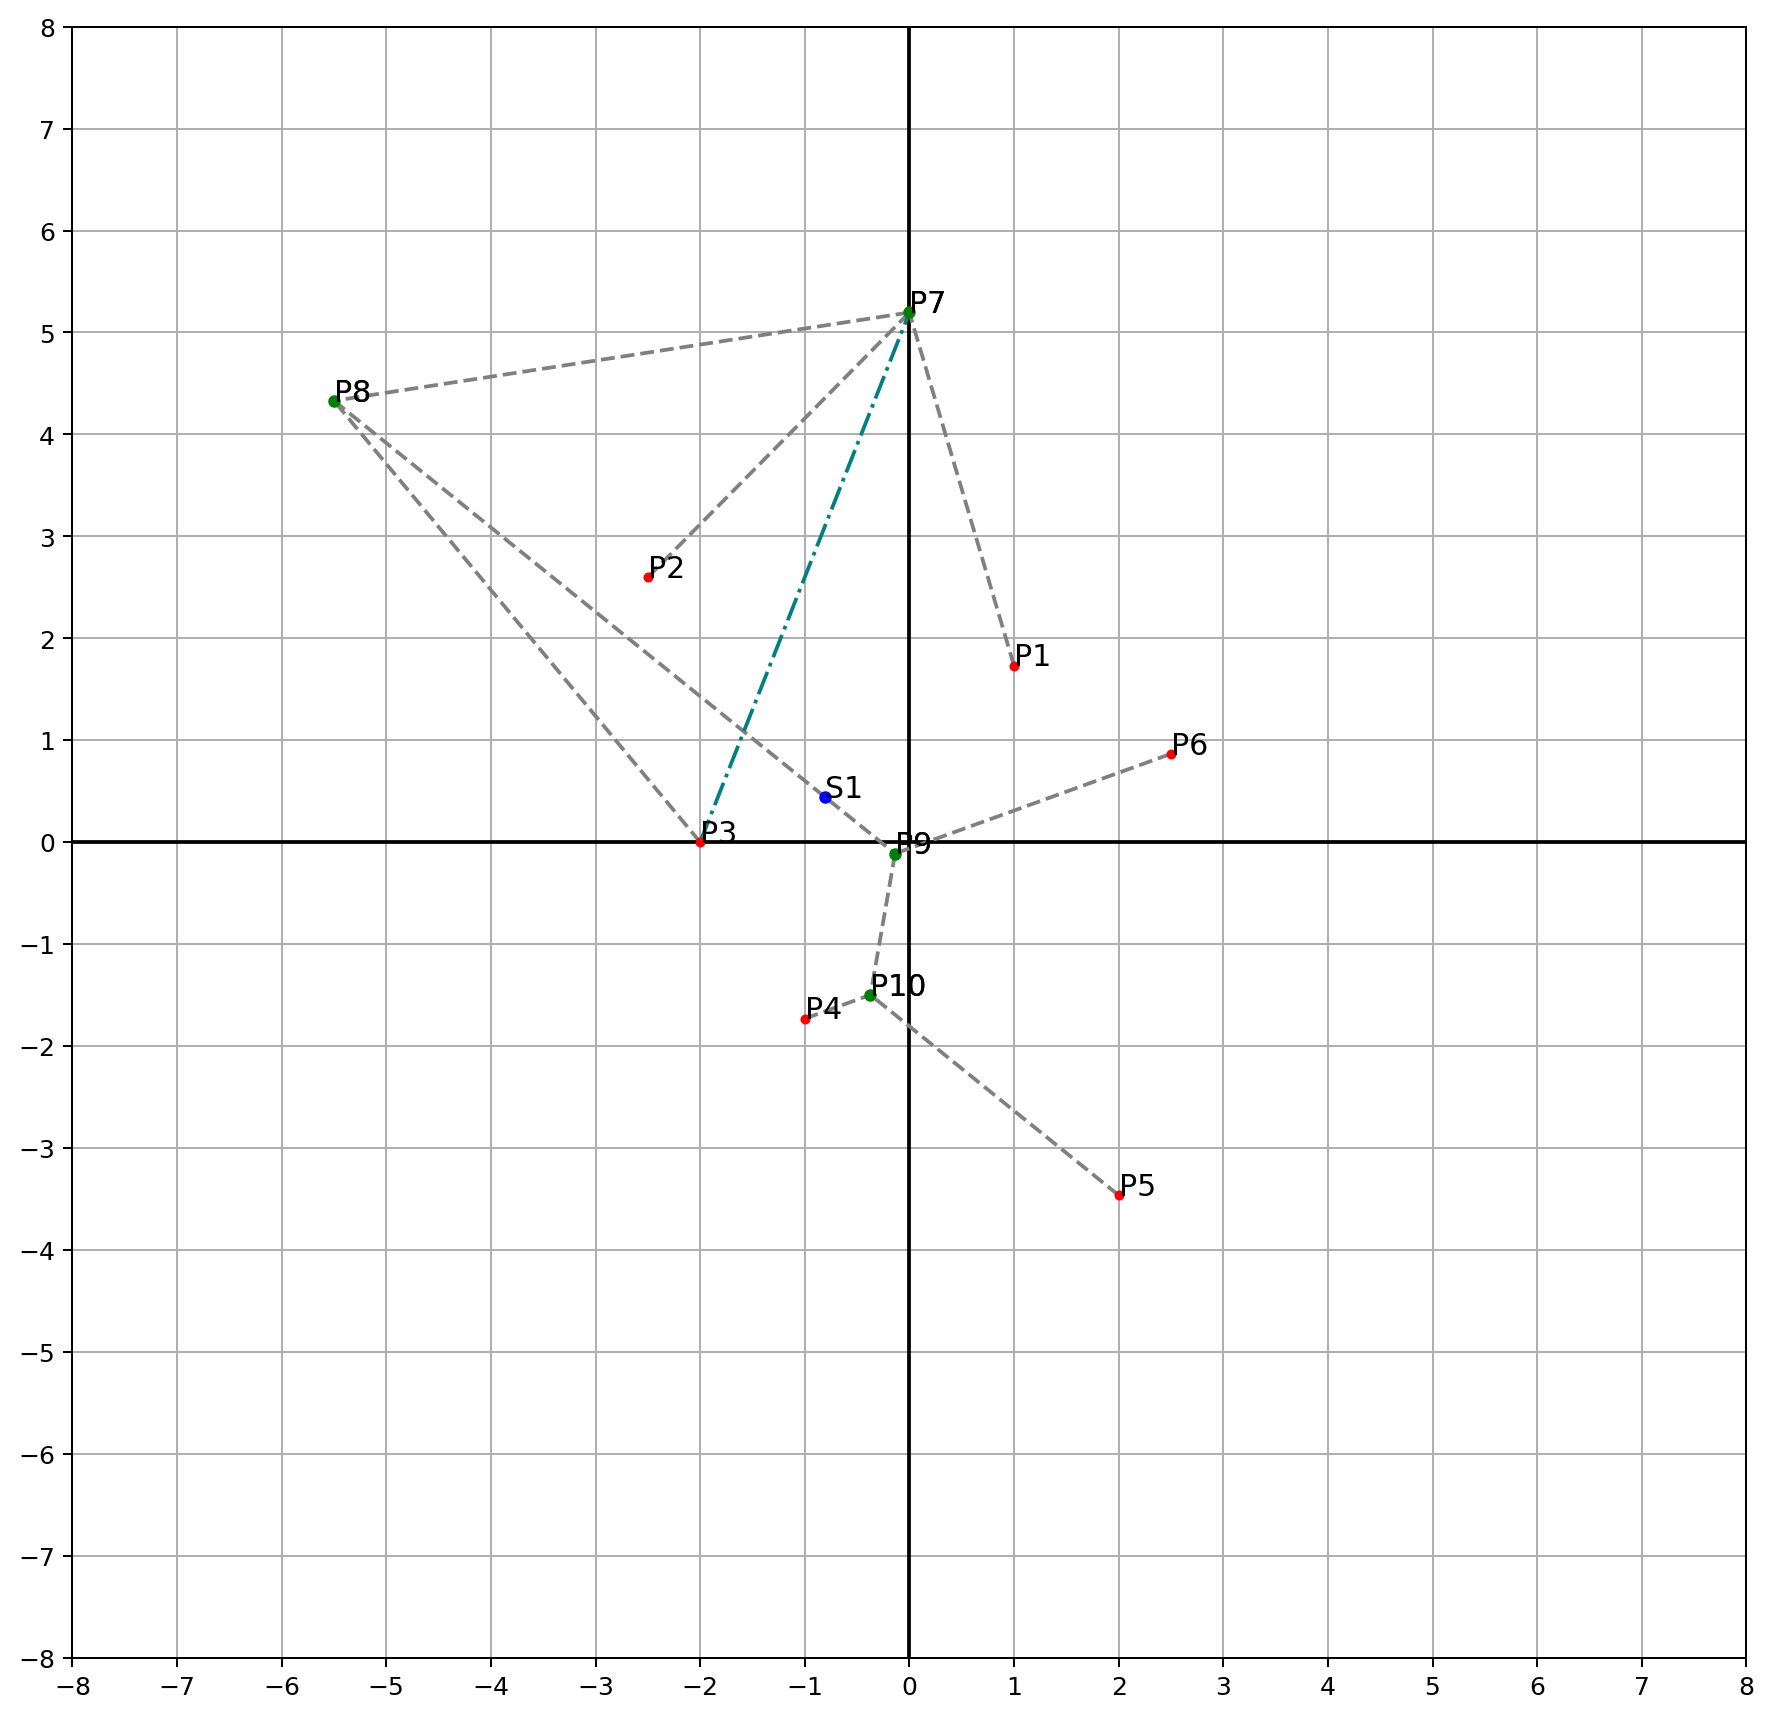

Построили точку Штейнера P8:


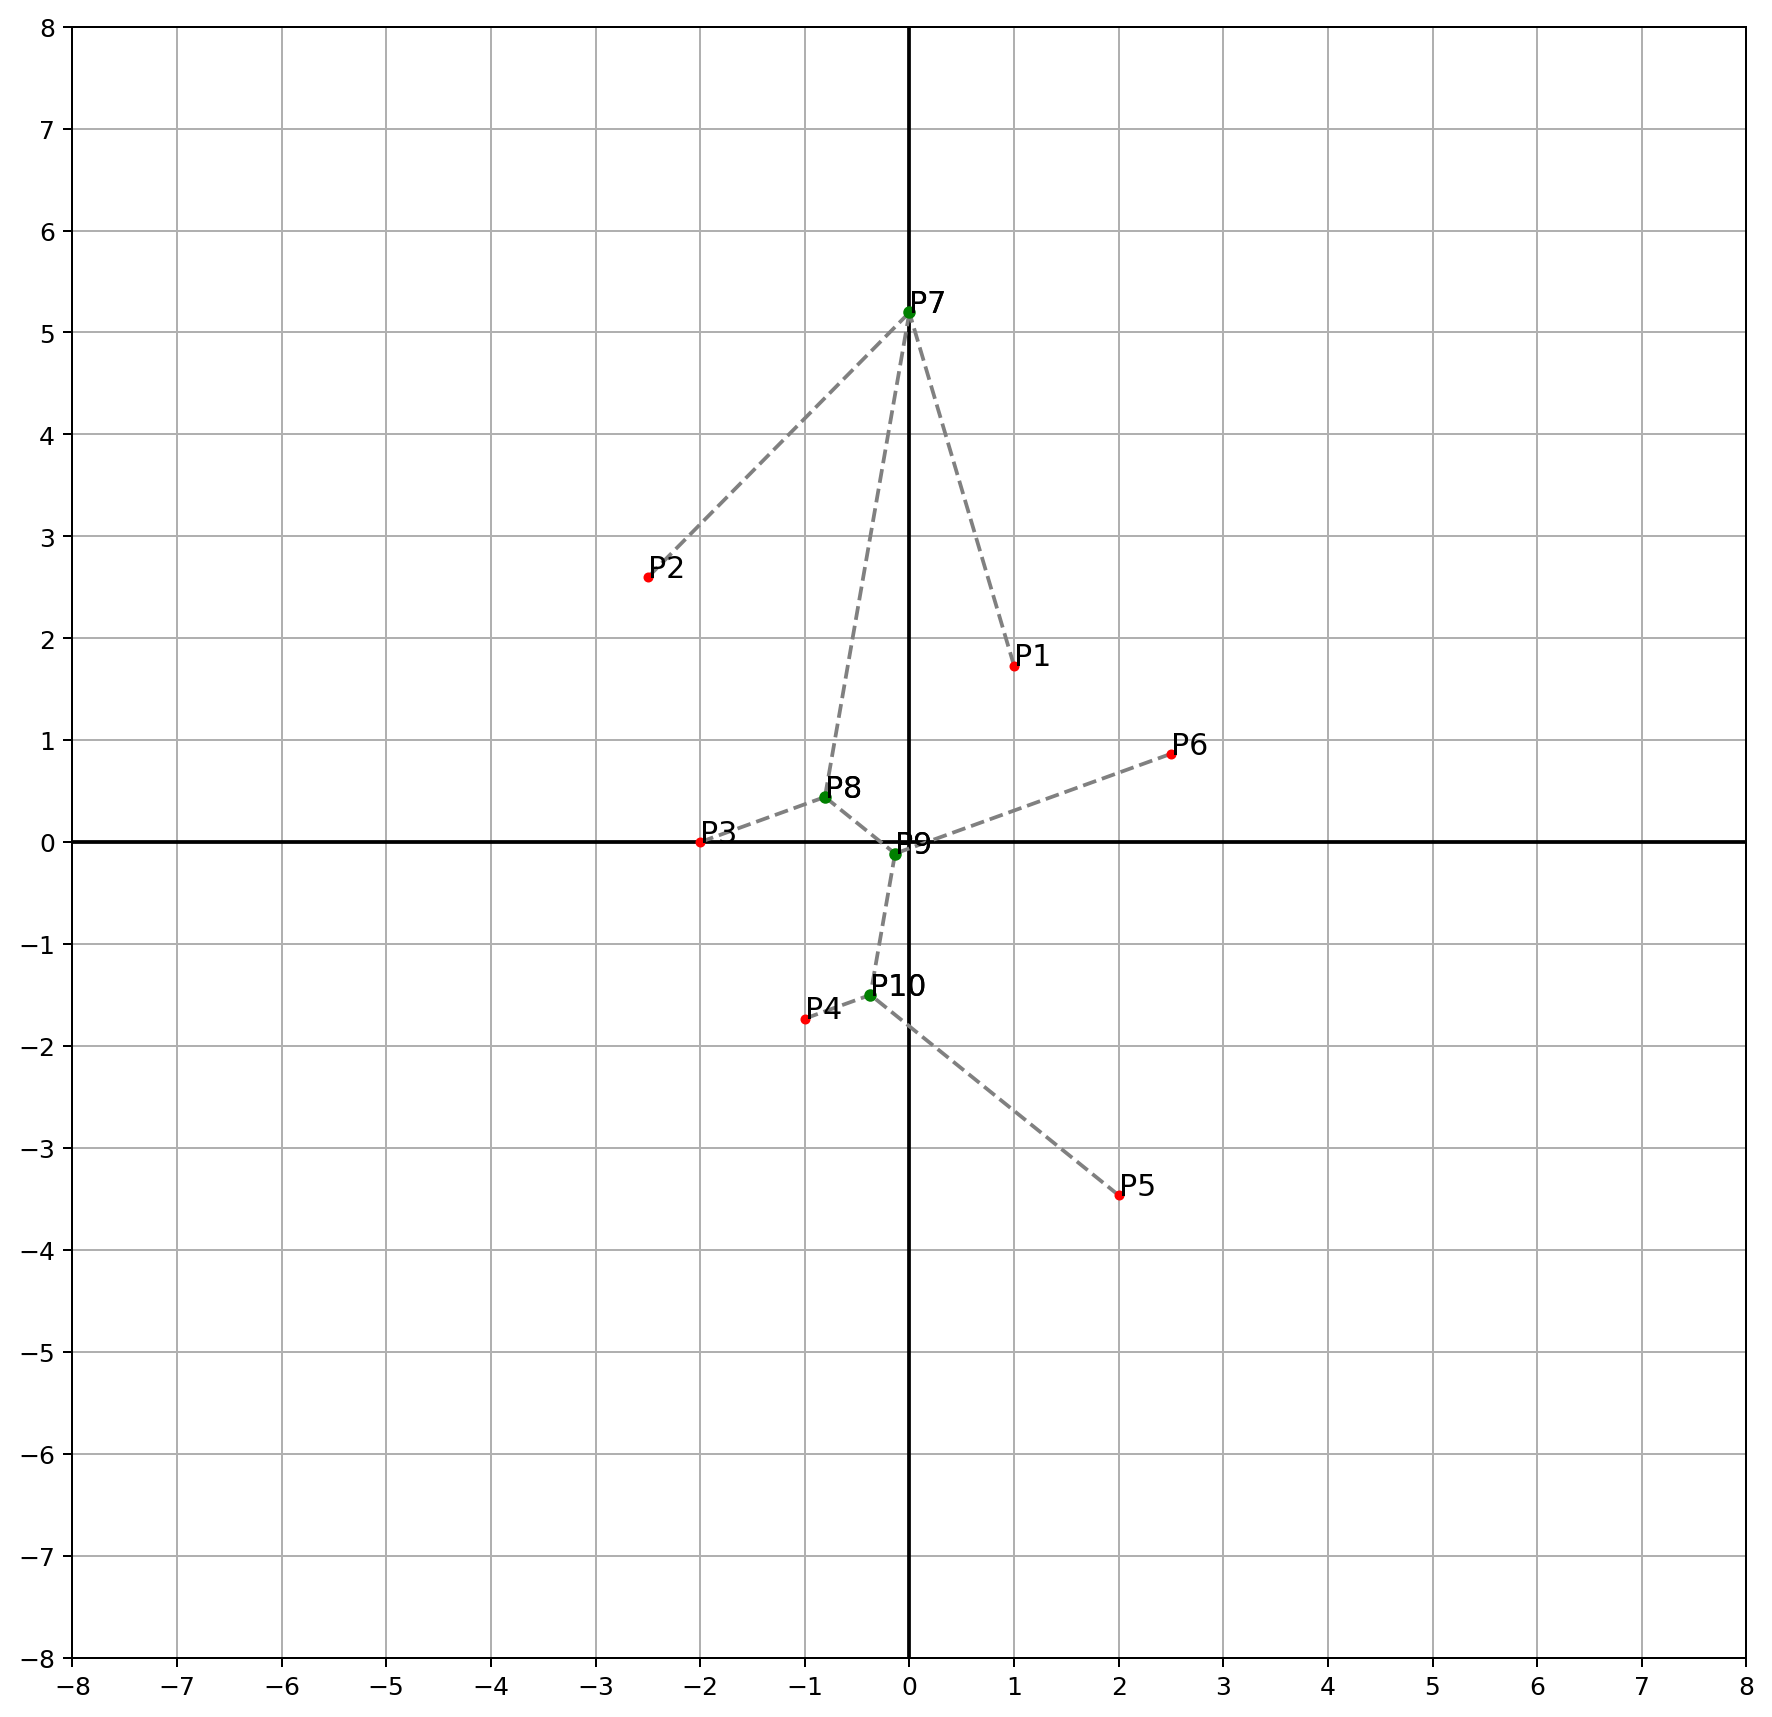

Нашли центр описанной окружности с радиусом 2.08166599947 и центром в S1:


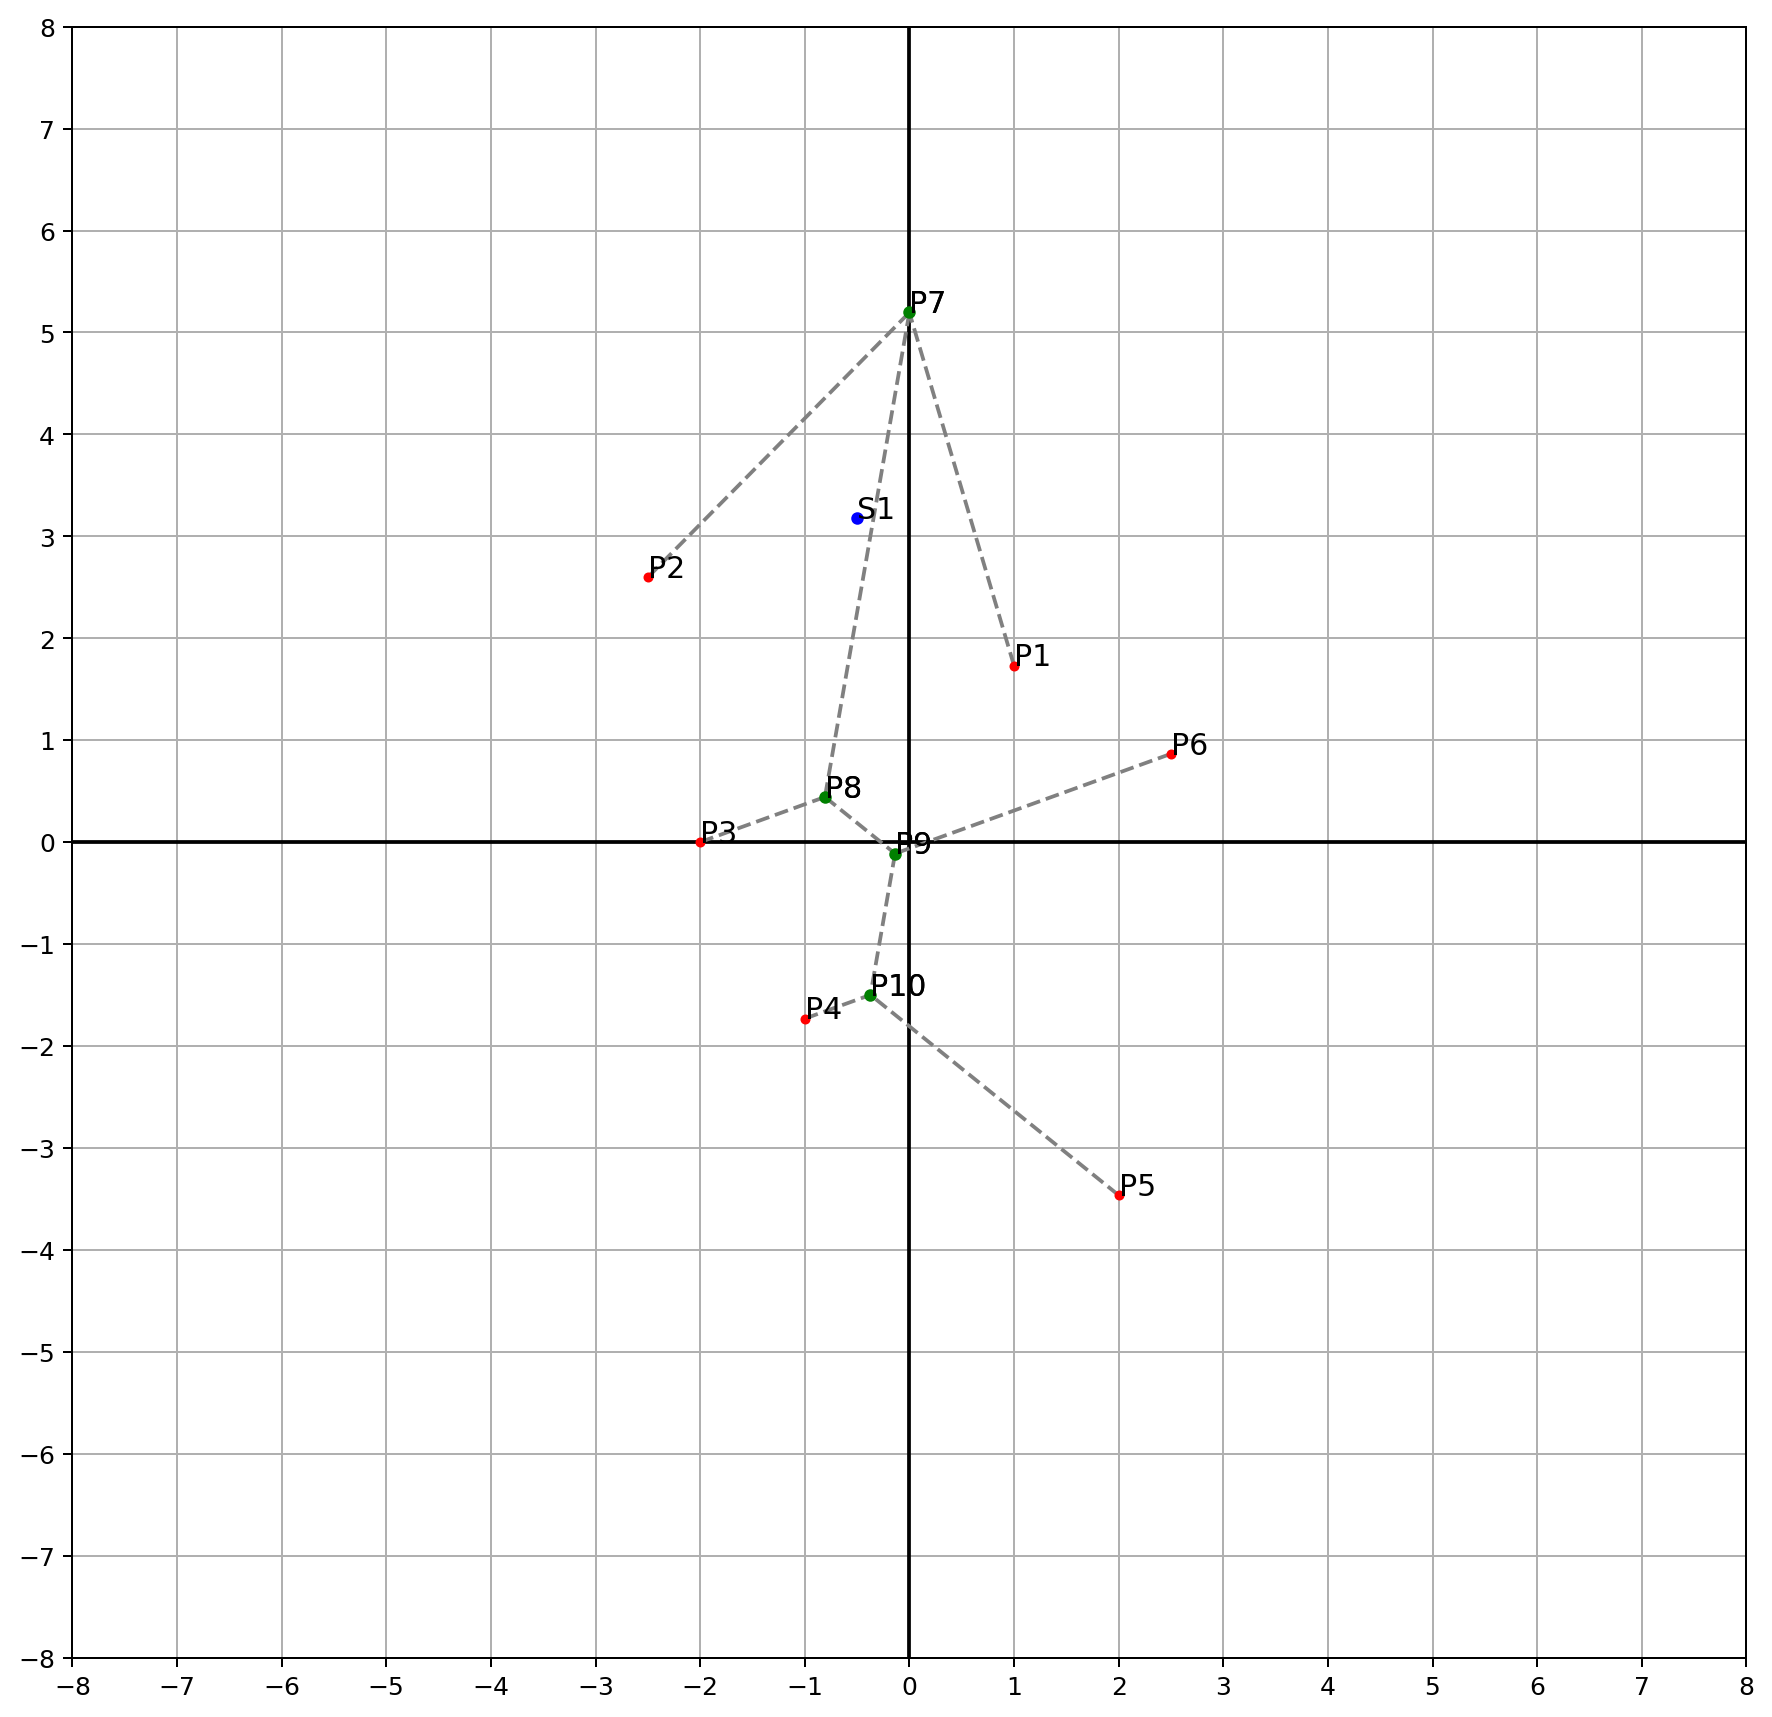

Check: OK
Нашли положение новой точки Штейнера - S1:


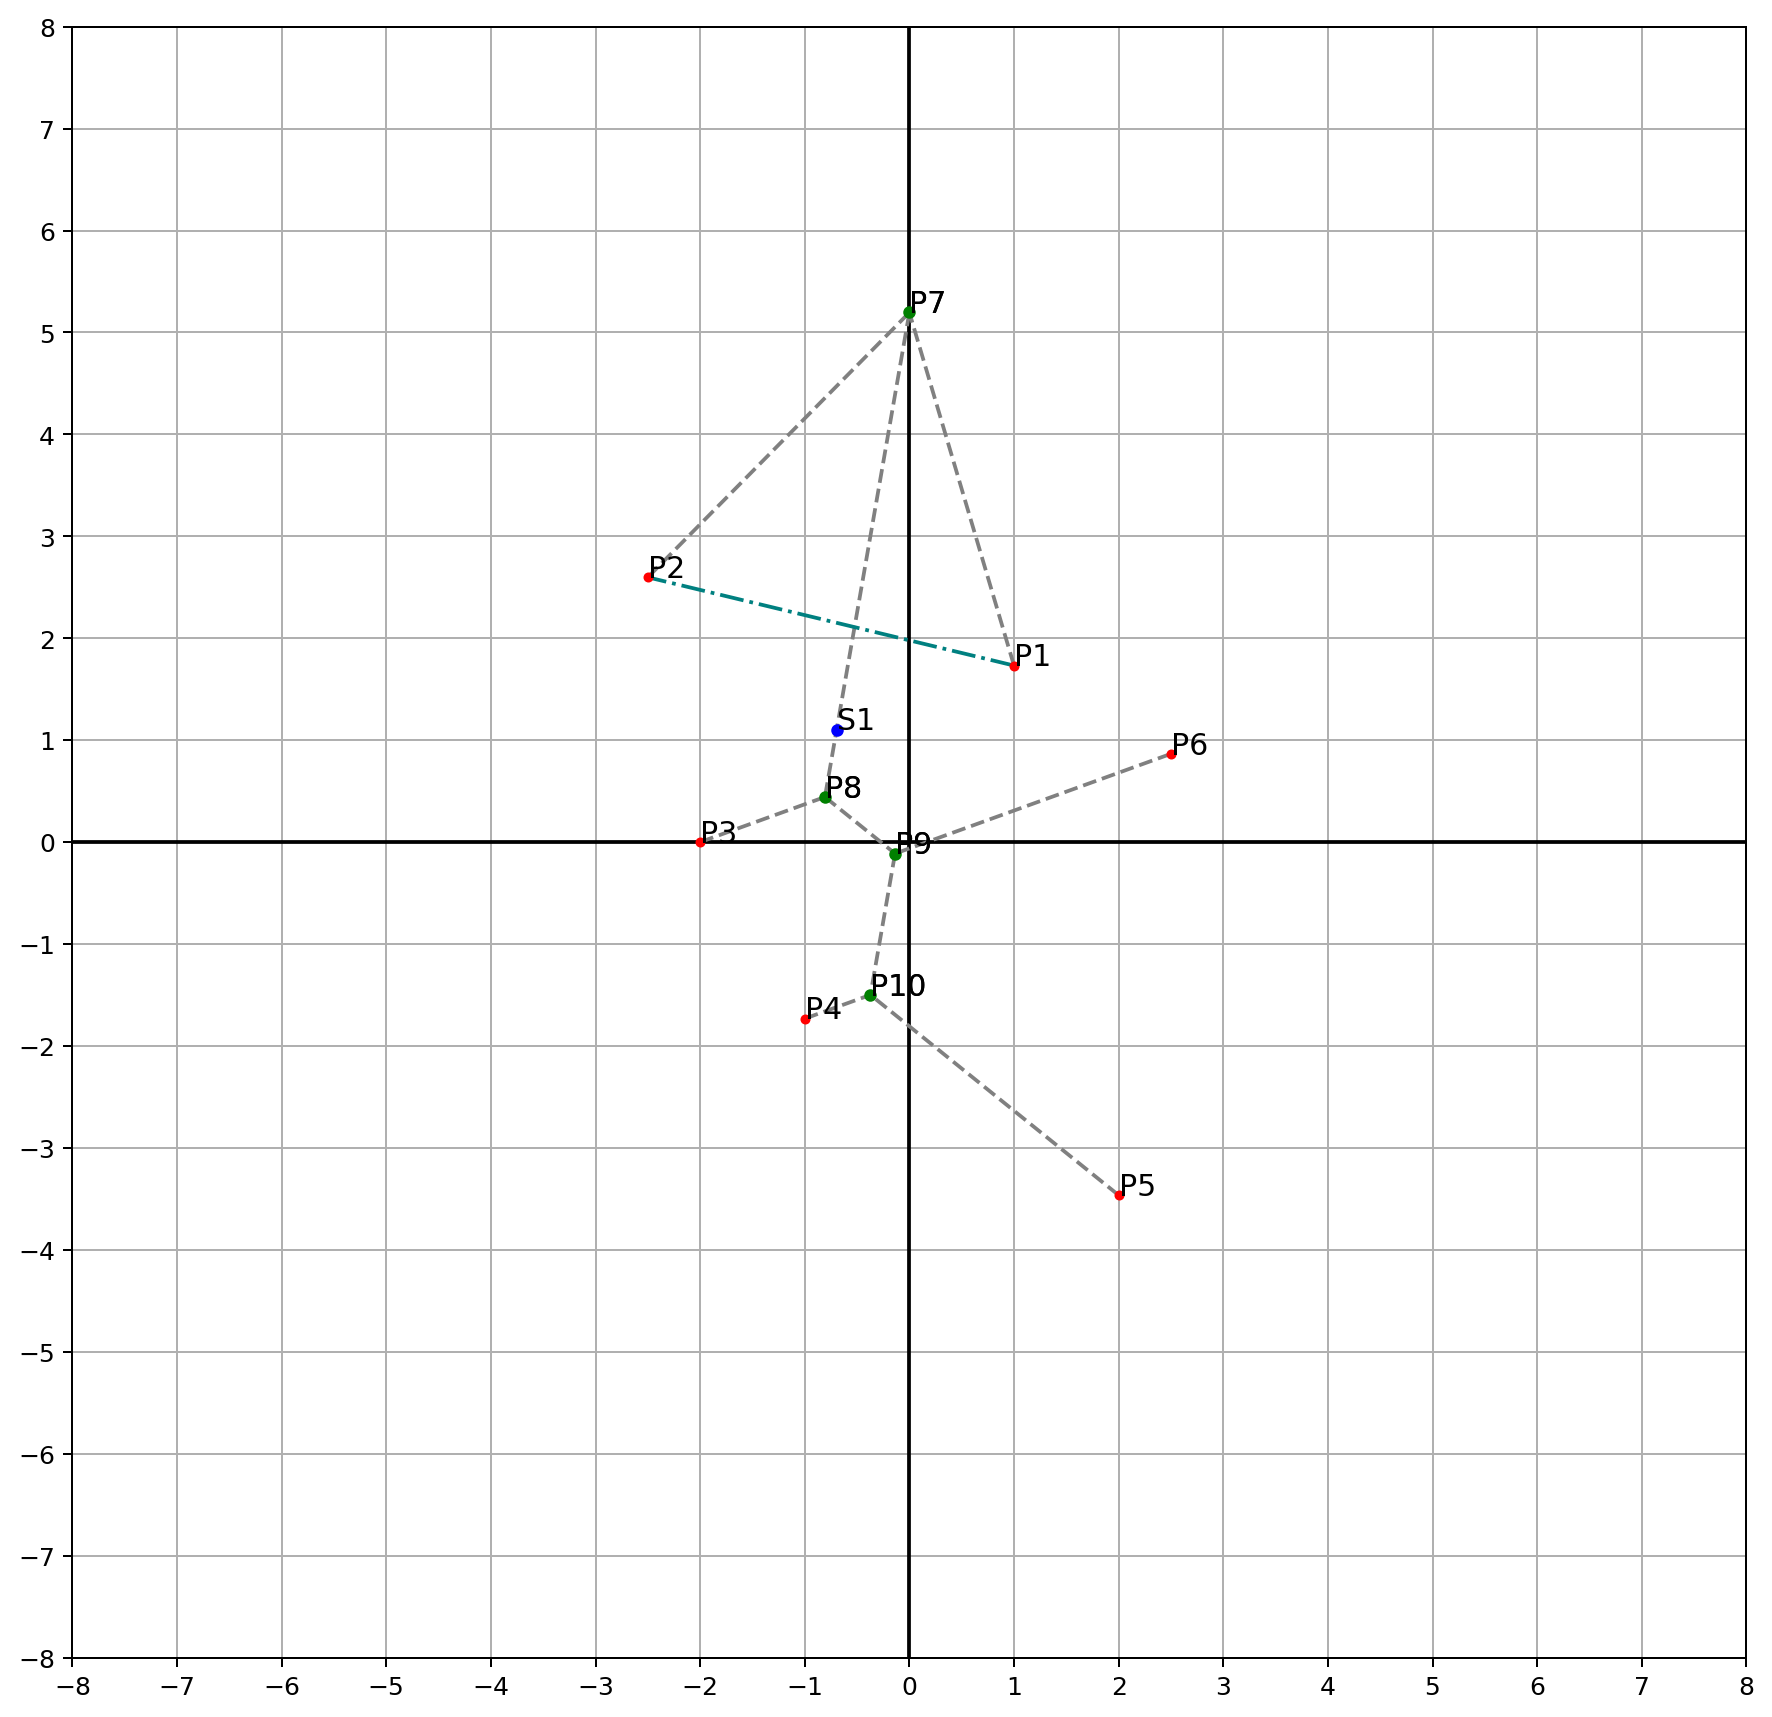

Построили точку Штейнера P7:


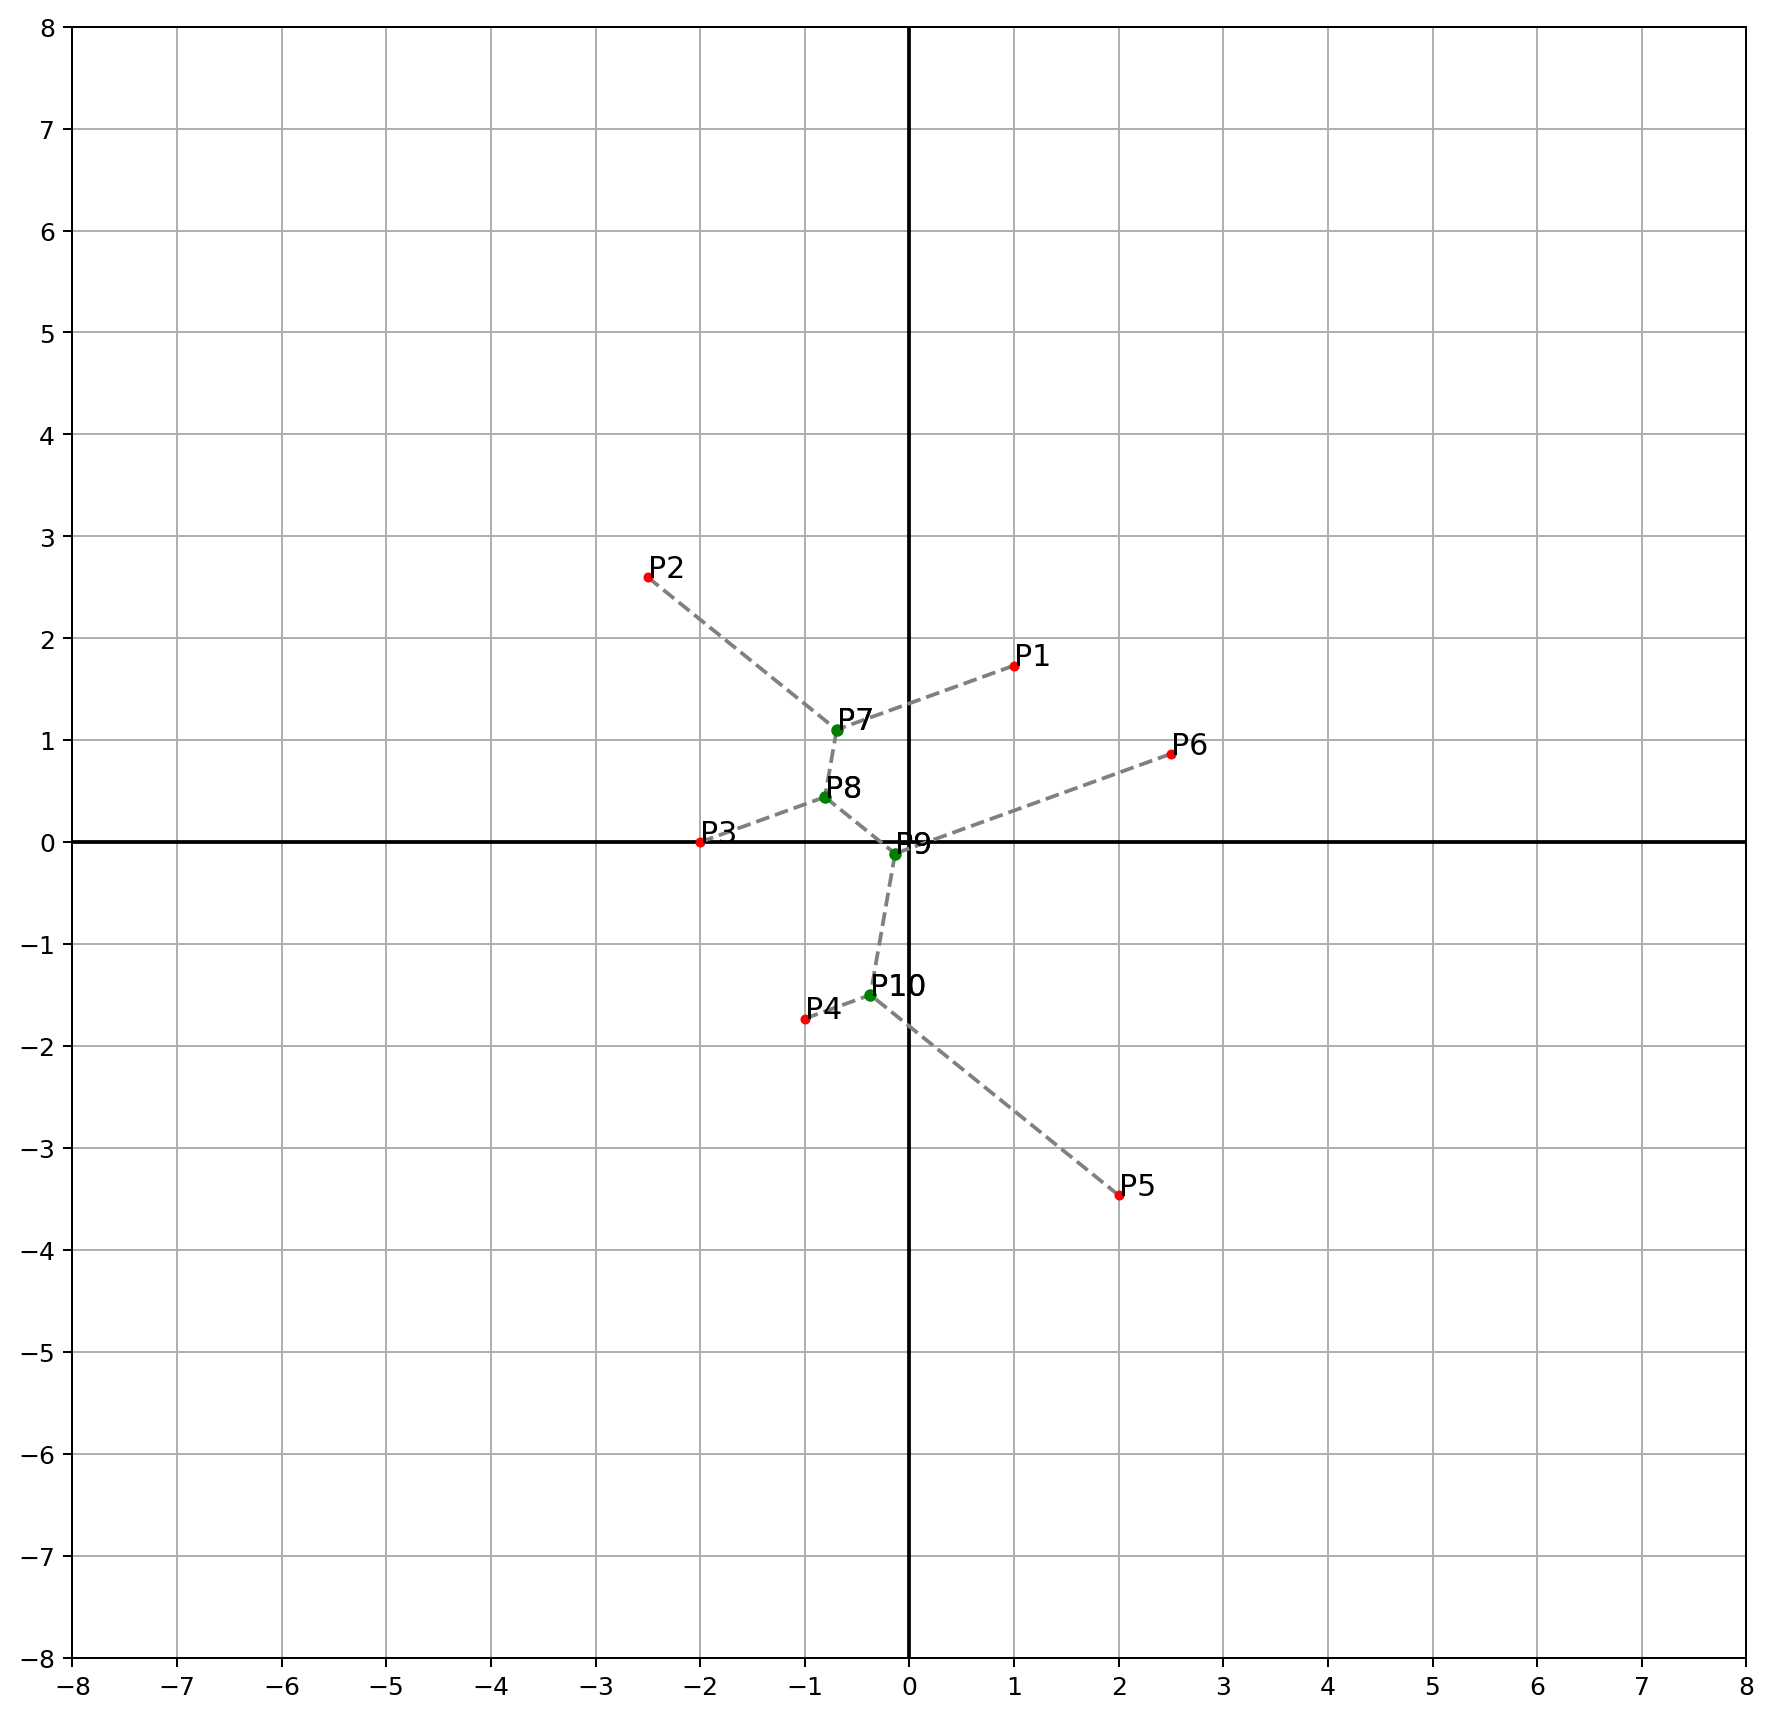

In [28]:
solve(l, G2)